# 1. Data Load

In [1]:
import numpy as np
import pandas as pd
import os
import math

from scipy import stats #Analysis 
from scipy.stats import norm 

import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [2]:
# pandas option 설정 하는 코드
# monthly_gain의 경우 부동소수점으로 나타나서 보기 어려울땐 윗 줄의 주석을 제거하고 아래에 주석을 추가하고
# 다시 원래대로 돌리고 싶다면 아래에 주석제거, 위 코드에 주석추가
pd.options.display.float_format = '{:.2f}'.format
#pd.reset_option('display.float_format')

In [3]:
path = "./Dataset/"

data = pd.read_csv(path+"train.csv")

# original data -> data
data

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,0,1.00,5.00,5.00,5.00,1.00,4.00,5.00,5.00,1.00,...,1.00,20,2.00,12.00,4.00,2.00,1.00,4.00,2.00,1
1,1,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,3.00,...,1.00,49,1.00,2.00,1.00,1.00,2.00,4.00,2.00,1
2,2,4.00,5.00,5.00,4.00,3.00,5.00,5.00,5.00,4.00,...,2.00,43,1.00,2.00,2.00,2.00,3.00,4.00,2.00,1
3,3,4.00,4.00,4.00,2.00,4.00,3.00,3.00,5.00,3.00,...,1.00,17,2.00,1.00,1.00,2.00,1.00,2.00,2.00,1
4,4,4.00,4.00,4.00,4.00,3.00,3.00,4.00,2.00,3.00,...,2.00,18,2.00,12.00,1.00,2.00,1.00,1.00,2.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2.00,5.00,4.00,3.00,3.00,4.00,4.00,4.00,3.00,...,1.00,17,1.00,1.00,3.00,2.00,1.00,3.00,2.00,0
14996,14996,5.00,4.00,5.00,4.00,4.00,5.00,5.00,4.00,4.00,...,2.00,45,1.00,3.00,1.00,1.00,2.00,3.00,2.00,1
14997,14997,4.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,4.00,...,1.00,20,1.00,1.00,2.00,1.00,1.00,3.00,1.00,1
14998,14998,5.00,5.00,4.00,5.00,5.00,5.00,5.00,1.00,5.00,...,1.00,29,1.00,12.00,4.00,2.00,2.00,2.00,1.00,0


# 2. EDA 

15,000 rows × 70 columns

- feature (1)
    - index 
- Categorical variable (63)
    - country : 137 values, not valanced 
    - education : 4 values 
    - urban : 4 values, but start with 0 
    - gender : 3 
    - engnat : 2 
    - hand : 3 
    - religion : 12 
    - orientation : 5
    - voted : 2
    - married : 3
    - ASD : 2 
    - Q(26) : 5 values
        - 1=Disagree, 2=Slightly disagree, 3=Neutral, 4=Slightly agree, 5=Agree
    - TIPI(10) : 5 values 
        - items were rated "I see myself as:" _____ such that Extraverted, enthusiastic...
    - VCL(16) : 2 values (0 or 1) 
        - no more need for preprocessing
- Numerical variable (5)
    - introelapse : 1315 values 
    - testelapse : 684 values 
    - surveyelapse : 712 values
    - age : 76 values, but maybe outlier...
    - familysize : 20 values, but maybe outlier... 
- Y variable (1)
    - nerdiness 
        - binary classification 
        - 1:8303, 0:6697

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 70 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         15000 non-null  int64  
 1   Q1            14959 non-null  float64
 2   Q2            14931 non-null  float64
 3   Q3            14950 non-null  float64
 4   Q4            14929 non-null  float64
 5   Q5            14962 non-null  float64
 6   Q6            14952 non-null  float64
 7   Q7            14924 non-null  float64
 8   Q8            14952 non-null  float64
 9   Q9            14944 non-null  float64
 10  Q10           14928 non-null  float64
 11  Q11           14941 non-null  float64
 12  Q12           14933 non-null  float64
 13  Q13           14960 non-null  float64
 14  Q14           14964 non-null  float64
 15  Q15           14955 non-null  float64
 16  Q16           14967 non-null  float64
 17  Q17           14963 non-null  float64
 18  Q18           14937 non-nu

<AxesSubplot:>

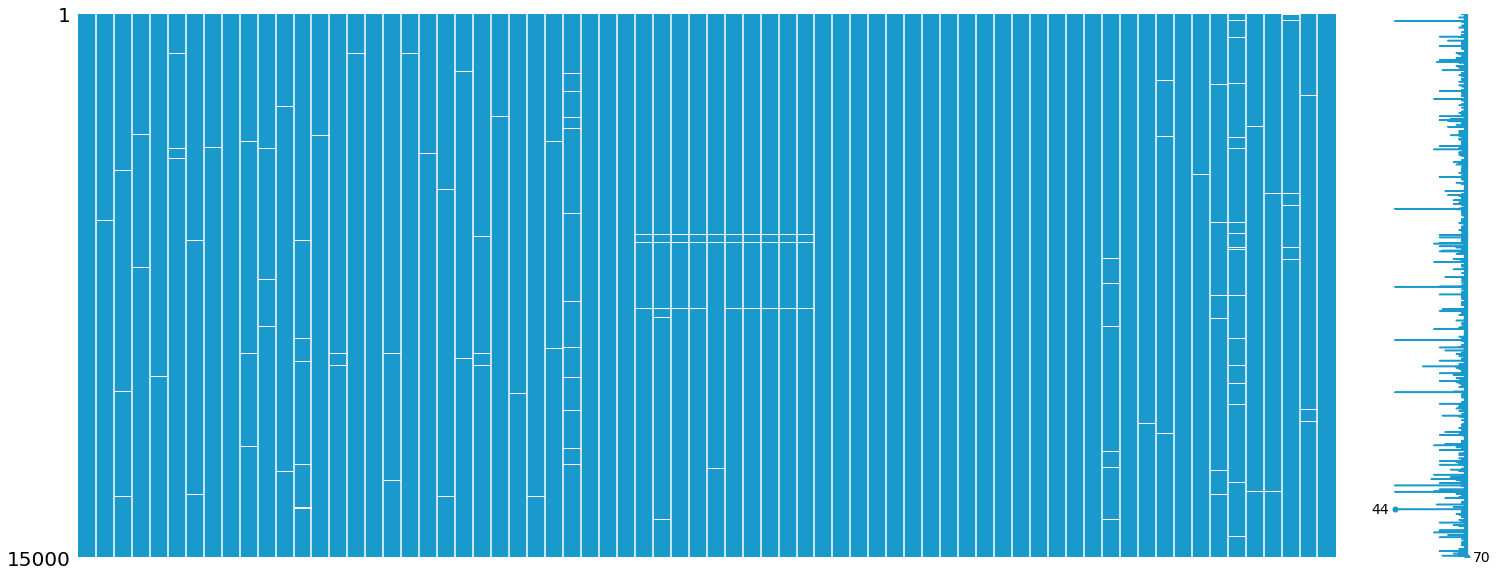

In [5]:
# missing value check
msno.matrix(data.iloc[:, :], color=(0.1, 0.6, 0.8))

# 3. Preprocessing
data -> processed_data 

- **Drop unnecessary features** 
    - index
- **Handling missing values**
    - more researching.. 
    - **fillna 0**
        - country, education, gender(조금 더 논의), hand, religion, orientation, voted, married, ASD
        - 무응답은 0으로 채우기 (urban은 이미 0부터 시작) 
    - **then remove 1,449 data**
        - 13,551 rows x 69 cols 
        
Categorical
- **Label Encoding**
    - country
    
Numerical
- **Log Transformation**
    - 3 elapse cols (intro, test, survey)
- **Ranging**
    - age to 10 category (0~10/10~20..90~100)
- **Removing outlier**
    - familysize: remove 1 data (2919)


In [24]:
# 원본 data와 따로 관리 -> original data = data, preprocessed data = processed_data 
# Feature drop : 'index'
processed_data = data.drop(['index'], axis=1).copy()

In [25]:
# Handling missing values 
# fill na 
fill_cols = ['country', 'education', 'gender', 'hand', 'religion', 'orientation', 'voted', 'married', 'ASD']
processed_data[fill_cols] = processed_data[fill_cols].fillna(0)
processed_data

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,1.00,5.00,5.00,5.00,1.00,4.00,5.00,5.00,1.00,3.00,...,1.00,20,2.00,12.00,4.00,2.00,1.00,4.00,2.00,1
1,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,3.00,3.00,...,1.00,49,1.00,2.00,1.00,1.00,2.00,4.00,2.00,1
2,4.00,5.00,5.00,4.00,3.00,5.00,5.00,5.00,4.00,4.00,...,2.00,43,1.00,2.00,2.00,2.00,3.00,4.00,2.00,1
3,4.00,4.00,4.00,2.00,4.00,3.00,3.00,5.00,3.00,4.00,...,1.00,17,2.00,1.00,1.00,2.00,1.00,2.00,2.00,1
4,4.00,4.00,4.00,4.00,3.00,3.00,4.00,2.00,3.00,4.00,...,2.00,18,2.00,12.00,1.00,2.00,1.00,1.00,2.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.00,5.00,4.00,3.00,3.00,4.00,4.00,4.00,3.00,4.00,...,1.00,17,1.00,1.00,3.00,2.00,1.00,3.00,2.00,0
14996,5.00,4.00,5.00,4.00,4.00,5.00,5.00,4.00,4.00,5.00,...,2.00,45,1.00,3.00,1.00,1.00,2.00,3.00,2.00,1
14997,4.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,4.00,5.00,...,1.00,20,1.00,1.00,2.00,1.00,1.00,3.00,1.00,1
14998,5.00,5.00,4.00,5.00,5.00,5.00,5.00,1.00,5.00,5.00,...,1.00,29,1.00,12.00,4.00,2.00,2.00,2.00,1.00,0


In [26]:
# Lable Encoding : 'country' 
from sklearn.preprocessing import LabelEncoder

# labeling the other countries as 1 
df_country = pd.DataFrame(data['country'].value_counts())
others = df_country[df_country['country']==1].index.values.tolist()
processed_data['country'] = processed_data['country'].apply(lambda x : 1 if x in others else x)

le = LabelEncoder()
processed_data['country'] = le.fit_transform(list(processed_data['country']))   
print(le.classes_)

# save encoder
dump(le, open('labelencoder.pkl', 'wb'))

['0' 'AFG' 'AGO' 'ALB' 'ARE' 'ARG' 'ARM' 'AUS' 'AUT' 'AZE' 'BEL' 'BGD'
 'BGR' 'BHR' 'BHS' 'BIH' 'BRA' 'BRB' 'BRN' 'BWA' 'CAN' 'CHE' 'CHL' 'CHN'
 'COL' 'CRI' 'CUW' 'CYP' 'CZE' 'DEU' 'DNK' 'DOM' 'DZA' 'ECU' 'EGY' 'ESP'
 'EST' 'ETH' 'FIN' 'FJI' 'FRA' 'FRO' 'FSM' 'GBR' 'GEO' 'GHA' 'GRC' 'GRL'
 'GUF' 'GUM' 'HKG' 'HND' 'HRV' 'HUN' 'IDN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL'
 'ISR' 'ITA' 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN' 'KHM' 'KOR' 'KWT' 'LAO' 'LBN'
 'LBY' 'LTU' 'LUX' 'LVA' 'MAC' 'MAR' 'MDG' 'MEX' 'MKD' 'MLT' 'MNG' 'MNP'
 'MOZ' 'MUS' 'MWI' 'MYS' 'NAM' 'NGA' 'NLD' 'NOR' 'NPL' 'NZL' 'OMN' 'PAK'
 'PAN' 'PER' 'PHL' 'PNG' 'POL' 'PRI' 'PRT' 'PRY' 'QAT' 'ROU' 'RUS' 'SAU'
 'SDN' 'SGP' 'SLV' 'SRB' 'SSD' 'SVK' 'SVN' 'SWE' 'SYR' 'THA' 'TTO' 'TUN'
 'TUR' 'TWN' 'UGA' 'UKR' 'URY' 'USA' 'VEN' 'VGB' 'VIR' 'VNM' 'ZAF' 'ZMB']


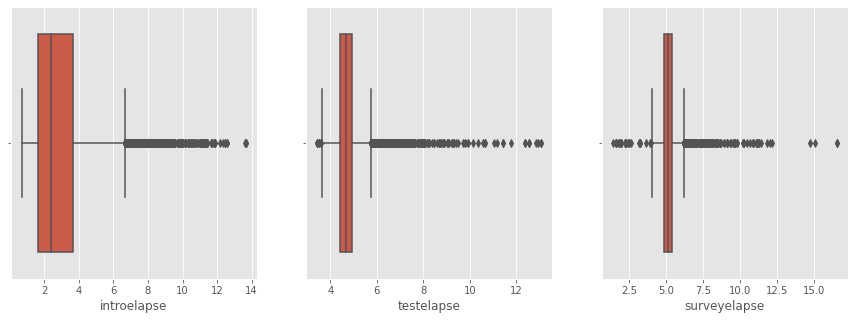

In [27]:
# Log Transformation : 'introelapse','testelapse','surveyelapse'
right_skewed_cols = ['introelapse','testelapse','surveyelapse']
for c in right_skewed_cols : 
    processed_data[c] = np.log1p(processed_data[c])

# for checking 
plt.style.use("ggplot") 
plt.figure(figsize=(15,5))
    
for i in range(len(right_skewed_cols)):
    plt.subplot(1,3,i+1)
    sns.boxplot(x=right_skewed_cols[i], data=processed_data)

In [28]:
# Ranging : 'age'
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

bins= [10,20,30,40,50,60,70,80,90,100,40000]
labels = [10,20,30,40,50,60,70,80,90,100]
processed_data['age'] = pd.cut(processed_data['age'], bins=bins, labels=labels, right=False)

oe = OrdinalEncoder()
processed_data['age'] = oe.fit_transform(processed_data['age'].values.reshape(-1,1))
processed_data['age'].value_counts()

10     6149
20     4696
30     1364
40      741
50      405
60      166
70       22
100       7
80        1
Name: age, dtype: int64

In [30]:
# Handling outlier : 'familysize'
Q1 = processed_data['familysize'].quantile(0.25)
Q2 = processed_data['familysize'].quantile(0.5)
Q3 = processed_data['familysize'].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - (1.5 * IQR)
upper_fence = Q3 + (1.5 * IQR)

processed_data['familysize'] = processed_data['familysize'].apply(lambda x : np.nan if x < lower_fence or x > upper_fence else x)
sns.boxplot(x='familysize', data=processed_data)

In [31]:
processed_data

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,1.00,5.00,5.00,5.00,1.00,4.00,5.00,5.00,1.00,3.00,...,1.00,20,2.00,12.00,4.00,2.00,1.00,4.00,2.00,1
1,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,3.00,3.00,...,1.00,40,1.00,2.00,1.00,1.00,2.00,4.00,2.00,1
2,4.00,5.00,5.00,4.00,3.00,5.00,5.00,5.00,4.00,4.00,...,2.00,40,1.00,2.00,2.00,2.00,3.00,4.00,2.00,1
3,4.00,4.00,4.00,2.00,4.00,3.00,3.00,5.00,3.00,4.00,...,1.00,10,2.00,1.00,1.00,2.00,1.00,2.00,2.00,1
4,4.00,4.00,4.00,4.00,3.00,3.00,4.00,2.00,3.00,4.00,...,2.00,10,2.00,12.00,1.00,2.00,1.00,1.00,2.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13539,2.00,5.00,4.00,3.00,3.00,4.00,4.00,4.00,3.00,4.00,...,1.00,10,1.00,1.00,3.00,2.00,1.00,3.00,2.00,0
13540,5.00,4.00,5.00,4.00,4.00,5.00,5.00,4.00,4.00,5.00,...,2.00,40,1.00,3.00,1.00,1.00,2.00,3.00,2.00,1
13541,4.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,4.00,5.00,...,1.00,20,1.00,1.00,2.00,1.00,1.00,3.00,1.00,1
13542,5.00,5.00,4.00,5.00,5.00,5.00,5.00,1.00,5.00,5.00,...,1.00,20,1.00,12.00,4.00,2.00,2.00,2.00,1.00,0


# 4. Data Split 
split data as train/valid

In [32]:
# 전처리된 data와 따로 관리 -> preprocessed data = procssed_data, input data = input_data 
input_data = processed_data.copy()
input_data

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,1.00,5.00,5.00,5.00,1.00,4.00,5.00,5.00,1.00,3.00,...,1.00,20,2.00,12.00,4.00,2.00,1.00,4.00,2.00,1
1,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,3.00,3.00,...,1.00,40,1.00,2.00,1.00,1.00,2.00,4.00,2.00,1
2,4.00,5.00,5.00,4.00,3.00,5.00,5.00,5.00,4.00,4.00,...,2.00,40,1.00,2.00,2.00,2.00,3.00,4.00,2.00,1
3,4.00,4.00,4.00,2.00,4.00,3.00,3.00,5.00,3.00,4.00,...,1.00,10,2.00,1.00,1.00,2.00,1.00,2.00,2.00,1
4,4.00,4.00,4.00,4.00,3.00,3.00,4.00,2.00,3.00,4.00,...,2.00,10,2.00,12.00,1.00,2.00,1.00,1.00,2.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13539,2.00,5.00,4.00,3.00,3.00,4.00,4.00,4.00,3.00,4.00,...,1.00,10,1.00,1.00,3.00,2.00,1.00,3.00,2.00,0
13540,5.00,4.00,5.00,4.00,4.00,5.00,5.00,4.00,4.00,5.00,...,2.00,40,1.00,3.00,1.00,1.00,2.00,3.00,2.00,1
13541,4.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,4.00,5.00,...,1.00,20,1.00,1.00,2.00,1.00,1.00,3.00,1.00,1
13542,5.00,5.00,4.00,5.00,5.00,5.00,5.00,1.00,5.00,5.00,...,1.00,20,1.00,12.00,4.00,2.00,2.00,2.00,1.00,0


In [33]:
input_data_y = input_data['nerdiness'].copy()
input_data_X = input_data.drop(['nerdiness'], axis=1)

In [34]:
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV

# train/ test data 로 split 
train_X, test_X, train_y, test_y = train_test_split(
    input_data_X, 
    input_data_y, 
    test_size = 0.2, 
    random_state = 7,
    shuffle=True
)

# 5. Modeling

- Gradient Boosting model : XGB, LGBM, CatBoost
- Bagging model : RF


In [56]:
from lightgbm import LGBMClassifier
from lightgbm import plot_importance 
from xgboost import XGBClassifier
from xgboost import plot_importance
from catboost import CatBoostClassifier
#from catboost import plot_importance
from sklearn.ensemble import RandomForestClassifier

from keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, classification_report

model_rf = RandomForestClassifier()
model_xgb = XGBClassifier()
model_lgbm = LGBMClassifier()
model_cat = CatBoostClassifier()

In [40]:
# RF
kfold = KFold(n_splits = 5, shuffle=True, random_state = 7)
cv_roc = []

n_iter = 0
for train_idx, test_idx in kfold.split(train_X) :
    trainX, validX = train_X.iloc[train_idx], train_X.iloc[test_idx]
    trainy, validy = train_y.iloc[train_idx], train_y.iloc[test_idx]
    eval_set = [(validX, validy)]
    
    model_rf.fit(trainX, trainy)
    pred_fold = model_rf.predict(validX)
    roc = roc_auc_score(validy, pred_fold)
    
    n_iter += 1 
    print("\n{} 교차검증 정확도 : {}, 학습 데이터 크기 : {}, 검증 데이터 크기 {}".format(n_iter, roc, trainX.shape[0], validX.shape[0]))
    cv_roc.append(roc)
    
print("\n\n 평균 검증 정확도 : ", np.mean(cv_roc))


1 교차검증 정확도 : 0.7570249385317879, 학습 데이터 크기 : 8668, 검증 데이터 크기 2167

2 교차검증 정확도 : 0.7773219522033915, 학습 데이터 크기 : 8668, 검증 데이터 크기 2167

3 교차검증 정확도 : 0.7827105946048468, 학습 데이터 크기 : 8668, 검증 데이터 크기 2167

4 교차검증 정확도 : 0.7563817067832181, 학습 데이터 크기 : 8668, 검증 데이터 크기 2167

5 교차검증 정확도 : 0.7592003335980663, 학습 데이터 크기 : 8668, 검증 데이터 크기 2167


 평균 검증 정확도 :  0.7665279051442621


In [41]:
# XGB
kfold = KFold(n_splits = 5, shuffle=True, random_state = 7)
cv_roc = []

n_iter = 0
for train_idx, test_idx in kfold.split(train_X) :
    trainX, validX = train_X.iloc[train_idx], train_X.iloc[test_idx]
    trainy, validy = train_y.iloc[train_idx], train_y.iloc[test_idx]
    eval_set = [(validX, validy)]
    
    model_xgb.fit(trainX, trainy)
    pred_fold = model_xgb.predict(validX)
    roc = roc_auc_score(validy, pred_fold)
    
    n_iter += 1 
    print("\n{} 교차검증 정확도 : {}, 학습 데이터 크기 : {}, 검증 데이터 크기 {}".format(n_iter, roc, trainX.shape[0], validX.shape[0]))
    cv_roc.append(roc)
    
print("\n\n 평균 검증 정확도 : ", np.mean(cv_roc))

[12:43:31] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mtang\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\mtang\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



1 교차검증 정확도 : 0.7470628489759337, 학습 데이터 크기 : 8668, 검증 데이터 크기 2167
[12:43:32] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mtang\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\mtang\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



2 교차검증 정확도 : 0.7553806955211582, 학습 데이터 크기 : 8668, 검증 데이터 크기 2167
[12:43:32] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mtang\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\mtang\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



3 교차검증 정확도 : 0.7659914822446183, 학습 데이터 크기 : 8668, 검증 데이터 크기 2167
[12:43:33] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mtang\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\mtang\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



4 교차검증 정확도 : 0.7428413973052612, 학습 데이터 크기 : 8668, 검증 데이터 크기 2167
[12:43:34] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mtang\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\mtang\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



5 교차검증 정확도 : 0.7492252669390129, 학습 데이터 크기 : 8668, 검증 데이터 크기 2167


 평균 검증 정확도 :  0.7521003381971969


In [42]:
# LGBM
kfold = KFold(n_splits = 5, shuffle=True, random_state = 7)
cv_roc = []

n_iter = 0
for train_idx, test_idx in kfold.split(train_X) :
    trainX, validX = train_X.iloc[train_idx], train_X.iloc[test_idx]
    trainy, validy = train_y.iloc[train_idx], train_y.iloc[test_idx]
    eval_set = [(validX, validy)]
    
    model_lgbm.fit(trainX, trainy)
    pred_fold = model_lgbm.predict(validX)
    roc = roc_auc_score(validy, pred_fold)
    
    n_iter += 1 
    print("\n{} 교차검증 정확도 : {}, 학습 데이터 크기 : {}, 검증 데이터 크기 {}".format(n_iter, roc, trainX.shape[0], validX.shape[0]))
    cv_roc.append(roc)
    
print("\n\n 평균 검증 정확도 : ", np.mean(cv_roc))


1 교차검증 정확도 : 0.7316672463106095, 학습 데이터 크기 : 8668, 검증 데이터 크기 2167

2 교차검증 정확도 : 0.7514536712849711, 학습 데이터 크기 : 8668, 검증 데이터 크기 2167

3 교차검증 정확도 : 0.7531476037347082, 학습 데이터 크기 : 8668, 검증 데이터 크기 2167

4 교차검증 정확도 : 0.7346377052328871, 학습 데이터 크기 : 8668, 검증 데이터 크기 2167

5 교차검증 정확도 : 0.7401585975038975, 학습 데이터 크기 : 8668, 검증 데이터 크기 2167


 평균 검증 정확도 :  0.7422129648134147


In [43]:
# CatBoost
kfold = KFold(n_splits = 5, shuffle=True, random_state = 7)
cv_roc = []

n_iter = 0
for train_idx, test_idx in kfold.split(train_X) :
    trainX, validX = train_X.iloc[train_idx], train_X.iloc[test_idx]
    trainy, validy = train_y.iloc[train_idx], train_y.iloc[test_idx]
    eval_set = [(validX, validy)]
    
    model_cat.fit(trainX, trainy)
    pred_fold = model_cat.predict(validX)
    roc = roc_auc_score(validy, pred_fold)
    
    n_iter += 1 
    print("\n{} 교차검증 정확도 : {}, 학습 데이터 크기 : {}, 검증 데이터 크기 {}".format(n_iter, roc, trainX.shape[0], validX.shape[0]))
    cv_roc.append(roc)
    
print("\n\n 평균 검증 정확도 : ", np.mean(cv_roc))

Learning rate set to 0.025907
0:	learn: 0.6874082	total: 167ms	remaining: 2m 46s
1:	learn: 0.6813440	total: 176ms	remaining: 1m 28s
2:	learn: 0.6759584	total: 185ms	remaining: 1m 1s
3:	learn: 0.6703207	total: 195ms	remaining: 48.5s
4:	learn: 0.6652960	total: 202ms	remaining: 40.2s
5:	learn: 0.6602914	total: 209ms	remaining: 34.7s
6:	learn: 0.6556487	total: 219ms	remaining: 31s
7:	learn: 0.6512551	total: 226ms	remaining: 28s
8:	learn: 0.6463547	total: 234ms	remaining: 25.8s
9:	learn: 0.6421312	total: 241ms	remaining: 23.9s
10:	learn: 0.6380237	total: 246ms	remaining: 22.1s
11:	learn: 0.6341027	total: 251ms	remaining: 20.6s
12:	learn: 0.6300407	total: 255ms	remaining: 19.3s
13:	learn: 0.6264222	total: 259ms	remaining: 18.3s
14:	learn: 0.6235184	total: 264ms	remaining: 17.3s
15:	learn: 0.6203276	total: 268ms	remaining: 16.5s
16:	learn: 0.6175248	total: 273ms	remaining: 15.8s
17:	learn: 0.6148373	total: 278ms	remaining: 15.1s
18:	learn: 0.6119111	total: 282ms	remaining: 14.6s
19:	learn: 0.

160:	learn: 0.5039207	total: 1.47s	remaining: 7.63s
161:	learn: 0.5035663	total: 1.47s	remaining: 7.63s
162:	learn: 0.5032007	total: 1.48s	remaining: 7.6s
163:	learn: 0.5029289	total: 1.49s	remaining: 7.57s
164:	learn: 0.5027130	total: 1.49s	remaining: 7.56s
165:	learn: 0.5023249	total: 1.5s	remaining: 7.55s
166:	learn: 0.5020303	total: 1.51s	remaining: 7.53s
167:	learn: 0.5017045	total: 1.52s	remaining: 7.51s
168:	learn: 0.5015054	total: 1.52s	remaining: 7.5s
169:	learn: 0.5012108	total: 1.53s	remaining: 7.48s
170:	learn: 0.5009571	total: 1.54s	remaining: 7.46s
171:	learn: 0.5006253	total: 1.55s	remaining: 7.45s
172:	learn: 0.5002829	total: 1.55s	remaining: 7.43s
173:	learn: 0.4999956	total: 1.56s	remaining: 7.42s
174:	learn: 0.4997874	total: 1.57s	remaining: 7.41s
175:	learn: 0.4994902	total: 1.58s	remaining: 7.39s
176:	learn: 0.4993055	total: 1.59s	remaining: 7.38s
177:	learn: 0.4990175	total: 1.59s	remaining: 7.36s
178:	learn: 0.4986934	total: 1.6s	remaining: 7.34s
179:	learn: 0.49

326:	learn: 0.4624338	total: 2.78s	remaining: 5.71s
327:	learn: 0.4622179	total: 2.78s	remaining: 5.7s
328:	learn: 0.4620470	total: 2.79s	remaining: 5.69s
329:	learn: 0.4617717	total: 2.8s	remaining: 5.68s
330:	learn: 0.4615758	total: 2.8s	remaining: 5.67s
331:	learn: 0.4613626	total: 2.81s	remaining: 5.66s
332:	learn: 0.4611615	total: 2.82s	remaining: 5.65s
333:	learn: 0.4609206	total: 2.83s	remaining: 5.64s
334:	learn: 0.4606587	total: 2.84s	remaining: 5.63s
335:	learn: 0.4604636	total: 2.85s	remaining: 5.63s
336:	learn: 0.4602608	total: 2.85s	remaining: 5.62s
337:	learn: 0.4600013	total: 2.87s	remaining: 5.61s
338:	learn: 0.4597912	total: 2.88s	remaining: 5.61s
339:	learn: 0.4594895	total: 2.88s	remaining: 5.6s
340:	learn: 0.4592058	total: 2.89s	remaining: 5.59s
341:	learn: 0.4589316	total: 2.9s	remaining: 5.59s
342:	learn: 0.4586549	total: 2.92s	remaining: 5.58s
343:	learn: 0.4584869	total: 2.93s	remaining: 5.58s
344:	learn: 0.4581686	total: 2.94s	remaining: 5.58s
345:	learn: 0.457

486:	learn: 0.4226194	total: 4.28s	remaining: 4.51s
487:	learn: 0.4224557	total: 4.29s	remaining: 4.5s
488:	learn: 0.4222672	total: 4.29s	remaining: 4.49s
489:	learn: 0.4221162	total: 4.3s	remaining: 4.48s
490:	learn: 0.4218457	total: 4.31s	remaining: 4.47s
491:	learn: 0.4215839	total: 4.32s	remaining: 4.46s
492:	learn: 0.4213869	total: 4.33s	remaining: 4.46s
493:	learn: 0.4210659	total: 4.34s	remaining: 4.45s
494:	learn: 0.4207637	total: 4.35s	remaining: 4.44s
495:	learn: 0.4205617	total: 4.36s	remaining: 4.43s
496:	learn: 0.4203020	total: 4.37s	remaining: 4.42s
497:	learn: 0.4200595	total: 4.38s	remaining: 4.41s
498:	learn: 0.4197916	total: 4.39s	remaining: 4.4s
499:	learn: 0.4195503	total: 4.39s	remaining: 4.39s
500:	learn: 0.4192695	total: 4.4s	remaining: 4.39s
501:	learn: 0.4190686	total: 4.41s	remaining: 4.38s
502:	learn: 0.4188485	total: 4.42s	remaining: 4.37s
503:	learn: 0.4186608	total: 4.43s	remaining: 4.36s
504:	learn: 0.4183494	total: 4.44s	remaining: 4.35s
505:	learn: 0.41

664:	learn: 0.3848389	total: 5.78s	remaining: 2.91s
665:	learn: 0.3846535	total: 5.78s	remaining: 2.9s
666:	learn: 0.3844664	total: 5.79s	remaining: 2.89s
667:	learn: 0.3843064	total: 5.8s	remaining: 2.88s
668:	learn: 0.3841596	total: 5.8s	remaining: 2.87s
669:	learn: 0.3839764	total: 5.81s	remaining: 2.86s
670:	learn: 0.3838246	total: 5.81s	remaining: 2.85s
671:	learn: 0.3836323	total: 5.82s	remaining: 2.84s
672:	learn: 0.3833538	total: 5.82s	remaining: 2.83s
673:	learn: 0.3830878	total: 5.83s	remaining: 2.82s
674:	learn: 0.3828055	total: 5.83s	remaining: 2.81s
675:	learn: 0.3825463	total: 5.84s	remaining: 2.8s
676:	learn: 0.3823041	total: 5.84s	remaining: 2.79s
677:	learn: 0.3821152	total: 5.85s	remaining: 2.78s
678:	learn: 0.3818889	total: 5.86s	remaining: 2.77s
679:	learn: 0.3817064	total: 5.86s	remaining: 2.76s
680:	learn: 0.3815872	total: 5.86s	remaining: 2.75s
681:	learn: 0.3813649	total: 5.87s	remaining: 2.74s
682:	learn: 0.3812056	total: 5.88s	remaining: 2.73s
683:	learn: 0.38

843:	learn: 0.3509075	total: 7.06s	remaining: 1.3s
844:	learn: 0.3506749	total: 7.06s	remaining: 1.29s
845:	learn: 0.3504085	total: 7.07s	remaining: 1.29s
846:	learn: 0.3502892	total: 7.08s	remaining: 1.28s
847:	learn: 0.3500318	total: 7.08s	remaining: 1.27s
848:	learn: 0.3499312	total: 7.09s	remaining: 1.26s
849:	learn: 0.3497276	total: 7.1s	remaining: 1.25s
850:	learn: 0.3495641	total: 7.11s	remaining: 1.24s
851:	learn: 0.3494554	total: 7.12s	remaining: 1.24s
852:	learn: 0.3492593	total: 7.12s	remaining: 1.23s
853:	learn: 0.3491347	total: 7.13s	remaining: 1.22s
854:	learn: 0.3489801	total: 7.13s	remaining: 1.21s
855:	learn: 0.3488555	total: 7.14s	remaining: 1.2s
856:	learn: 0.3487233	total: 7.15s	remaining: 1.19s
857:	learn: 0.3486265	total: 7.15s	remaining: 1.18s
858:	learn: 0.3484897	total: 7.16s	remaining: 1.18s
859:	learn: 0.3483574	total: 7.17s	remaining: 1.17s
860:	learn: 0.3481407	total: 7.17s	remaining: 1.16s
861:	learn: 0.3480169	total: 7.18s	remaining: 1.15s
862:	learn: 0.3

7:	learn: 0.6534602	total: 86.8ms	remaining: 10.8s
8:	learn: 0.6493226	total: 93.9ms	remaining: 10.3s
9:	learn: 0.6453112	total: 102ms	remaining: 10.1s
10:	learn: 0.6413582	total: 111ms	remaining: 9.95s
11:	learn: 0.6379853	total: 120ms	remaining: 9.85s
12:	learn: 0.6340908	total: 129ms	remaining: 9.8s
13:	learn: 0.6311427	total: 139ms	remaining: 9.76s
14:	learn: 0.6281201	total: 148ms	remaining: 9.72s
15:	learn: 0.6245759	total: 157ms	remaining: 9.68s
16:	learn: 0.6219809	total: 166ms	remaining: 9.59s
17:	learn: 0.6192493	total: 174ms	remaining: 9.47s
18:	learn: 0.6162723	total: 179ms	remaining: 9.23s
19:	learn: 0.6134060	total: 184ms	remaining: 9.01s
20:	learn: 0.6105007	total: 189ms	remaining: 8.83s
21:	learn: 0.6080509	total: 195ms	remaining: 8.67s
22:	learn: 0.6057285	total: 200ms	remaining: 8.51s
23:	learn: 0.6035500	total: 206ms	remaining: 8.37s
24:	learn: 0.6013628	total: 211ms	remaining: 8.25s
25:	learn: 0.5993885	total: 217ms	remaining: 8.13s
26:	learn: 0.5971821	total: 223ms

188:	learn: 0.4984448	total: 1.36s	remaining: 5.85s
189:	learn: 0.4982313	total: 1.37s	remaining: 5.84s
190:	learn: 0.4978748	total: 1.38s	remaining: 5.84s
191:	learn: 0.4975434	total: 1.39s	remaining: 5.84s
192:	learn: 0.4974407	total: 1.4s	remaining: 5.85s
193:	learn: 0.4971338	total: 1.41s	remaining: 5.84s
194:	learn: 0.4968631	total: 1.41s	remaining: 5.83s
195:	learn: 0.4965448	total: 1.42s	remaining: 5.81s
196:	learn: 0.4962789	total: 1.42s	remaining: 5.8s
197:	learn: 0.4960463	total: 1.43s	remaining: 5.78s
198:	learn: 0.4956578	total: 1.43s	remaining: 5.77s
199:	learn: 0.4953463	total: 1.44s	remaining: 5.76s
200:	learn: 0.4951310	total: 1.45s	remaining: 5.75s
201:	learn: 0.4948778	total: 1.46s	remaining: 5.75s
202:	learn: 0.4945625	total: 1.46s	remaining: 5.75s
203:	learn: 0.4943532	total: 1.47s	remaining: 5.75s
204:	learn: 0.4940316	total: 1.48s	remaining: 5.75s
205:	learn: 0.4937912	total: 1.49s	remaining: 5.74s
206:	learn: 0.4935074	total: 1.5s	remaining: 5.73s
207:	learn: 0.4

365:	learn: 0.4541967	total: 2.86s	remaining: 4.95s
366:	learn: 0.4539112	total: 2.87s	remaining: 4.95s
367:	learn: 0.4536560	total: 2.88s	remaining: 4.94s
368:	learn: 0.4535222	total: 2.89s	remaining: 4.93s
369:	learn: 0.4533168	total: 2.9s	remaining: 4.93s
370:	learn: 0.4529871	total: 2.9s	remaining: 4.92s
371:	learn: 0.4526812	total: 2.91s	remaining: 4.92s
372:	learn: 0.4524430	total: 2.92s	remaining: 4.91s
373:	learn: 0.4522237	total: 2.93s	remaining: 4.91s
374:	learn: 0.4520060	total: 2.94s	remaining: 4.9s
375:	learn: 0.4517500	total: 2.95s	remaining: 4.9s
376:	learn: 0.4515917	total: 2.96s	remaining: 4.89s
377:	learn: 0.4513808	total: 2.97s	remaining: 4.89s
378:	learn: 0.4511474	total: 2.98s	remaining: 4.88s
379:	learn: 0.4509189	total: 2.99s	remaining: 4.88s
380:	learn: 0.4507264	total: 3s	remaining: 4.87s
381:	learn: 0.4505768	total: 3.01s	remaining: 4.87s
382:	learn: 0.4503965	total: 3.02s	remaining: 4.87s
383:	learn: 0.4501792	total: 3.03s	remaining: 4.86s
384:	learn: 0.44986

538:	learn: 0.4120644	total: 4.34s	remaining: 3.71s
539:	learn: 0.4118624	total: 4.35s	remaining: 3.7s
540:	learn: 0.4116894	total: 4.36s	remaining: 3.7s
541:	learn: 0.4114169	total: 4.37s	remaining: 3.69s
542:	learn: 0.4111630	total: 4.38s	remaining: 3.68s
543:	learn: 0.4108698	total: 4.38s	remaining: 3.68s
544:	learn: 0.4106770	total: 4.39s	remaining: 3.67s
545:	learn: 0.4105028	total: 4.4s	remaining: 3.66s
546:	learn: 0.4102664	total: 4.41s	remaining: 3.65s
547:	learn: 0.4099773	total: 4.42s	remaining: 3.65s
548:	learn: 0.4097649	total: 4.43s	remaining: 3.64s
549:	learn: 0.4096028	total: 4.44s	remaining: 3.63s
550:	learn: 0.4093409	total: 4.45s	remaining: 3.63s
551:	learn: 0.4091435	total: 4.46s	remaining: 3.62s
552:	learn: 0.4088970	total: 4.47s	remaining: 3.61s
553:	learn: 0.4086115	total: 4.48s	remaining: 3.6s
554:	learn: 0.4083837	total: 4.49s	remaining: 3.6s
555:	learn: 0.4081093	total: 4.5s	remaining: 3.59s
556:	learn: 0.4078668	total: 4.5s	remaining: 3.58s
557:	learn: 0.40761

715:	learn: 0.3740675	total: 6.02s	remaining: 2.39s
716:	learn: 0.3738783	total: 6.03s	remaining: 2.38s
717:	learn: 0.3736662	total: 6.04s	remaining: 2.37s
718:	learn: 0.3735393	total: 6.04s	remaining: 2.36s
719:	learn: 0.3733708	total: 6.05s	remaining: 2.35s
720:	learn: 0.3731062	total: 6.06s	remaining: 2.34s
721:	learn: 0.3729905	total: 6.07s	remaining: 2.33s
722:	learn: 0.3727092	total: 6.07s	remaining: 2.33s
723:	learn: 0.3724966	total: 6.08s	remaining: 2.32s
724:	learn: 0.3722398	total: 6.09s	remaining: 2.31s
725:	learn: 0.3719793	total: 6.1s	remaining: 2.3s
726:	learn: 0.3717589	total: 6.11s	remaining: 2.29s
727:	learn: 0.3715837	total: 6.12s	remaining: 2.29s
728:	learn: 0.3714089	total: 6.13s	remaining: 2.28s
729:	learn: 0.3711958	total: 6.14s	remaining: 2.27s
730:	learn: 0.3710677	total: 6.15s	remaining: 2.26s
731:	learn: 0.3709579	total: 6.16s	remaining: 2.25s
732:	learn: 0.3707501	total: 6.17s	remaining: 2.25s
733:	learn: 0.3705012	total: 6.17s	remaining: 2.24s
734:	learn: 0.

887:	learn: 0.3423044	total: 7.5s	remaining: 946ms
888:	learn: 0.3421804	total: 7.5s	remaining: 937ms
889:	learn: 0.3420106	total: 7.51s	remaining: 929ms
890:	learn: 0.3418447	total: 7.52s	remaining: 920ms
891:	learn: 0.3417094	total: 7.53s	remaining: 912ms
892:	learn: 0.3415906	total: 7.54s	remaining: 904ms
893:	learn: 0.3413923	total: 7.55s	remaining: 896ms
894:	learn: 0.3412249	total: 7.56s	remaining: 887ms
895:	learn: 0.3410628	total: 7.57s	remaining: 879ms
896:	learn: 0.3409019	total: 7.58s	remaining: 871ms
897:	learn: 0.3407483	total: 7.59s	remaining: 862ms
898:	learn: 0.3405119	total: 7.6s	remaining: 854ms
899:	learn: 0.3402518	total: 7.61s	remaining: 846ms
900:	learn: 0.3401467	total: 7.62s	remaining: 837ms
901:	learn: 0.3399890	total: 7.63s	remaining: 829ms
902:	learn: 0.3397946	total: 7.64s	remaining: 821ms
903:	learn: 0.3396272	total: 7.65s	remaining: 812ms
904:	learn: 0.3394185	total: 7.66s	remaining: 804ms
905:	learn: 0.3392266	total: 7.67s	remaining: 796ms
906:	learn: 0.3

54:	learn: 0.5551893	total: 499ms	remaining: 8.58s
55:	learn: 0.5542792	total: 508ms	remaining: 8.57s
56:	learn: 0.5534058	total: 519ms	remaining: 8.58s
57:	learn: 0.5525370	total: 528ms	remaining: 8.57s
58:	learn: 0.5516866	total: 537ms	remaining: 8.57s
59:	learn: 0.5508556	total: 547ms	remaining: 8.57s
60:	learn: 0.5501171	total: 556ms	remaining: 8.56s
61:	learn: 0.5492339	total: 566ms	remaining: 8.56s
62:	learn: 0.5484237	total: 575ms	remaining: 8.56s
63:	learn: 0.5477307	total: 584ms	remaining: 8.54s
64:	learn: 0.5468599	total: 593ms	remaining: 8.54s
65:	learn: 0.5461511	total: 603ms	remaining: 8.54s
66:	learn: 0.5455117	total: 614ms	remaining: 8.55s
67:	learn: 0.5448928	total: 623ms	remaining: 8.53s
68:	learn: 0.5442109	total: 634ms	remaining: 8.56s
69:	learn: 0.5434339	total: 645ms	remaining: 8.57s
70:	learn: 0.5426668	total: 654ms	remaining: 8.56s
71:	learn: 0.5419662	total: 664ms	remaining: 8.55s
72:	learn: 0.5413454	total: 673ms	remaining: 8.55s
73:	learn: 0.5407031	total: 683

230:	learn: 0.4859873	total: 2s	remaining: 6.66s
231:	learn: 0.4857594	total: 2.01s	remaining: 6.65s
232:	learn: 0.4854903	total: 2.02s	remaining: 6.64s
233:	learn: 0.4853014	total: 2.02s	remaining: 6.63s
234:	learn: 0.4850441	total: 2.03s	remaining: 6.62s
235:	learn: 0.4848015	total: 2.04s	remaining: 6.6s
236:	learn: 0.4845532	total: 2.05s	remaining: 6.59s
237:	learn: 0.4843353	total: 2.06s	remaining: 6.58s
238:	learn: 0.4840984	total: 2.06s	remaining: 6.57s
239:	learn: 0.4838230	total: 2.07s	remaining: 6.57s
240:	learn: 0.4835983	total: 2.08s	remaining: 6.56s
241:	learn: 0.4833484	total: 2.09s	remaining: 6.55s
242:	learn: 0.4830710	total: 2.1s	remaining: 6.54s
243:	learn: 0.4828390	total: 2.11s	remaining: 6.54s
244:	learn: 0.4826534	total: 2.12s	remaining: 6.53s
245:	learn: 0.4823207	total: 2.13s	remaining: 6.52s
246:	learn: 0.4819908	total: 2.14s	remaining: 6.52s
247:	learn: 0.4816893	total: 2.15s	remaining: 6.51s
248:	learn: 0.4813019	total: 2.15s	remaining: 6.5s
249:	learn: 0.4809

391:	learn: 0.4463330	total: 3.5s	remaining: 5.43s
392:	learn: 0.4460974	total: 3.51s	remaining: 5.42s
393:	learn: 0.4459063	total: 3.52s	remaining: 5.41s
394:	learn: 0.4456318	total: 3.53s	remaining: 5.4s
395:	learn: 0.4452877	total: 3.54s	remaining: 5.39s
396:	learn: 0.4450044	total: 3.55s	remaining: 5.39s
397:	learn: 0.4448346	total: 3.55s	remaining: 5.38s
398:	learn: 0.4445889	total: 3.56s	remaining: 5.37s
399:	learn: 0.4443224	total: 3.57s	remaining: 5.36s
400:	learn: 0.4440672	total: 3.58s	remaining: 5.35s
401:	learn: 0.4438234	total: 3.6s	remaining: 5.35s
402:	learn: 0.4435734	total: 3.61s	remaining: 5.34s
403:	learn: 0.4433437	total: 3.62s	remaining: 5.33s
404:	learn: 0.4431140	total: 3.63s	remaining: 5.33s
405:	learn: 0.4428516	total: 3.64s	remaining: 5.32s
406:	learn: 0.4426104	total: 3.65s	remaining: 5.32s
407:	learn: 0.4423527	total: 3.66s	remaining: 5.3s
408:	learn: 0.4420066	total: 3.67s	remaining: 5.3s
409:	learn: 0.4417518	total: 3.67s	remaining: 5.29s
410:	learn: 0.441

553:	learn: 0.4068035	total: 4.79s	remaining: 3.86s
554:	learn: 0.4066283	total: 4.8s	remaining: 3.85s
555:	learn: 0.4063274	total: 4.8s	remaining: 3.84s
556:	learn: 0.4060563	total: 4.81s	remaining: 3.83s
557:	learn: 0.4058544	total: 4.82s	remaining: 3.82s
558:	learn: 0.4056669	total: 4.82s	remaining: 3.81s
559:	learn: 0.4054109	total: 4.83s	remaining: 3.8s
560:	learn: 0.4052457	total: 4.84s	remaining: 3.79s
561:	learn: 0.4049585	total: 4.85s	remaining: 3.78s
562:	learn: 0.4047306	total: 4.86s	remaining: 3.77s
563:	learn: 0.4045147	total: 4.87s	remaining: 3.76s
564:	learn: 0.4043101	total: 4.88s	remaining: 3.75s
565:	learn: 0.4040184	total: 4.89s	remaining: 3.75s
566:	learn: 0.4037992	total: 4.9s	remaining: 3.74s
567:	learn: 0.4035364	total: 4.9s	remaining: 3.73s
568:	learn: 0.4033351	total: 4.91s	remaining: 3.72s
569:	learn: 0.4030373	total: 4.92s	remaining: 3.71s
570:	learn: 0.4028619	total: 4.93s	remaining: 3.71s
571:	learn: 0.4026269	total: 4.94s	remaining: 3.7s
572:	learn: 0.4024

718:	learn: 0.3723440	total: 6.07s	remaining: 2.37s
719:	learn: 0.3721949	total: 6.08s	remaining: 2.36s
720:	learn: 0.3719926	total: 6.09s	remaining: 2.36s
721:	learn: 0.3718294	total: 6.1s	remaining: 2.35s
722:	learn: 0.3716476	total: 6.11s	remaining: 2.34s
723:	learn: 0.3714749	total: 6.11s	remaining: 2.33s
724:	learn: 0.3713615	total: 6.12s	remaining: 2.32s
725:	learn: 0.3710799	total: 6.13s	remaining: 2.31s
726:	learn: 0.3709260	total: 6.13s	remaining: 2.3s
727:	learn: 0.3707192	total: 6.14s	remaining: 2.29s
728:	learn: 0.3704936	total: 6.15s	remaining: 2.29s
729:	learn: 0.3702972	total: 6.15s	remaining: 2.28s
730:	learn: 0.3700353	total: 6.16s	remaining: 2.27s
731:	learn: 0.3698335	total: 6.17s	remaining: 2.26s
732:	learn: 0.3696319	total: 6.18s	remaining: 2.25s
733:	learn: 0.3694847	total: 6.18s	remaining: 2.24s
734:	learn: 0.3692043	total: 6.19s	remaining: 2.23s
735:	learn: 0.3690436	total: 6.2s	remaining: 2.22s
736:	learn: 0.3688708	total: 6.2s	remaining: 2.21s
737:	learn: 0.36

889:	learn: 0.3410621	total: 7.33s	remaining: 906ms
890:	learn: 0.3409478	total: 7.33s	remaining: 897ms
891:	learn: 0.3407482	total: 7.34s	remaining: 889ms
892:	learn: 0.3406209	total: 7.35s	remaining: 881ms
893:	learn: 0.3404640	total: 7.36s	remaining: 872ms
894:	learn: 0.3403112	total: 7.36s	remaining: 864ms
895:	learn: 0.3401782	total: 7.37s	remaining: 855ms
896:	learn: 0.3400825	total: 7.38s	remaining: 847ms
897:	learn: 0.3399314	total: 7.38s	remaining: 839ms
898:	learn: 0.3397253	total: 7.39s	remaining: 831ms
899:	learn: 0.3396066	total: 7.4s	remaining: 822ms
900:	learn: 0.3394568	total: 7.41s	remaining: 814ms
901:	learn: 0.3392471	total: 7.42s	remaining: 806ms
902:	learn: 0.3391173	total: 7.43s	remaining: 798ms
903:	learn: 0.3389354	total: 7.43s	remaining: 790ms
904:	learn: 0.3386797	total: 7.44s	remaining: 781ms
905:	learn: 0.3385695	total: 7.45s	remaining: 773ms
906:	learn: 0.3384429	total: 7.46s	remaining: 765ms
907:	learn: 0.3382913	total: 7.47s	remaining: 757ms
908:	learn: 0

54:	learn: 0.5528729	total: 471ms	remaining: 8.09s
55:	learn: 0.5519814	total: 481ms	remaining: 8.11s
56:	learn: 0.5510919	total: 490ms	remaining: 8.11s
57:	learn: 0.5503851	total: 497ms	remaining: 8.07s
58:	learn: 0.5495842	total: 502ms	remaining: 8s
59:	learn: 0.5488213	total: 509ms	remaining: 7.97s
60:	learn: 0.5480459	total: 515ms	remaining: 7.93s
61:	learn: 0.5472952	total: 520ms	remaining: 7.87s
62:	learn: 0.5465422	total: 526ms	remaining: 7.83s
63:	learn: 0.5459035	total: 535ms	remaining: 7.82s
64:	learn: 0.5450257	total: 541ms	remaining: 7.78s
65:	learn: 0.5442326	total: 550ms	remaining: 7.78s
66:	learn: 0.5435602	total: 557ms	remaining: 7.75s
67:	learn: 0.5428638	total: 566ms	remaining: 7.76s
68:	learn: 0.5421473	total: 574ms	remaining: 7.74s
69:	learn: 0.5413653	total: 584ms	remaining: 7.75s
70:	learn: 0.5405479	total: 593ms	remaining: 7.76s
71:	learn: 0.5398330	total: 603ms	remaining: 7.77s
72:	learn: 0.5390204	total: 612ms	remaining: 7.77s
73:	learn: 0.5382216	total: 621ms	

221:	learn: 0.4850552	total: 1.75s	remaining: 6.12s
222:	learn: 0.4847392	total: 1.75s	remaining: 6.11s
223:	learn: 0.4844149	total: 1.76s	remaining: 6.1s
224:	learn: 0.4842704	total: 1.77s	remaining: 6.09s
225:	learn: 0.4841135	total: 1.78s	remaining: 6.09s
226:	learn: 0.4838166	total: 1.79s	remaining: 6.09s
227:	learn: 0.4835767	total: 1.8s	remaining: 6.09s
228:	learn: 0.4833111	total: 1.81s	remaining: 6.08s
229:	learn: 0.4830522	total: 1.81s	remaining: 6.08s
230:	learn: 0.4828215	total: 1.82s	remaining: 6.06s
231:	learn: 0.4825983	total: 1.83s	remaining: 6.05s
232:	learn: 0.4823560	total: 1.83s	remaining: 6.04s
233:	learn: 0.4820522	total: 1.84s	remaining: 6.02s
234:	learn: 0.4817595	total: 1.85s	remaining: 6.01s
235:	learn: 0.4815226	total: 1.85s	remaining: 5.99s
236:	learn: 0.4812791	total: 1.86s	remaining: 5.99s
237:	learn: 0.4810424	total: 1.87s	remaining: 5.98s
238:	learn: 0.4807365	total: 1.87s	remaining: 5.96s
239:	learn: 0.4805591	total: 1.88s	remaining: 5.95s
240:	learn: 0.

399:	learn: 0.4420608	total: 3.25s	remaining: 4.87s
400:	learn: 0.4418871	total: 3.26s	remaining: 4.87s
401:	learn: 0.4416898	total: 3.26s	remaining: 4.86s
402:	learn: 0.4414163	total: 3.27s	remaining: 4.85s
403:	learn: 0.4410983	total: 3.28s	remaining: 4.84s
404:	learn: 0.4407573	total: 3.29s	remaining: 4.83s
405:	learn: 0.4404836	total: 3.3s	remaining: 4.83s
406:	learn: 0.4401662	total: 3.31s	remaining: 4.82s
407:	learn: 0.4398246	total: 3.32s	remaining: 4.82s
408:	learn: 0.4395661	total: 3.33s	remaining: 4.81s
409:	learn: 0.4393644	total: 3.33s	remaining: 4.8s
410:	learn: 0.4391234	total: 3.34s	remaining: 4.79s
411:	learn: 0.4388331	total: 3.35s	remaining: 4.78s
412:	learn: 0.4385527	total: 3.35s	remaining: 4.77s
413:	learn: 0.4383063	total: 3.36s	remaining: 4.76s
414:	learn: 0.4380553	total: 3.37s	remaining: 4.75s
415:	learn: 0.4378837	total: 3.38s	remaining: 4.75s
416:	learn: 0.4376113	total: 3.39s	remaining: 4.74s
417:	learn: 0.4373349	total: 3.4s	remaining: 4.73s
418:	learn: 0.4

572:	learn: 0.4016345	total: 4.53s	remaining: 3.37s
573:	learn: 0.4014900	total: 4.54s	remaining: 3.37s
574:	learn: 0.4012361	total: 4.54s	remaining: 3.36s
575:	learn: 0.4010599	total: 4.55s	remaining: 3.35s
576:	learn: 0.4007522	total: 4.56s	remaining: 3.35s
577:	learn: 0.4004937	total: 4.57s	remaining: 3.34s
578:	learn: 0.4002302	total: 4.58s	remaining: 3.33s
579:	learn: 0.4000061	total: 4.59s	remaining: 3.32s
580:	learn: 0.3997777	total: 4.6s	remaining: 3.32s
581:	learn: 0.3995279	total: 4.61s	remaining: 3.31s
582:	learn: 0.3993982	total: 4.62s	remaining: 3.3s
583:	learn: 0.3991757	total: 4.63s	remaining: 3.3s
584:	learn: 0.3989429	total: 4.64s	remaining: 3.29s
585:	learn: 0.3987018	total: 4.65s	remaining: 3.28s
586:	learn: 0.3985015	total: 4.66s	remaining: 3.28s
587:	learn: 0.3983144	total: 4.67s	remaining: 3.27s
588:	learn: 0.3981097	total: 4.68s	remaining: 3.26s
589:	learn: 0.3978696	total: 4.69s	remaining: 3.26s
590:	learn: 0.3976591	total: 4.7s	remaining: 3.25s
591:	learn: 0.39

746:	learn: 0.3654532	total: 5.99s	remaining: 2.03s
747:	learn: 0.3653584	total: 5.99s	remaining: 2.02s
748:	learn: 0.3652239	total: 6s	remaining: 2.01s
749:	learn: 0.3650184	total: 6s	remaining: 2s
750:	learn: 0.3648854	total: 6.01s	remaining: 1.99s
751:	learn: 0.3646643	total: 6.01s	remaining: 1.98s
752:	learn: 0.3645229	total: 6.02s	remaining: 1.97s
753:	learn: 0.3643703	total: 6.02s	remaining: 1.97s
754:	learn: 0.3642088	total: 6.03s	remaining: 1.96s
755:	learn: 0.3640595	total: 6.03s	remaining: 1.95s
756:	learn: 0.3638962	total: 6.04s	remaining: 1.94s
757:	learn: 0.3637290	total: 6.04s	remaining: 1.93s
758:	learn: 0.3635933	total: 6.05s	remaining: 1.92s
759:	learn: 0.3633873	total: 6.06s	remaining: 1.91s
760:	learn: 0.3632173	total: 6.07s	remaining: 1.91s
761:	learn: 0.3629920	total: 6.07s	remaining: 1.9s
762:	learn: 0.3627480	total: 6.08s	remaining: 1.89s
763:	learn: 0.3625495	total: 6.08s	remaining: 1.88s
764:	learn: 0.3623521	total: 6.09s	remaining: 1.87s
765:	learn: 0.3621881	

905:	learn: 0.3364432	total: 7.3s	remaining: 758ms
906:	learn: 0.3363476	total: 7.31s	remaining: 750ms
907:	learn: 0.3362457	total: 7.32s	remaining: 742ms
908:	learn: 0.3360594	total: 7.33s	remaining: 734ms
909:	learn: 0.3358571	total: 7.34s	remaining: 726ms
910:	learn: 0.3356766	total: 7.35s	remaining: 718ms
911:	learn: 0.3355136	total: 7.36s	remaining: 710ms
912:	learn: 0.3352977	total: 7.37s	remaining: 702ms
913:	learn: 0.3351436	total: 7.38s	remaining: 694ms
914:	learn: 0.3350033	total: 7.39s	remaining: 686ms
915:	learn: 0.3348336	total: 7.39s	remaining: 678ms
916:	learn: 0.3346904	total: 7.4s	remaining: 670ms
917:	learn: 0.3345699	total: 7.41s	remaining: 662ms
918:	learn: 0.3344229	total: 7.42s	remaining: 654ms
919:	learn: 0.3342913	total: 7.43s	remaining: 646ms
920:	learn: 0.3342117	total: 7.44s	remaining: 638ms
921:	learn: 0.3340355	total: 7.45s	remaining: 631ms
922:	learn: 0.3339453	total: 7.46s	remaining: 623ms
923:	learn: 0.3338130	total: 7.47s	remaining: 615ms
924:	learn: 0.

64:	learn: 0.5459608	total: 559ms	remaining: 8.04s
65:	learn: 0.5452740	total: 568ms	remaining: 8.04s
66:	learn: 0.5447844	total: 576ms	remaining: 8.02s
67:	learn: 0.5440207	total: 586ms	remaining: 8.03s
68:	learn: 0.5432794	total: 596ms	remaining: 8.04s
69:	learn: 0.5427176	total: 605ms	remaining: 8.03s
70:	learn: 0.5420746	total: 614ms	remaining: 8.03s
71:	learn: 0.5412669	total: 623ms	remaining: 8.03s
72:	learn: 0.5407880	total: 633ms	remaining: 8.04s
73:	learn: 0.5401549	total: 642ms	remaining: 8.04s
74:	learn: 0.5394106	total: 652ms	remaining: 8.04s
75:	learn: 0.5386934	total: 660ms	remaining: 8.02s
76:	learn: 0.5381364	total: 681ms	remaining: 8.16s
77:	learn: 0.5374486	total: 691ms	remaining: 8.16s
78:	learn: 0.5368243	total: 701ms	remaining: 8.17s
79:	learn: 0.5362814	total: 710ms	remaining: 8.17s
80:	learn: 0.5356557	total: 720ms	remaining: 8.17s
81:	learn: 0.5351480	total: 730ms	remaining: 8.17s
82:	learn: 0.5345048	total: 740ms	remaining: 8.18s
83:	learn: 0.5339347	total: 750

237:	learn: 0.4819365	total: 2.04s	remaining: 6.53s
238:	learn: 0.4817435	total: 2.05s	remaining: 6.52s
239:	learn: 0.4815332	total: 2.06s	remaining: 6.51s
240:	learn: 0.4812164	total: 2.06s	remaining: 6.5s
241:	learn: 0.4810131	total: 2.07s	remaining: 6.49s
242:	learn: 0.4807479	total: 2.08s	remaining: 6.49s
243:	learn: 0.4805259	total: 2.09s	remaining: 6.48s
244:	learn: 0.4802980	total: 2.1s	remaining: 6.47s
245:	learn: 0.4801442	total: 2.11s	remaining: 6.47s
246:	learn: 0.4798782	total: 2.12s	remaining: 6.46s
247:	learn: 0.4797505	total: 2.13s	remaining: 6.46s
248:	learn: 0.4794817	total: 2.14s	remaining: 6.45s
249:	learn: 0.4792079	total: 2.15s	remaining: 6.45s
250:	learn: 0.4790277	total: 2.16s	remaining: 6.45s
251:	learn: 0.4787891	total: 2.17s	remaining: 6.45s
252:	learn: 0.4784196	total: 2.18s	remaining: 6.45s
253:	learn: 0.4781043	total: 2.19s	remaining: 6.44s
254:	learn: 0.4778464	total: 2.2s	remaining: 6.44s
255:	learn: 0.4776175	total: 2.21s	remaining: 6.43s
256:	learn: 0.4

408:	learn: 0.4399567	total: 3.51s	remaining: 5.08s
409:	learn: 0.4397090	total: 3.52s	remaining: 5.07s
410:	learn: 0.4395096	total: 3.54s	remaining: 5.07s
411:	learn: 0.4392065	total: 3.54s	remaining: 5.06s
412:	learn: 0.4389057	total: 3.56s	remaining: 5.05s
413:	learn: 0.4386374	total: 3.56s	remaining: 5.04s
414:	learn: 0.4384301	total: 3.58s	remaining: 5.04s
415:	learn: 0.4381421	total: 3.59s	remaining: 5.03s
416:	learn: 0.4378916	total: 3.6s	remaining: 5.03s
417:	learn: 0.4376767	total: 3.6s	remaining: 5.01s
418:	learn: 0.4374032	total: 3.61s	remaining: 5s
419:	learn: 0.4371205	total: 3.62s	remaining: 4.99s
420:	learn: 0.4369266	total: 3.63s	remaining: 4.99s
421:	learn: 0.4367113	total: 3.63s	remaining: 4.98s
422:	learn: 0.4364487	total: 3.64s	remaining: 4.97s
423:	learn: 0.4362222	total: 3.65s	remaining: 4.96s
424:	learn: 0.4359232	total: 3.66s	remaining: 4.95s
425:	learn: 0.4356838	total: 3.67s	remaining: 4.95s
426:	learn: 0.4354615	total: 3.68s	remaining: 4.94s
427:	learn: 0.435

585:	learn: 0.3978434	total: 5s	remaining: 3.53s
586:	learn: 0.3975908	total: 5s	remaining: 3.52s
587:	learn: 0.3973420	total: 5.01s	remaining: 3.51s
588:	learn: 0.3971765	total: 5.02s	remaining: 3.5s
589:	learn: 0.3969452	total: 5.03s	remaining: 3.5s
590:	learn: 0.3967143	total: 5.04s	remaining: 3.49s
591:	learn: 0.3965417	total: 5.05s	remaining: 3.48s
592:	learn: 0.3963080	total: 5.06s	remaining: 3.47s
593:	learn: 0.3961062	total: 5.07s	remaining: 3.46s
594:	learn: 0.3959212	total: 5.08s	remaining: 3.46s
595:	learn: 0.3956457	total: 5.09s	remaining: 3.45s
596:	learn: 0.3954608	total: 5.1s	remaining: 3.44s
597:	learn: 0.3953004	total: 5.11s	remaining: 3.43s
598:	learn: 0.3950909	total: 5.12s	remaining: 3.42s
599:	learn: 0.3949701	total: 5.13s	remaining: 3.42s
600:	learn: 0.3947433	total: 5.13s	remaining: 3.41s
601:	learn: 0.3944574	total: 5.14s	remaining: 3.4s
602:	learn: 0.3942693	total: 5.15s	remaining: 3.39s
603:	learn: 0.3940775	total: 5.16s	remaining: 3.38s
604:	learn: 0.3939011	

762:	learn: 0.3613939	total: 6.66s	remaining: 2.07s
763:	learn: 0.3611860	total: 6.67s	remaining: 2.06s
764:	learn: 0.3609982	total: 6.68s	remaining: 2.05s
765:	learn: 0.3608340	total: 6.69s	remaining: 2.04s
766:	learn: 0.3606770	total: 6.7s	remaining: 2.04s
767:	learn: 0.3604301	total: 6.71s	remaining: 2.03s
768:	learn: 0.3601943	total: 6.72s	remaining: 2.02s
769:	learn: 0.3599642	total: 6.73s	remaining: 2.01s
770:	learn: 0.3597521	total: 6.74s	remaining: 2s
771:	learn: 0.3595584	total: 6.75s	remaining: 1.99s
772:	learn: 0.3593852	total: 6.76s	remaining: 1.99s
773:	learn: 0.3591721	total: 6.78s	remaining: 1.98s
774:	learn: 0.3590023	total: 6.79s	remaining: 1.97s
775:	learn: 0.3587730	total: 6.79s	remaining: 1.96s
776:	learn: 0.3586124	total: 6.8s	remaining: 1.95s
777:	learn: 0.3584123	total: 6.83s	remaining: 1.95s
778:	learn: 0.3582746	total: 6.83s	remaining: 1.94s
779:	learn: 0.3580943	total: 6.84s	remaining: 1.93s
780:	learn: 0.3578571	total: 6.85s	remaining: 1.92s
781:	learn: 0.357

926:	learn: 0.3316903	total: 8.15s	remaining: 642ms
927:	learn: 0.3315489	total: 8.16s	remaining: 633ms
928:	learn: 0.3313369	total: 8.18s	remaining: 625ms
929:	learn: 0.3312302	total: 8.19s	remaining: 616ms
930:	learn: 0.3310439	total: 8.19s	remaining: 607ms
931:	learn: 0.3308026	total: 8.2s	remaining: 599ms
932:	learn: 0.3305909	total: 8.21s	remaining: 590ms
933:	learn: 0.3304647	total: 8.22s	remaining: 581ms
934:	learn: 0.3303462	total: 8.23s	remaining: 572ms
935:	learn: 0.3301585	total: 8.24s	remaining: 563ms
936:	learn: 0.3300332	total: 8.25s	remaining: 555ms
937:	learn: 0.3298423	total: 8.26s	remaining: 546ms
938:	learn: 0.3296801	total: 8.27s	remaining: 537ms
939:	learn: 0.3295371	total: 8.28s	remaining: 528ms
940:	learn: 0.3293484	total: 8.29s	remaining: 520ms
941:	learn: 0.3292310	total: 8.3s	remaining: 511ms
942:	learn: 0.3291180	total: 8.31s	remaining: 502ms
943:	learn: 0.3289744	total: 8.31s	remaining: 493ms
944:	learn: 0.3287622	total: 8.32s	remaining: 485ms
945:	learn: 0.

In [44]:
pred_rf = model_rf.predict(test_X)
pred_xgb = model_xgb.predict(test_X)
pred_lgbm = model_lgbm.predict(test_X)
pred_cat = model_cat.predict(test_X)

In [49]:
print("RF: " , roc_auc_score(pred_rf, test_y))
print("XGB: " , roc_auc_score(pred_xgb, test_y))
print("LGBM: " , roc_auc_score(pred_lgbm, test_y))
print("CAT: " , roc_auc_score(pred_cat, test_y))

RF:  0.7692588565631884
XGB:  0.7608681462140992
LGBM:  0.7511145981080869
CAT:  0.7616675166874968


In [57]:
kfold = KFold(n_splits = 10, shuffle=True, random_state = 24)
cv_roc = []

n_iter = 0
for train_idx, test_idx in kfold.split(input_data_X) :
    trainX, validX = input_data_X.iloc[train_idx], input_data_X.iloc[test_idx]
    trainy, validy = input_data_y.iloc[train_idx], input_data_y.iloc[test_idx]
    eval_set = [(validX, validy)]
    
    model_rf.fit(trainX, trainy)
    pred_fold = model_rf.predict(validX)
    roc = roc_auc_score(validy, pred_fold)
    
    n_iter += 1 
    print("\n{} 교차검증 정확도 : {}, 학습 데이터 크기 : {}, 검증 데이터 크기 {}".format(n_iter, roc, trainX.shape[0], validX.shape[0]))
    cv_roc.append(roc)
    
print("\n\n 평균 검증 정확도 : ", np.mean(cv_roc))


1 교차검증 정확도 : 0.7774397623500934, 학습 데이터 크기 : 12189, 검증 데이터 크기 1355

2 교차검증 정확도 : 0.8012660649724224, 학습 데이터 크기 : 12189, 검증 데이터 크기 1355

3 교차검증 정확도 : 0.7810900071623736, 학습 데이터 크기 : 12189, 검증 데이터 크기 1355

4 교차검증 정확도 : 0.8025782187582257, 학습 데이터 크기 : 12189, 검증 데이터 크기 1355

5 교차검증 정확도 : 0.7900421496311907, 학습 데이터 크기 : 12190, 검증 데이터 크기 1354

6 교차검증 정확도 : 0.7863314222009875, 학습 데이터 크기 : 12190, 검증 데이터 크기 1354

7 교차검증 정확도 : 0.7870786918023422, 학습 데이터 크기 : 12190, 검증 데이터 크기 1354

8 교차검증 정확도 : 0.7975448660886002, 학습 데이터 크기 : 12190, 검증 데이터 크기 1354

9 교차검증 정확도 : 0.786705745111291, 학습 데이터 크기 : 12190, 검증 데이터 크기 1354

10 교차검증 정확도 : 0.7913592441106346, 학습 데이터 크기 : 12190, 검증 데이터 크기 1354


 평균 검증 정확도 :  0.7901436172188162


In [58]:
kfold = KFold(n_splits = 10, shuffle=True, random_state = 24)
cv_roc = []

n_iter = 0
for train_idx, test_idx in kfold.split(input_data_X) :
    trainX, validX = input_data_X.iloc[train_idx], input_data_X.iloc[test_idx]
    trainy, validy = input_data_y.iloc[train_idx], input_data_y.iloc[test_idx]
    eval_set = [(validX, validy)]
    
    model_cat.fit(trainX, trainy, eval_set = eval_set)
    pred_fold = model_cat.predict(validX)
    roc = roc_auc_score(validy, pred_fold)
    
    n_iter += 1 
    print("\n{} 교차검증 정확도 : {}, 학습 데이터 크기 : {}, 검증 데이터 크기 {}".format(n_iter, roc, trainX.shape[0], validX.shape[0]))
    cv_roc.append(roc)
    
print("\n\n 평균 검증 정확도 : ", np.mean(cv_roc))

Learning rate set to 0.058768
0:	learn: 0.6798664	test: 0.6810387	best: 0.6810387 (0)	total: 8.11ms	remaining: 8.11s
1:	learn: 0.6671361	test: 0.6696438	best: 0.6696438 (1)	total: 15.9ms	remaining: 7.92s
2:	learn: 0.6567008	test: 0.6599255	best: 0.6599255 (2)	total: 24.4ms	remaining: 8.13s
3:	learn: 0.6462376	test: 0.6509711	best: 0.6509711 (3)	total: 32.5ms	remaining: 8.09s
4:	learn: 0.6371477	test: 0.6427534	best: 0.6427534 (4)	total: 40.6ms	remaining: 8.09s
5:	learn: 0.6282349	test: 0.6348126	best: 0.6348126 (5)	total: 48.7ms	remaining: 8.07s
6:	learn: 0.6204077	test: 0.6280485	best: 0.6280485 (6)	total: 56.8ms	remaining: 8.05s
7:	learn: 0.6138664	test: 0.6222845	best: 0.6222845 (7)	total: 65.5ms	remaining: 8.12s
8:	learn: 0.6071029	test: 0.6162754	best: 0.6162754 (8)	total: 73.7ms	remaining: 8.12s
9:	learn: 0.6017115	test: 0.6118098	best: 0.6118098 (9)	total: 82.1ms	remaining: 8.13s
10:	learn: 0.5961267	test: 0.6066329	best: 0.6066329 (10)	total: 91.1ms	remaining: 8.19s
11:	learn: 

105:	learn: 0.4936487	test: 0.5374433	best: 0.5374327 (103)	total: 909ms	remaining: 7.66s
106:	learn: 0.4931512	test: 0.5374831	best: 0.5374327 (103)	total: 917ms	remaining: 7.65s
107:	learn: 0.4926242	test: 0.5372287	best: 0.5372287 (107)	total: 926ms	remaining: 7.65s
108:	learn: 0.4921833	test: 0.5370158	best: 0.5370158 (108)	total: 937ms	remaining: 7.66s
109:	learn: 0.4916850	test: 0.5367866	best: 0.5367866 (109)	total: 948ms	remaining: 7.67s
110:	learn: 0.4912125	test: 0.5364713	best: 0.5364713 (110)	total: 958ms	remaining: 7.67s
111:	learn: 0.4906764	test: 0.5364918	best: 0.5364713 (110)	total: 969ms	remaining: 7.68s
112:	learn: 0.4903624	test: 0.5361942	best: 0.5361942 (112)	total: 978ms	remaining: 7.68s
113:	learn: 0.4899353	test: 0.5360265	best: 0.5360265 (113)	total: 988ms	remaining: 7.68s
114:	learn: 0.4894530	test: 0.5359666	best: 0.5359666 (114)	total: 999ms	remaining: 7.69s
115:	learn: 0.4890960	test: 0.5357705	best: 0.5357705 (115)	total: 1.01s	remaining: 7.68s
116:	learn

210:	learn: 0.4448898	test: 0.5253576	best: 0.5253074 (209)	total: 1.86s	remaining: 6.95s
211:	learn: 0.4443078	test: 0.5249434	best: 0.5249434 (211)	total: 1.87s	remaining: 6.94s
212:	learn: 0.4439337	test: 0.5248807	best: 0.5248807 (212)	total: 1.88s	remaining: 6.93s
213:	learn: 0.4434614	test: 0.5248329	best: 0.5248329 (213)	total: 1.89s	remaining: 6.92s
214:	learn: 0.4431459	test: 0.5247338	best: 0.5247338 (214)	total: 1.89s	remaining: 6.91s
215:	learn: 0.4426754	test: 0.5245801	best: 0.5245801 (215)	total: 1.9s	remaining: 6.9s
216:	learn: 0.4424087	test: 0.5245555	best: 0.5245555 (216)	total: 1.91s	remaining: 6.89s
217:	learn: 0.4419741	test: 0.5244463	best: 0.5244463 (217)	total: 1.92s	remaining: 6.88s
218:	learn: 0.4413715	test: 0.5243847	best: 0.5243847 (218)	total: 1.93s	remaining: 6.87s
219:	learn: 0.4409286	test: 0.5241116	best: 0.5241116 (219)	total: 1.94s	remaining: 6.86s
220:	learn: 0.4404267	test: 0.5238820	best: 0.5238820 (220)	total: 1.94s	remaining: 6.85s
221:	learn: 

312:	learn: 0.4006889	test: 0.5143786	best: 0.5143786 (312)	total: 2.77s	remaining: 6.09s
313:	learn: 0.4003597	test: 0.5141673	best: 0.5141673 (313)	total: 2.78s	remaining: 6.08s
314:	learn: 0.3999285	test: 0.5140329	best: 0.5140329 (314)	total: 2.79s	remaining: 6.07s
315:	learn: 0.3996263	test: 0.5140720	best: 0.5140329 (314)	total: 2.8s	remaining: 6.06s
316:	learn: 0.3992347	test: 0.5141640	best: 0.5140329 (314)	total: 2.81s	remaining: 6.05s
317:	learn: 0.3988066	test: 0.5140327	best: 0.5140327 (317)	total: 2.81s	remaining: 6.04s
318:	learn: 0.3983707	test: 0.5139237	best: 0.5139237 (318)	total: 2.82s	remaining: 6.03s
319:	learn: 0.3980003	test: 0.5137827	best: 0.5137827 (319)	total: 2.83s	remaining: 6.02s
320:	learn: 0.3975779	test: 0.5135771	best: 0.5135771 (320)	total: 2.84s	remaining: 6.01s
321:	learn: 0.3971135	test: 0.5133001	best: 0.5133001 (321)	total: 2.85s	remaining: 6s
322:	learn: 0.3968755	test: 0.5132683	best: 0.5132683 (322)	total: 2.86s	remaining: 5.99s
323:	learn: 0.

423:	learn: 0.3614407	test: 0.5057936	best: 0.5057936 (423)	total: 3.71s	remaining: 5.05s
424:	learn: 0.3611983	test: 0.5056352	best: 0.5056352 (424)	total: 3.73s	remaining: 5.05s
425:	learn: 0.3607488	test: 0.5054171	best: 0.5054171 (425)	total: 3.74s	remaining: 5.04s
426:	learn: 0.3605200	test: 0.5054079	best: 0.5054079 (426)	total: 3.75s	remaining: 5.03s
427:	learn: 0.3602721	test: 0.5054125	best: 0.5054079 (426)	total: 3.76s	remaining: 5.02s
428:	learn: 0.3599507	test: 0.5052204	best: 0.5052204 (428)	total: 3.77s	remaining: 5.01s
429:	learn: 0.3595815	test: 0.5052418	best: 0.5052204 (428)	total: 3.78s	remaining: 5s
430:	learn: 0.3592558	test: 0.5049473	best: 0.5049473 (430)	total: 3.78s	remaining: 5s
431:	learn: 0.3588606	test: 0.5049118	best: 0.5049118 (431)	total: 3.79s	remaining: 4.99s
432:	learn: 0.3585173	test: 0.5047262	best: 0.5047262 (432)	total: 3.8s	remaining: 4.98s
433:	learn: 0.3582006	test: 0.5045324	best: 0.5045324 (433)	total: 3.81s	remaining: 4.97s
434:	learn: 0.358

529:	learn: 0.3302411	test: 0.4961744	best: 0.4961744 (529)	total: 4.64s	remaining: 4.11s
530:	learn: 0.3298921	test: 0.4961551	best: 0.4961551 (530)	total: 4.65s	remaining: 4.1s
531:	learn: 0.3295806	test: 0.4960233	best: 0.4960233 (531)	total: 4.66s	remaining: 4.09s
532:	learn: 0.3293124	test: 0.4960319	best: 0.4960233 (531)	total: 4.66s	remaining: 4.08s
533:	learn: 0.3290611	test: 0.4958838	best: 0.4958838 (533)	total: 4.67s	remaining: 4.08s
534:	learn: 0.3287421	test: 0.4960034	best: 0.4958838 (533)	total: 4.68s	remaining: 4.07s
535:	learn: 0.3284506	test: 0.4959705	best: 0.4958838 (533)	total: 4.69s	remaining: 4.06s
536:	learn: 0.3280946	test: 0.4958623	best: 0.4958623 (536)	total: 4.7s	remaining: 4.05s
537:	learn: 0.3277123	test: 0.4958379	best: 0.4958379 (537)	total: 4.71s	remaining: 4.04s
538:	learn: 0.3273764	test: 0.4953619	best: 0.4953619 (538)	total: 4.72s	remaining: 4.03s
539:	learn: 0.3270870	test: 0.4954328	best: 0.4953619 (538)	total: 4.73s	remaining: 4.03s
540:	learn: 

639:	learn: 0.3002805	test: 0.4879377	best: 0.4878208 (638)	total: 5.6s	remaining: 3.15s
640:	learn: 0.3000545	test: 0.4877983	best: 0.4877983 (640)	total: 5.61s	remaining: 3.14s
641:	learn: 0.2996905	test: 0.4875661	best: 0.4875661 (641)	total: 5.62s	remaining: 3.13s
642:	learn: 0.2994502	test: 0.4877005	best: 0.4875661 (641)	total: 5.63s	remaining: 3.12s
643:	learn: 0.2992738	test: 0.4877053	best: 0.4875661 (641)	total: 5.63s	remaining: 3.11s
644:	learn: 0.2989879	test: 0.4877357	best: 0.4875661 (641)	total: 5.64s	remaining: 3.1s
645:	learn: 0.2987383	test: 0.4876864	best: 0.4875661 (641)	total: 5.65s	remaining: 3.1s
646:	learn: 0.2984229	test: 0.4874448	best: 0.4874448 (646)	total: 5.66s	remaining: 3.09s
647:	learn: 0.2982337	test: 0.4874188	best: 0.4874188 (647)	total: 5.67s	remaining: 3.08s
648:	learn: 0.2978828	test: 0.4872734	best: 0.4872734 (648)	total: 5.68s	remaining: 3.07s
649:	learn: 0.2975069	test: 0.4873508	best: 0.4872734 (648)	total: 5.69s	remaining: 3.06s
650:	learn: 0

749:	learn: 0.2749404	test: 0.4825454	best: 0.4825007 (748)	total: 6.54s	remaining: 2.18s
750:	learn: 0.2747704	test: 0.4823206	best: 0.4823206 (750)	total: 6.55s	remaining: 2.17s
751:	learn: 0.2747370	test: 0.4823299	best: 0.4823206 (750)	total: 6.56s	remaining: 2.16s
752:	learn: 0.2745900	test: 0.4823086	best: 0.4823086 (752)	total: 6.57s	remaining: 2.16s
753:	learn: 0.2742875	test: 0.4822616	best: 0.4822616 (753)	total: 6.58s	remaining: 2.15s
754:	learn: 0.2740489	test: 0.4820527	best: 0.4820527 (754)	total: 6.59s	remaining: 2.14s
755:	learn: 0.2738145	test: 0.4819675	best: 0.4819675 (755)	total: 6.6s	remaining: 2.13s
756:	learn: 0.2736420	test: 0.4820792	best: 0.4819675 (755)	total: 6.61s	remaining: 2.12s
757:	learn: 0.2734188	test: 0.4819112	best: 0.4819112 (757)	total: 6.62s	remaining: 2.11s
758:	learn: 0.2732103	test: 0.4817780	best: 0.4817780 (758)	total: 6.63s	remaining: 2.1s
759:	learn: 0.2729651	test: 0.4818336	best: 0.4817780 (758)	total: 6.63s	remaining: 2.09s
760:	learn: 

855:	learn: 0.2527873	test: 0.4788177	best: 0.4785604 (829)	total: 7.46s	remaining: 1.25s
856:	learn: 0.2525936	test: 0.4788467	best: 0.4785604 (829)	total: 7.47s	remaining: 1.25s
857:	learn: 0.2525028	test: 0.4788759	best: 0.4785604 (829)	total: 7.47s	remaining: 1.24s
858:	learn: 0.2522845	test: 0.4787287	best: 0.4785604 (829)	total: 7.48s	remaining: 1.23s
859:	learn: 0.2521084	test: 0.4786719	best: 0.4785604 (829)	total: 7.49s	remaining: 1.22s
860:	learn: 0.2519588	test: 0.4787804	best: 0.4785604 (829)	total: 7.5s	remaining: 1.21s
861:	learn: 0.2517629	test: 0.4786385	best: 0.4785604 (829)	total: 7.51s	remaining: 1.2s
862:	learn: 0.2515317	test: 0.4787146	best: 0.4785604 (829)	total: 7.52s	remaining: 1.19s
863:	learn: 0.2513771	test: 0.4786976	best: 0.4785604 (829)	total: 7.53s	remaining: 1.18s
864:	learn: 0.2512526	test: 0.4786812	best: 0.4785604 (829)	total: 7.54s	remaining: 1.18s
865:	learn: 0.2510219	test: 0.4787112	best: 0.4785604 (829)	total: 7.54s	remaining: 1.17s
866:	learn: 

960:	learn: 0.2330062	test: 0.4767963	best: 0.4767963 (960)	total: 8.39s	remaining: 341ms
961:	learn: 0.2328127	test: 0.4766836	best: 0.4766836 (961)	total: 8.4s	remaining: 332ms
962:	learn: 0.2326361	test: 0.4766520	best: 0.4766520 (962)	total: 8.41s	remaining: 323ms
963:	learn: 0.2324132	test: 0.4766472	best: 0.4766472 (963)	total: 8.42s	remaining: 314ms
964:	learn: 0.2322429	test: 0.4764740	best: 0.4764740 (964)	total: 8.43s	remaining: 306ms
965:	learn: 0.2320675	test: 0.4764105	best: 0.4764105 (965)	total: 8.44s	remaining: 297ms
966:	learn: 0.2318621	test: 0.4763799	best: 0.4763799 (966)	total: 8.44s	remaining: 288ms
967:	learn: 0.2316971	test: 0.4763650	best: 0.4763650 (967)	total: 8.45s	remaining: 279ms
968:	learn: 0.2315330	test: 0.4763047	best: 0.4763047 (968)	total: 8.46s	remaining: 271ms
969:	learn: 0.2314280	test: 0.4762826	best: 0.4762826 (969)	total: 8.47s	remaining: 262ms
970:	learn: 0.2312461	test: 0.4763021	best: 0.4762826 (969)	total: 8.48s	remaining: 253ms
971:	learn:

62:	learn: 0.5175401	test: 0.5345509	best: 0.5345509 (62)	total: 568ms	remaining: 8.45s
63:	learn: 0.5170435	test: 0.5342423	best: 0.5342423 (63)	total: 578ms	remaining: 8.46s
64:	learn: 0.5165256	test: 0.5338729	best: 0.5338729 (64)	total: 588ms	remaining: 8.46s
65:	learn: 0.5158835	test: 0.5333386	best: 0.5333386 (65)	total: 597ms	remaining: 8.45s
66:	learn: 0.5152820	test: 0.5328160	best: 0.5328160 (66)	total: 606ms	remaining: 8.44s
67:	learn: 0.5146749	test: 0.5323443	best: 0.5323443 (67)	total: 615ms	remaining: 8.42s
68:	learn: 0.5141641	test: 0.5323103	best: 0.5323103 (68)	total: 623ms	remaining: 8.4s
69:	learn: 0.5135560	test: 0.5320133	best: 0.5320133 (69)	total: 632ms	remaining: 8.39s
70:	learn: 0.5129756	test: 0.5315921	best: 0.5315921 (70)	total: 640ms	remaining: 8.38s
71:	learn: 0.5123015	test: 0.5315271	best: 0.5315271 (71)	total: 649ms	remaining: 8.37s
72:	learn: 0.5117212	test: 0.5313690	best: 0.5313690 (72)	total: 657ms	remaining: 8.35s
73:	learn: 0.5111943	test: 0.5310

165:	learn: 0.4676122	test: 0.5173916	best: 0.5172456 (161)	total: 1.55s	remaining: 7.77s
166:	learn: 0.4671537	test: 0.5173969	best: 0.5172456 (161)	total: 1.55s	remaining: 7.76s
167:	learn: 0.4667520	test: 0.5174254	best: 0.5172456 (161)	total: 1.56s	remaining: 7.75s
168:	learn: 0.4665497	test: 0.5173992	best: 0.5172456 (161)	total: 1.57s	remaining: 7.73s
169:	learn: 0.4661113	test: 0.5174964	best: 0.5172456 (161)	total: 1.58s	remaining: 7.71s
170:	learn: 0.4656526	test: 0.5169470	best: 0.5169470 (170)	total: 1.59s	remaining: 7.7s
171:	learn: 0.4652858	test: 0.5166900	best: 0.5166900 (171)	total: 1.6s	remaining: 7.68s
172:	learn: 0.4646147	test: 0.5162879	best: 0.5162879 (172)	total: 1.6s	remaining: 7.67s
173:	learn: 0.4641413	test: 0.5162378	best: 0.5162378 (173)	total: 1.61s	remaining: 7.66s
174:	learn: 0.4635445	test: 0.5163753	best: 0.5162378 (173)	total: 1.62s	remaining: 7.64s
175:	learn: 0.4629442	test: 0.5161812	best: 0.5161812 (175)	total: 1.63s	remaining: 7.63s
176:	learn: 0

268:	learn: 0.4201647	test: 0.5069886	best: 0.5069809 (267)	total: 2.47s	remaining: 6.72s
269:	learn: 0.4199027	test: 0.5069189	best: 0.5069189 (269)	total: 2.48s	remaining: 6.71s
270:	learn: 0.4193555	test: 0.5068853	best: 0.5068853 (270)	total: 2.49s	remaining: 6.69s
271:	learn: 0.4190999	test: 0.5068633	best: 0.5068633 (271)	total: 2.5s	remaining: 6.68s
272:	learn: 0.4186144	test: 0.5066052	best: 0.5066052 (272)	total: 2.5s	remaining: 6.67s
273:	learn: 0.4181741	test: 0.5064696	best: 0.5064696 (273)	total: 2.51s	remaining: 6.66s
274:	learn: 0.4176946	test: 0.5065003	best: 0.5064696 (273)	total: 2.52s	remaining: 6.65s
275:	learn: 0.4173462	test: 0.5062933	best: 0.5062933 (275)	total: 2.53s	remaining: 6.63s
276:	learn: 0.4167832	test: 0.5061766	best: 0.5061766 (276)	total: 2.54s	remaining: 6.62s
277:	learn: 0.4164250	test: 0.5063215	best: 0.5061766 (276)	total: 2.54s	remaining: 6.61s
278:	learn: 0.4159969	test: 0.5062114	best: 0.5061766 (276)	total: 2.55s	remaining: 6.6s
279:	learn: 0

377:	learn: 0.3779833	test: 0.4956375	best: 0.4955696 (375)	total: 3.39s	remaining: 5.58s
378:	learn: 0.3776409	test: 0.4957777	best: 0.4955696 (375)	total: 3.4s	remaining: 5.58s
379:	learn: 0.3772049	test: 0.4956138	best: 0.4955696 (375)	total: 3.41s	remaining: 5.57s
380:	learn: 0.3768922	test: 0.4954984	best: 0.4954984 (380)	total: 3.42s	remaining: 5.56s
381:	learn: 0.3765361	test: 0.4953979	best: 0.4953979 (381)	total: 3.43s	remaining: 5.55s
382:	learn: 0.3762340	test: 0.4953906	best: 0.4953906 (382)	total: 3.44s	remaining: 5.54s
383:	learn: 0.3757894	test: 0.4954039	best: 0.4953906 (382)	total: 3.44s	remaining: 5.53s
384:	learn: 0.3753770	test: 0.4954816	best: 0.4953906 (382)	total: 3.45s	remaining: 5.51s
385:	learn: 0.3750173	test: 0.4954312	best: 0.4953906 (382)	total: 3.46s	remaining: 5.5s
386:	learn: 0.3746923	test: 0.4953459	best: 0.4953459 (386)	total: 3.47s	remaining: 5.49s
387:	learn: 0.3743698	test: 0.4955219	best: 0.4953459 (386)	total: 3.48s	remaining: 5.48s
388:	learn: 

486:	learn: 0.3423518	test: 0.4907584	best: 0.4905929 (471)	total: 4.32s	remaining: 4.55s
487:	learn: 0.3420166	test: 0.4905531	best: 0.4905531 (487)	total: 4.33s	remaining: 4.54s
488:	learn: 0.3416884	test: 0.4903164	best: 0.4903164 (488)	total: 4.34s	remaining: 4.53s
489:	learn: 0.3413467	test: 0.4900562	best: 0.4900562 (489)	total: 4.35s	remaining: 4.52s
490:	learn: 0.3411520	test: 0.4899610	best: 0.4899610 (490)	total: 4.35s	remaining: 4.51s
491:	learn: 0.3408716	test: 0.4897913	best: 0.4897913 (491)	total: 4.36s	remaining: 4.5s
492:	learn: 0.3404723	test: 0.4896181	best: 0.4896181 (492)	total: 4.37s	remaining: 4.5s
493:	learn: 0.3401529	test: 0.4895222	best: 0.4895222 (493)	total: 4.38s	remaining: 4.49s
494:	learn: 0.3398224	test: 0.4896550	best: 0.4895222 (493)	total: 4.39s	remaining: 4.48s
495:	learn: 0.3396031	test: 0.4894348	best: 0.4894348 (495)	total: 4.39s	remaining: 4.47s
496:	learn: 0.3393244	test: 0.4895177	best: 0.4894348 (495)	total: 4.4s	remaining: 4.46s
497:	learn: 0

598:	learn: 0.3104245	test: 0.4836473	best: 0.4836473 (598)	total: 5.27s	remaining: 3.53s
599:	learn: 0.3101079	test: 0.4835461	best: 0.4835461 (599)	total: 5.28s	remaining: 3.52s
600:	learn: 0.3098989	test: 0.4837443	best: 0.4835461 (599)	total: 5.29s	remaining: 3.51s
601:	learn: 0.3096634	test: 0.4836619	best: 0.4835461 (599)	total: 5.3s	remaining: 3.5s
602:	learn: 0.3094388	test: 0.4837201	best: 0.4835461 (599)	total: 5.31s	remaining: 3.5s
603:	learn: 0.3091790	test: 0.4836629	best: 0.4835461 (599)	total: 5.32s	remaining: 3.49s
604:	learn: 0.3089748	test: 0.4837121	best: 0.4835461 (599)	total: 5.33s	remaining: 3.48s
605:	learn: 0.3088061	test: 0.4836070	best: 0.4835461 (599)	total: 5.34s	remaining: 3.47s
606:	learn: 0.3084966	test: 0.4836902	best: 0.4835461 (599)	total: 5.35s	remaining: 3.46s
607:	learn: 0.3082336	test: 0.4835689	best: 0.4835461 (599)	total: 5.36s	remaining: 3.46s
608:	learn: 0.3079440	test: 0.4834774	best: 0.4834774 (608)	total: 5.37s	remaining: 3.45s
609:	learn: 0

703:	learn: 0.2847081	test: 0.4795726	best: 0.4793455 (699)	total: 6.22s	remaining: 2.61s
704:	learn: 0.2844067	test: 0.4794327	best: 0.4793455 (699)	total: 6.23s	remaining: 2.61s
705:	learn: 0.2841988	test: 0.4796196	best: 0.4793455 (699)	total: 6.24s	remaining: 2.6s
706:	learn: 0.2839702	test: 0.4796715	best: 0.4793455 (699)	total: 6.25s	remaining: 2.59s
707:	learn: 0.2837050	test: 0.4796616	best: 0.4793455 (699)	total: 6.26s	remaining: 2.58s
708:	learn: 0.2835189	test: 0.4794450	best: 0.4793455 (699)	total: 6.28s	remaining: 2.58s
709:	learn: 0.2833156	test: 0.4794724	best: 0.4793455 (699)	total: 6.29s	remaining: 2.57s
710:	learn: 0.2831248	test: 0.4795682	best: 0.4793455 (699)	total: 6.3s	remaining: 2.56s
711:	learn: 0.2829383	test: 0.4795858	best: 0.4793455 (699)	total: 6.32s	remaining: 2.56s
712:	learn: 0.2827218	test: 0.4796011	best: 0.4793455 (699)	total: 6.33s	remaining: 2.55s
713:	learn: 0.2825046	test: 0.4795710	best: 0.4793455 (699)	total: 6.34s	remaining: 2.54s
714:	learn: 

799:	learn: 0.2622001	test: 0.4753702	best: 0.4752992 (787)	total: 7.4s	remaining: 1.85s
800:	learn: 0.2619728	test: 0.4752249	best: 0.4752249 (800)	total: 7.42s	remaining: 1.84s
801:	learn: 0.2618481	test: 0.4753041	best: 0.4752249 (800)	total: 7.43s	remaining: 1.83s
802:	learn: 0.2615992	test: 0.4751691	best: 0.4751691 (802)	total: 7.43s	remaining: 1.82s
803:	learn: 0.2613643	test: 0.4751554	best: 0.4751554 (803)	total: 7.44s	remaining: 1.81s
804:	learn: 0.2610863	test: 0.4750373	best: 0.4750373 (804)	total: 7.45s	remaining: 1.8s
805:	learn: 0.2608636	test: 0.4748677	best: 0.4748677 (805)	total: 7.46s	remaining: 1.8s
806:	learn: 0.2607535	test: 0.4747640	best: 0.4747640 (806)	total: 7.47s	remaining: 1.79s
807:	learn: 0.2604621	test: 0.4746569	best: 0.4746569 (807)	total: 7.48s	remaining: 1.78s
808:	learn: 0.2602641	test: 0.4746751	best: 0.4746569 (807)	total: 7.49s	remaining: 1.77s
809:	learn: 0.2600598	test: 0.4746763	best: 0.4746569 (807)	total: 7.5s	remaining: 1.76s
810:	learn: 0.

905:	learn: 0.2410574	test: 0.4710946	best: 0.4710828 (868)	total: 8.57s	remaining: 890ms
906:	learn: 0.2408781	test: 0.4710535	best: 0.4710535 (906)	total: 8.59s	remaining: 880ms
907:	learn: 0.2407200	test: 0.4710486	best: 0.4710486 (907)	total: 8.6s	remaining: 871ms
908:	learn: 0.2405714	test: 0.4709828	best: 0.4709828 (908)	total: 8.61s	remaining: 862ms
909:	learn: 0.2403632	test: 0.4708819	best: 0.4708819 (909)	total: 8.62s	remaining: 853ms
910:	learn: 0.2402207	test: 0.4709321	best: 0.4708819 (909)	total: 8.64s	remaining: 844ms
911:	learn: 0.2400445	test: 0.4707632	best: 0.4707632 (911)	total: 8.65s	remaining: 835ms
912:	learn: 0.2397924	test: 0.4708753	best: 0.4707632 (911)	total: 8.66s	remaining: 826ms
913:	learn: 0.2396074	test: 0.4708366	best: 0.4707632 (911)	total: 8.68s	remaining: 817ms
914:	learn: 0.2393734	test: 0.4708998	best: 0.4707632 (911)	total: 8.69s	remaining: 807ms
915:	learn: 0.2392200	test: 0.4709247	best: 0.4707632 (911)	total: 8.71s	remaining: 798ms
916:	learn:

Learning rate set to 0.058768
0:	learn: 0.6796206	test: 0.6802141	best: 0.6802141 (0)	total: 16.9ms	remaining: 16.9s
1:	learn: 0.6680333	test: 0.6691288	best: 0.6691288 (1)	total: 37.3ms	remaining: 18.6s
2:	learn: 0.6576046	test: 0.6584658	best: 0.6584658 (2)	total: 55.3ms	remaining: 18.4s
3:	learn: 0.6471657	test: 0.6491011	best: 0.6491011 (3)	total: 71.8ms	remaining: 17.9s
4:	learn: 0.6388969	test: 0.6417694	best: 0.6417694 (4)	total: 88.4ms	remaining: 17.6s
5:	learn: 0.6307813	test: 0.6345685	best: 0.6345685 (5)	total: 104ms	remaining: 17.2s
6:	learn: 0.6230420	test: 0.6268475	best: 0.6268475 (6)	total: 119ms	remaining: 16.9s
7:	learn: 0.6161389	test: 0.6203109	best: 0.6203109 (7)	total: 136ms	remaining: 16.9s
8:	learn: 0.6095500	test: 0.6145291	best: 0.6145291 (8)	total: 150ms	remaining: 16.6s
9:	learn: 0.6046178	test: 0.6092706	best: 0.6092706 (9)	total: 164ms	remaining: 16.3s
10:	learn: 0.5994507	test: 0.6044208	best: 0.6044208 (10)	total: 177ms	remaining: 15.9s
11:	learn: 0.5947

99:	learn: 0.4971643	test: 0.5322986	best: 0.5322986 (99)	total: 1.16s	remaining: 10.5s
100:	learn: 0.4966499	test: 0.5320727	best: 0.5320727 (100)	total: 1.17s	remaining: 10.5s
101:	learn: 0.4961871	test: 0.5316890	best: 0.5316890 (101)	total: 1.19s	remaining: 10.4s
102:	learn: 0.4957232	test: 0.5313634	best: 0.5313634 (102)	total: 1.2s	remaining: 10.4s
103:	learn: 0.4953419	test: 0.5311644	best: 0.5311644 (103)	total: 1.21s	remaining: 10.4s
104:	learn: 0.4947837	test: 0.5310948	best: 0.5310948 (104)	total: 1.22s	remaining: 10.4s
105:	learn: 0.4942532	test: 0.5310080	best: 0.5310080 (105)	total: 1.23s	remaining: 10.4s
106:	learn: 0.4937493	test: 0.5308431	best: 0.5308431 (106)	total: 1.24s	remaining: 10.3s
107:	learn: 0.4930850	test: 0.5305583	best: 0.5305583 (107)	total: 1.25s	remaining: 10.3s
108:	learn: 0.4927228	test: 0.5303514	best: 0.5303514 (108)	total: 1.26s	remaining: 10.3s
109:	learn: 0.4922697	test: 0.5302460	best: 0.5302460 (109)	total: 1.27s	remaining: 10.3s
110:	learn: 0

209:	learn: 0.4466761	test: 0.5188189	best: 0.5188189 (209)	total: 2.35s	remaining: 8.84s
210:	learn: 0.4460835	test: 0.5190211	best: 0.5188189 (209)	total: 2.36s	remaining: 8.84s
211:	learn: 0.4455853	test: 0.5188478	best: 0.5188189 (209)	total: 2.37s	remaining: 8.82s
212:	learn: 0.4451274	test: 0.5189848	best: 0.5188189 (209)	total: 2.38s	remaining: 8.8s
213:	learn: 0.4446313	test: 0.5189643	best: 0.5188189 (209)	total: 2.39s	remaining: 8.79s
214:	learn: 0.4441583	test: 0.5189347	best: 0.5188189 (209)	total: 2.4s	remaining: 8.78s
215:	learn: 0.4437387	test: 0.5187365	best: 0.5187365 (215)	total: 2.42s	remaining: 8.77s
216:	learn: 0.4432324	test: 0.5185291	best: 0.5185291 (216)	total: 2.43s	remaining: 8.76s
217:	learn: 0.4428318	test: 0.5185167	best: 0.5185167 (217)	total: 2.44s	remaining: 8.74s
218:	learn: 0.4422902	test: 0.5187143	best: 0.5185167 (217)	total: 2.45s	remaining: 8.73s
219:	learn: 0.4418136	test: 0.5185872	best: 0.5185167 (217)	total: 2.46s	remaining: 8.71s
220:	learn: 

317:	learn: 0.3992521	test: 0.5110858	best: 0.5110627 (314)	total: 3.53s	remaining: 7.57s
318:	learn: 0.3988625	test: 0.5107439	best: 0.5107439 (318)	total: 3.54s	remaining: 7.56s
319:	learn: 0.3986072	test: 0.5106522	best: 0.5106522 (319)	total: 3.56s	remaining: 7.56s
320:	learn: 0.3982238	test: 0.5105218	best: 0.5105218 (320)	total: 3.57s	remaining: 7.54s
321:	learn: 0.3977510	test: 0.5102726	best: 0.5102726 (321)	total: 3.58s	remaining: 7.53s
322:	learn: 0.3974023	test: 0.5098635	best: 0.5098635 (322)	total: 3.58s	remaining: 7.51s
323:	learn: 0.3971966	test: 0.5098368	best: 0.5098368 (323)	total: 3.6s	remaining: 7.5s
324:	learn: 0.3966740	test: 0.5095260	best: 0.5095260 (324)	total: 3.61s	remaining: 7.49s
325:	learn: 0.3963127	test: 0.5095432	best: 0.5095260 (324)	total: 3.62s	remaining: 7.48s
326:	learn: 0.3959677	test: 0.5095010	best: 0.5095010 (326)	total: 3.63s	remaining: 7.46s
327:	learn: 0.3955920	test: 0.5093220	best: 0.5093220 (327)	total: 3.64s	remaining: 7.45s
328:	learn: 

414:	learn: 0.3637142	test: 0.5038392	best: 0.5038392 (414)	total: 4.5s	remaining: 6.35s
415:	learn: 0.3633790	test: 0.5038435	best: 0.5038392 (414)	total: 4.52s	remaining: 6.34s
416:	learn: 0.3630379	test: 0.5038526	best: 0.5038392 (414)	total: 4.53s	remaining: 6.33s
417:	learn: 0.3627494	test: 0.5038021	best: 0.5038021 (417)	total: 4.54s	remaining: 6.32s
418:	learn: 0.3624536	test: 0.5035173	best: 0.5035173 (418)	total: 4.55s	remaining: 6.3s
419:	learn: 0.3620351	test: 0.5031153	best: 0.5031153 (419)	total: 4.56s	remaining: 6.29s
420:	learn: 0.3617189	test: 0.5033076	best: 0.5031153 (419)	total: 4.57s	remaining: 6.28s
421:	learn: 0.3612843	test: 0.5032707	best: 0.5031153 (419)	total: 4.58s	remaining: 6.27s
422:	learn: 0.3609298	test: 0.5033350	best: 0.5031153 (419)	total: 4.59s	remaining: 6.26s
423:	learn: 0.3605181	test: 0.5033989	best: 0.5031153 (419)	total: 4.6s	remaining: 6.25s
424:	learn: 0.3601962	test: 0.5031640	best: 0.5031153 (419)	total: 4.61s	remaining: 6.24s
425:	learn: 0

523:	learn: 0.3293232	test: 0.4968596	best: 0.4968596 (523)	total: 5.69s	remaining: 5.17s
524:	learn: 0.3290677	test: 0.4967841	best: 0.4967841 (524)	total: 5.7s	remaining: 5.16s
525:	learn: 0.3288508	test: 0.4969858	best: 0.4967841 (524)	total: 5.71s	remaining: 5.14s
526:	learn: 0.3285866	test: 0.4969195	best: 0.4967841 (524)	total: 5.72s	remaining: 5.13s
527:	learn: 0.3283624	test: 0.4968072	best: 0.4967841 (524)	total: 5.73s	remaining: 5.12s
528:	learn: 0.3281218	test: 0.4967583	best: 0.4967583 (528)	total: 5.74s	remaining: 5.11s
529:	learn: 0.3277891	test: 0.4968008	best: 0.4967583 (528)	total: 5.75s	remaining: 5.1s
530:	learn: 0.3274615	test: 0.4969785	best: 0.4967583 (528)	total: 5.76s	remaining: 5.09s
531:	learn: 0.3271918	test: 0.4969516	best: 0.4967583 (528)	total: 5.77s	remaining: 5.08s
532:	learn: 0.3268986	test: 0.4968497	best: 0.4967583 (528)	total: 5.78s	remaining: 5.06s
533:	learn: 0.3266267	test: 0.4965770	best: 0.4965770 (533)	total: 5.79s	remaining: 5.05s
534:	learn: 

617:	learn: 0.3045978	test: 0.4935306	best: 0.4933498 (614)	total: 6.65s	remaining: 4.11s
618:	learn: 0.3043885	test: 0.4933843	best: 0.4933498 (614)	total: 6.67s	remaining: 4.1s
619:	learn: 0.3041470	test: 0.4935113	best: 0.4933498 (614)	total: 6.67s	remaining: 4.09s
620:	learn: 0.3039760	test: 0.4935215	best: 0.4933498 (614)	total: 6.68s	remaining: 4.08s
621:	learn: 0.3036631	test: 0.4935778	best: 0.4933498 (614)	total: 6.69s	remaining: 4.07s
622:	learn: 0.3033370	test: 0.4934999	best: 0.4933498 (614)	total: 6.7s	remaining: 4.06s
623:	learn: 0.3030983	test: 0.4934113	best: 0.4933498 (614)	total: 6.71s	remaining: 4.04s
624:	learn: 0.3028460	test: 0.4932598	best: 0.4932598 (624)	total: 6.72s	remaining: 4.03s
625:	learn: 0.3025075	test: 0.4931750	best: 0.4931750 (625)	total: 6.74s	remaining: 4.02s
626:	learn: 0.3022011	test: 0.4932781	best: 0.4931750 (625)	total: 6.75s	remaining: 4.01s
627:	learn: 0.3019537	test: 0.4932506	best: 0.4931750 (625)	total: 6.76s	remaining: 4s
628:	learn: 0.3

725:	learn: 0.2778958	test: 0.4901280	best: 0.4898631 (717)	total: 7.82s	remaining: 2.95s
726:	learn: 0.2776494	test: 0.4901819	best: 0.4898631 (717)	total: 7.83s	remaining: 2.94s
727:	learn: 0.2773576	test: 0.4899896	best: 0.4898631 (717)	total: 7.84s	remaining: 2.93s
728:	learn: 0.2770551	test: 0.4899071	best: 0.4898631 (717)	total: 7.86s	remaining: 2.92s
729:	learn: 0.2768351	test: 0.4898307	best: 0.4898307 (729)	total: 7.87s	remaining: 2.91s
730:	learn: 0.2766730	test: 0.4898471	best: 0.4898307 (729)	total: 7.88s	remaining: 2.9s
731:	learn: 0.2764359	test: 0.4898647	best: 0.4898307 (729)	total: 7.88s	remaining: 2.89s
732:	learn: 0.2762166	test: 0.4897294	best: 0.4897294 (732)	total: 7.89s	remaining: 2.88s
733:	learn: 0.2760285	test: 0.4896836	best: 0.4896836 (733)	total: 7.9s	remaining: 2.86s
734:	learn: 0.2758646	test: 0.4897085	best: 0.4896836 (733)	total: 7.92s	remaining: 2.85s
735:	learn: 0.2756238	test: 0.4897569	best: 0.4896836 (733)	total: 7.92s	remaining: 2.84s
736:	learn: 

836:	learn: 0.2536676	test: 0.4866935	best: 0.4865482 (826)	total: 8.97s	remaining: 1.75s
837:	learn: 0.2534900	test: 0.4865774	best: 0.4865482 (826)	total: 8.98s	remaining: 1.74s
838:	learn: 0.2533216	test: 0.4863671	best: 0.4863671 (838)	total: 8.99s	remaining: 1.73s
839:	learn: 0.2530701	test: 0.4863569	best: 0.4863569 (839)	total: 9s	remaining: 1.71s
840:	learn: 0.2529101	test: 0.4863285	best: 0.4863285 (840)	total: 9.01s	remaining: 1.7s
841:	learn: 0.2526881	test: 0.4863251	best: 0.4863251 (841)	total: 9.02s	remaining: 1.69s
842:	learn: 0.2526342	test: 0.4863329	best: 0.4863251 (841)	total: 9.03s	remaining: 1.68s
843:	learn: 0.2525053	test: 0.4863267	best: 0.4863251 (841)	total: 9.04s	remaining: 1.67s
844:	learn: 0.2523675	test: 0.4863624	best: 0.4863251 (841)	total: 9.06s	remaining: 1.66s
845:	learn: 0.2521782	test: 0.4864282	best: 0.4863251 (841)	total: 9.08s	remaining: 1.65s
846:	learn: 0.2519359	test: 0.4864940	best: 0.4863251 (841)	total: 9.1s	remaining: 1.64s
847:	learn: 0.2

945:	learn: 0.2327145	test: 0.4830204	best: 0.4830204 (945)	total: 10.1s	remaining: 579ms
946:	learn: 0.2325829	test: 0.4830518	best: 0.4830204 (945)	total: 10.2s	remaining: 569ms
947:	learn: 0.2323688	test: 0.4829521	best: 0.4829521 (947)	total: 10.2s	remaining: 558ms
948:	learn: 0.2321742	test: 0.4831534	best: 0.4829521 (947)	total: 10.2s	remaining: 548ms
949:	learn: 0.2319459	test: 0.4831048	best: 0.4829521 (947)	total: 10.2s	remaining: 537ms
950:	learn: 0.2317743	test: 0.4830395	best: 0.4829521 (947)	total: 10.2s	remaining: 527ms
951:	learn: 0.2316645	test: 0.4831121	best: 0.4829521 (947)	total: 10.2s	remaining: 517ms
952:	learn: 0.2315154	test: 0.4832567	best: 0.4829521 (947)	total: 10.3s	remaining: 506ms
953:	learn: 0.2313486	test: 0.4832393	best: 0.4829521 (947)	total: 10.3s	remaining: 496ms
954:	learn: 0.2311572	test: 0.4832595	best: 0.4829521 (947)	total: 10.3s	remaining: 485ms
955:	learn: 0.2310276	test: 0.4833204	best: 0.4829521 (947)	total: 10.3s	remaining: 475ms
956:	learn

46:	learn: 0.5279908	test: 0.5397888	best: 0.5397888 (46)	total: 575ms	remaining: 11.7s
47:	learn: 0.5271511	test: 0.5388440	best: 0.5388440 (47)	total: 589ms	remaining: 11.7s
48:	learn: 0.5263417	test: 0.5382329	best: 0.5382329 (48)	total: 603ms	remaining: 11.7s
49:	learn: 0.5254039	test: 0.5375280	best: 0.5375280 (49)	total: 616ms	remaining: 11.7s
50:	learn: 0.5246549	test: 0.5371185	best: 0.5371185 (50)	total: 630ms	remaining: 11.7s
51:	learn: 0.5239464	test: 0.5368328	best: 0.5368328 (51)	total: 645ms	remaining: 11.8s
52:	learn: 0.5233538	test: 0.5366876	best: 0.5366876 (52)	total: 657ms	remaining: 11.7s
53:	learn: 0.5227898	test: 0.5363056	best: 0.5363056 (53)	total: 669ms	remaining: 11.7s
54:	learn: 0.5220819	test: 0.5357854	best: 0.5357854 (54)	total: 683ms	remaining: 11.7s
55:	learn: 0.5214798	test: 0.5352444	best: 0.5352444 (55)	total: 697ms	remaining: 11.7s
56:	learn: 0.5208025	test: 0.5344769	best: 0.5344769 (56)	total: 710ms	remaining: 11.7s
57:	learn: 0.5201828	test: 0.534

140:	learn: 0.4799070	test: 0.5204212	best: 0.5204212 (140)	total: 1.75s	remaining: 10.7s
141:	learn: 0.4793324	test: 0.5201611	best: 0.5201611 (141)	total: 1.76s	remaining: 10.6s
142:	learn: 0.4788451	test: 0.5201326	best: 0.5201326 (142)	total: 1.77s	remaining: 10.6s
143:	learn: 0.4782760	test: 0.5201509	best: 0.5201326 (142)	total: 1.78s	remaining: 10.6s
144:	learn: 0.4778643	test: 0.5202190	best: 0.5201326 (142)	total: 1.79s	remaining: 10.6s
145:	learn: 0.4773776	test: 0.5200746	best: 0.5200746 (145)	total: 1.8s	remaining: 10.6s
146:	learn: 0.4769709	test: 0.5200949	best: 0.5200746 (145)	total: 1.82s	remaining: 10.6s
147:	learn: 0.4765324	test: 0.5199117	best: 0.5199117 (147)	total: 1.83s	remaining: 10.5s
148:	learn: 0.4759998	test: 0.5199206	best: 0.5199117 (147)	total: 1.85s	remaining: 10.6s
149:	learn: 0.4754016	test: 0.5199752	best: 0.5199117 (147)	total: 1.86s	remaining: 10.6s
150:	learn: 0.4750370	test: 0.5197700	best: 0.5197700 (150)	total: 1.88s	remaining: 10.5s
151:	learn:

236:	learn: 0.4349261	test: 0.5096217	best: 0.5096217 (236)	total: 2.95s	remaining: 9.49s
237:	learn: 0.4345074	test: 0.5092891	best: 0.5092891 (237)	total: 2.96s	remaining: 9.49s
238:	learn: 0.4341229	test: 0.5094115	best: 0.5092891 (237)	total: 2.97s	remaining: 9.47s
239:	learn: 0.4336688	test: 0.5094361	best: 0.5092891 (237)	total: 2.98s	remaining: 9.45s
240:	learn: 0.4331922	test: 0.5094337	best: 0.5092891 (237)	total: 2.99s	remaining: 9.43s
241:	learn: 0.4327979	test: 0.5094787	best: 0.5092891 (237)	total: 3s	remaining: 9.41s
242:	learn: 0.4322588	test: 0.5094831	best: 0.5092891 (237)	total: 3.01s	remaining: 9.39s
243:	learn: 0.4317024	test: 0.5092193	best: 0.5092193 (243)	total: 3.02s	remaining: 9.37s
244:	learn: 0.4312723	test: 0.5089432	best: 0.5089432 (244)	total: 3.03s	remaining: 9.35s
245:	learn: 0.4308738	test: 0.5088012	best: 0.5088012 (245)	total: 3.04s	remaining: 9.33s
246:	learn: 0.4304432	test: 0.5089976	best: 0.5088012 (245)	total: 3.05s	remaining: 9.31s
247:	learn: 0

339:	learn: 0.3928906	test: 0.4992674	best: 0.4992674 (339)	total: 4.12s	remaining: 7.99s
340:	learn: 0.3925258	test: 0.4992990	best: 0.4992674 (339)	total: 4.13s	remaining: 7.98s
341:	learn: 0.3921625	test: 0.4991594	best: 0.4991594 (341)	total: 4.14s	remaining: 7.96s
342:	learn: 0.3917456	test: 0.4989832	best: 0.4989832 (342)	total: 4.15s	remaining: 7.94s
343:	learn: 0.3913517	test: 0.4989184	best: 0.4989184 (343)	total: 4.15s	remaining: 7.92s
344:	learn: 0.3909198	test: 0.4989116	best: 0.4989116 (344)	total: 4.16s	remaining: 7.91s
345:	learn: 0.3906211	test: 0.4989700	best: 0.4989116 (344)	total: 4.17s	remaining: 7.89s
346:	learn: 0.3902273	test: 0.4988994	best: 0.4988994 (346)	total: 4.18s	remaining: 7.87s
347:	learn: 0.3897233	test: 0.4987417	best: 0.4987417 (347)	total: 4.19s	remaining: 7.86s
348:	learn: 0.3893243	test: 0.4988103	best: 0.4987417 (347)	total: 4.2s	remaining: 7.84s
349:	learn: 0.3889485	test: 0.4987448	best: 0.4987417 (347)	total: 4.21s	remaining: 7.82s
350:	learn:

450:	learn: 0.3549197	test: 0.4912229	best: 0.4911566 (449)	total: 5.29s	remaining: 6.44s
451:	learn: 0.3546490	test: 0.4911038	best: 0.4911038 (451)	total: 5.3s	remaining: 6.43s
452:	learn: 0.3544415	test: 0.4910516	best: 0.4910516 (452)	total: 5.31s	remaining: 6.42s
453:	learn: 0.3540779	test: 0.4913301	best: 0.4910516 (452)	total: 5.32s	remaining: 6.4s
454:	learn: 0.3537954	test: 0.4912957	best: 0.4910516 (452)	total: 5.33s	remaining: 6.39s
455:	learn: 0.3535024	test: 0.4911419	best: 0.4910516 (452)	total: 5.34s	remaining: 6.37s
456:	learn: 0.3531133	test: 0.4909178	best: 0.4909178 (456)	total: 5.35s	remaining: 6.36s
457:	learn: 0.3527480	test: 0.4909863	best: 0.4909178 (456)	total: 5.36s	remaining: 6.34s
458:	learn: 0.3524698	test: 0.4910718	best: 0.4909178 (456)	total: 5.37s	remaining: 6.33s
459:	learn: 0.3521444	test: 0.4908583	best: 0.4908583 (459)	total: 5.38s	remaining: 6.32s
460:	learn: 0.3518095	test: 0.4909467	best: 0.4908583 (459)	total: 5.39s	remaining: 6.3s
461:	learn: 0

545:	learn: 0.3263982	test: 0.4849099	best: 0.4849099 (545)	total: 6.28s	remaining: 5.22s
546:	learn: 0.3261845	test: 0.4849281	best: 0.4849099 (545)	total: 6.29s	remaining: 5.21s
547:	learn: 0.3259335	test: 0.4848172	best: 0.4848172 (547)	total: 6.3s	remaining: 5.2s
548:	learn: 0.3256869	test: 0.4847380	best: 0.4847380 (548)	total: 6.31s	remaining: 5.18s
549:	learn: 0.3254066	test: 0.4846526	best: 0.4846526 (549)	total: 6.32s	remaining: 5.17s
550:	learn: 0.3251648	test: 0.4846099	best: 0.4846099 (550)	total: 6.33s	remaining: 5.16s
551:	learn: 0.3248649	test: 0.4845610	best: 0.4845610 (551)	total: 6.34s	remaining: 5.15s
552:	learn: 0.3246322	test: 0.4845634	best: 0.4845610 (551)	total: 6.35s	remaining: 5.14s
553:	learn: 0.3243858	test: 0.4843203	best: 0.4843203 (553)	total: 6.36s	remaining: 5.12s
554:	learn: 0.3239802	test: 0.4843335	best: 0.4843203 (553)	total: 6.37s	remaining: 5.11s
555:	learn: 0.3237583	test: 0.4842512	best: 0.4842512 (555)	total: 6.38s	remaining: 5.1s
556:	learn: 0

646:	learn: 0.3004109	test: 0.4803603	best: 0.4803603 (646)	total: 7.48s	remaining: 4.08s
647:	learn: 0.3001705	test: 0.4804450	best: 0.4803603 (646)	total: 7.49s	remaining: 4.07s
648:	learn: 0.2999290	test: 0.4804368	best: 0.4803603 (646)	total: 7.5s	remaining: 4.06s
649:	learn: 0.2997162	test: 0.4804925	best: 0.4803603 (646)	total: 7.51s	remaining: 4.05s
650:	learn: 0.2995493	test: 0.4805631	best: 0.4803603 (646)	total: 7.52s	remaining: 4.03s
651:	learn: 0.2992635	test: 0.4806674	best: 0.4803603 (646)	total: 7.53s	remaining: 4.02s
652:	learn: 0.2990476	test: 0.4806168	best: 0.4803603 (646)	total: 7.54s	remaining: 4.01s
653:	learn: 0.2987542	test: 0.4805134	best: 0.4803603 (646)	total: 7.55s	remaining: 4s
654:	learn: 0.2985058	test: 0.4805740	best: 0.4803603 (646)	total: 7.56s	remaining: 3.98s
655:	learn: 0.2982695	test: 0.4805842	best: 0.4803603 (646)	total: 7.57s	remaining: 3.97s
656:	learn: 0.2981112	test: 0.4805070	best: 0.4803603 (646)	total: 7.58s	remaining: 3.96s
657:	learn: 0.

753:	learn: 0.2772602	test: 0.4771696	best: 0.4771696 (753)	total: 8.86s	remaining: 2.89s
754:	learn: 0.2770126	test: 0.4768675	best: 0.4768675 (754)	total: 8.87s	remaining: 2.88s
755:	learn: 0.2767895	test: 0.4769092	best: 0.4768675 (754)	total: 8.88s	remaining: 2.87s
756:	learn: 0.2765809	test: 0.4769129	best: 0.4768675 (754)	total: 8.89s	remaining: 2.85s
757:	learn: 0.2764263	test: 0.4768438	best: 0.4768438 (757)	total: 8.91s	remaining: 2.84s
758:	learn: 0.2763388	test: 0.4768310	best: 0.4768310 (758)	total: 8.92s	remaining: 2.83s
759:	learn: 0.2762455	test: 0.4768190	best: 0.4768190 (759)	total: 8.93s	remaining: 2.82s
760:	learn: 0.2760246	test: 0.4769387	best: 0.4768190 (759)	total: 8.94s	remaining: 2.81s
761:	learn: 0.2758483	test: 0.4769307	best: 0.4768190 (759)	total: 8.96s	remaining: 2.8s
762:	learn: 0.2755613	test: 0.4769434	best: 0.4768190 (759)	total: 8.96s	remaining: 2.78s
763:	learn: 0.2753146	test: 0.4768239	best: 0.4768190 (759)	total: 8.98s	remaining: 2.77s
764:	learn:

846:	learn: 0.2585166	test: 0.4733190	best: 0.4733190 (846)	total: 9.85s	remaining: 1.78s
847:	learn: 0.2583015	test: 0.4732686	best: 0.4732686 (847)	total: 9.86s	remaining: 1.77s
848:	learn: 0.2580922	test: 0.4733933	best: 0.4732686 (847)	total: 9.87s	remaining: 1.75s
849:	learn: 0.2578110	test: 0.4732836	best: 0.4732686 (847)	total: 9.88s	remaining: 1.74s
850:	learn: 0.2575650	test: 0.4731859	best: 0.4731859 (850)	total: 9.89s	remaining: 1.73s
851:	learn: 0.2573300	test: 0.4730702	best: 0.4730702 (851)	total: 9.9s	remaining: 1.72s
852:	learn: 0.2571037	test: 0.4731563	best: 0.4730702 (851)	total: 9.91s	remaining: 1.71s
853:	learn: 0.2568204	test: 0.4730312	best: 0.4730312 (853)	total: 9.92s	remaining: 1.7s
854:	learn: 0.2565307	test: 0.4729328	best: 0.4729328 (854)	total: 9.93s	remaining: 1.68s
855:	learn: 0.2563088	test: 0.4729667	best: 0.4729328 (854)	total: 9.94s	remaining: 1.67s
856:	learn: 0.2560754	test: 0.4727864	best: 0.4727864 (856)	total: 9.95s	remaining: 1.66s
857:	learn: 

948:	learn: 0.2375305	test: 0.4690556	best: 0.4687772 (919)	total: 11s	remaining: 592ms
949:	learn: 0.2373998	test: 0.4691155	best: 0.4687772 (919)	total: 11s	remaining: 580ms
950:	learn: 0.2371216	test: 0.4692425	best: 0.4687772 (919)	total: 11s	remaining: 569ms
951:	learn: 0.2368817	test: 0.4693411	best: 0.4687772 (919)	total: 11.1s	remaining: 557ms
952:	learn: 0.2366729	test: 0.4692950	best: 0.4687772 (919)	total: 11.1s	remaining: 546ms
953:	learn: 0.2364895	test: 0.4692179	best: 0.4687772 (919)	total: 11.1s	remaining: 534ms
954:	learn: 0.2363183	test: 0.4691922	best: 0.4687772 (919)	total: 11.1s	remaining: 522ms
955:	learn: 0.2361908	test: 0.4692675	best: 0.4687772 (919)	total: 11.1s	remaining: 511ms
956:	learn: 0.2359744	test: 0.4694035	best: 0.4687772 (919)	total: 11.1s	remaining: 499ms
957:	learn: 0.2357925	test: 0.4694632	best: 0.4687772 (919)	total: 11.1s	remaining: 487ms
958:	learn: 0.2356415	test: 0.4695217	best: 0.4687772 (919)	total: 11.1s	remaining: 475ms
959:	learn: 0.23

43:	learn: 0.5293629	test: 0.5436159	best: 0.5436159 (43)	total: 409ms	remaining: 8.89s
44:	learn: 0.5283647	test: 0.5429178	best: 0.5429178 (44)	total: 418ms	remaining: 8.88s
45:	learn: 0.5275321	test: 0.5425236	best: 0.5425236 (45)	total: 428ms	remaining: 8.88s
46:	learn: 0.5266827	test: 0.5419097	best: 0.5419097 (46)	total: 438ms	remaining: 8.88s
47:	learn: 0.5261719	test: 0.5414159	best: 0.5414159 (47)	total: 447ms	remaining: 8.86s
48:	learn: 0.5254421	test: 0.5410938	best: 0.5410938 (48)	total: 457ms	remaining: 8.87s
49:	learn: 0.5247554	test: 0.5408410	best: 0.5408410 (49)	total: 465ms	remaining: 8.84s
50:	learn: 0.5240116	test: 0.5404162	best: 0.5404162 (50)	total: 475ms	remaining: 8.85s
51:	learn: 0.5230581	test: 0.5397569	best: 0.5397569 (51)	total: 486ms	remaining: 8.85s
52:	learn: 0.5223066	test: 0.5390663	best: 0.5390663 (52)	total: 494ms	remaining: 8.83s
53:	learn: 0.5213824	test: 0.5387453	best: 0.5387453 (53)	total: 503ms	remaining: 8.81s
54:	learn: 0.5206568	test: 0.538

145:	learn: 0.4764359	test: 0.5197965	best: 0.5197564 (144)	total: 1.61s	remaining: 9.41s
146:	learn: 0.4759714	test: 0.5197071	best: 0.5197071 (146)	total: 1.62s	remaining: 9.39s
147:	learn: 0.4754580	test: 0.5194354	best: 0.5194354 (147)	total: 1.63s	remaining: 9.38s
148:	learn: 0.4749660	test: 0.5191965	best: 0.5191965 (148)	total: 1.64s	remaining: 9.37s
149:	learn: 0.4745072	test: 0.5189292	best: 0.5189292 (149)	total: 1.65s	remaining: 9.36s
150:	learn: 0.4741038	test: 0.5186849	best: 0.5186849 (150)	total: 1.67s	remaining: 9.36s
151:	learn: 0.4737289	test: 0.5185192	best: 0.5185192 (151)	total: 1.68s	remaining: 9.36s
152:	learn: 0.4732654	test: 0.5184154	best: 0.5184154 (152)	total: 1.69s	remaining: 9.36s
153:	learn: 0.4728612	test: 0.5183512	best: 0.5183512 (153)	total: 1.7s	remaining: 9.36s
154:	learn: 0.4725554	test: 0.5181834	best: 0.5181834 (154)	total: 1.72s	remaining: 9.35s
155:	learn: 0.4721870	test: 0.5182612	best: 0.5181834 (154)	total: 1.73s	remaining: 9.35s
156:	learn:

249:	learn: 0.4298855	test: 0.5100320	best: 0.5100320 (249)	total: 2.78s	remaining: 8.35s
250:	learn: 0.4295579	test: 0.5100566	best: 0.5100320 (249)	total: 2.79s	remaining: 8.33s
251:	learn: 0.4291688	test: 0.5097784	best: 0.5097784 (251)	total: 2.8s	remaining: 8.32s
252:	learn: 0.4290839	test: 0.5097944	best: 0.5097784 (251)	total: 2.81s	remaining: 8.3s
253:	learn: 0.4285836	test: 0.5095940	best: 0.5095940 (253)	total: 2.82s	remaining: 8.28s
254:	learn: 0.4280826	test: 0.5093741	best: 0.5093741 (254)	total: 2.83s	remaining: 8.27s
255:	learn: 0.4275417	test: 0.5092902	best: 0.5092902 (255)	total: 2.84s	remaining: 8.25s
256:	learn: 0.4269995	test: 0.5089274	best: 0.5089274 (256)	total: 2.85s	remaining: 8.24s
257:	learn: 0.4266206	test: 0.5087662	best: 0.5087662 (257)	total: 2.86s	remaining: 8.22s
258:	learn: 0.4261269	test: 0.5086304	best: 0.5086304 (258)	total: 2.87s	remaining: 8.2s
259:	learn: 0.4257022	test: 0.5084664	best: 0.5084664 (259)	total: 2.88s	remaining: 8.18s
260:	learn: 0

344:	learn: 0.3921629	test: 0.4999833	best: 0.4999833 (344)	total: 3.75s	remaining: 7.13s
345:	learn: 0.3917966	test: 0.5000482	best: 0.4999833 (344)	total: 3.77s	remaining: 7.12s
346:	learn: 0.3914201	test: 0.4999141	best: 0.4999141 (346)	total: 3.78s	remaining: 7.11s
347:	learn: 0.3910244	test: 0.4998028	best: 0.4998028 (347)	total: 3.79s	remaining: 7.1s
348:	learn: 0.3905534	test: 0.4996364	best: 0.4996364 (348)	total: 3.8s	remaining: 7.08s
349:	learn: 0.3902222	test: 0.4992844	best: 0.4992844 (349)	total: 3.81s	remaining: 7.07s
350:	learn: 0.3897924	test: 0.4993217	best: 0.4992844 (349)	total: 3.82s	remaining: 7.06s
351:	learn: 0.3893989	test: 0.4991849	best: 0.4991849 (351)	total: 3.83s	remaining: 7.05s
352:	learn: 0.3889983	test: 0.4990969	best: 0.4990969 (352)	total: 3.84s	remaining: 7.04s
353:	learn: 0.3887745	test: 0.4989868	best: 0.4989868 (353)	total: 3.85s	remaining: 7.02s
354:	learn: 0.3885224	test: 0.4990779	best: 0.4989868 (353)	total: 3.86s	remaining: 7.01s
355:	learn: 

437:	learn: 0.3615525	test: 0.4911177	best: 0.4911177 (437)	total: 4.72s	remaining: 6.06s
438:	learn: 0.3612224	test: 0.4910662	best: 0.4910662 (438)	total: 4.73s	remaining: 6.05s
439:	learn: 0.3609344	test: 0.4912010	best: 0.4910662 (438)	total: 4.74s	remaining: 6.03s
440:	learn: 0.3607547	test: 0.4911781	best: 0.4910662 (438)	total: 4.75s	remaining: 6.02s
441:	learn: 0.3604361	test: 0.4909686	best: 0.4909686 (441)	total: 4.76s	remaining: 6.01s
442:	learn: 0.3601290	test: 0.4909158	best: 0.4909158 (442)	total: 4.77s	remaining: 6s
443:	learn: 0.3597422	test: 0.4907772	best: 0.4907772 (443)	total: 4.78s	remaining: 5.99s
444:	learn: 0.3594725	test: 0.4906860	best: 0.4906860 (444)	total: 4.79s	remaining: 5.97s
445:	learn: 0.3592281	test: 0.4905320	best: 0.4905320 (445)	total: 4.8s	remaining: 5.96s
446:	learn: 0.3590299	test: 0.4906115	best: 0.4905320 (445)	total: 4.81s	remaining: 5.95s
447:	learn: 0.3589705	test: 0.4905633	best: 0.4905320 (445)	total: 4.82s	remaining: 5.93s
448:	learn: 0.

541:	learn: 0.3314492	test: 0.4823810	best: 0.4823599 (540)	total: 5.91s	remaining: 5s
542:	learn: 0.3311782	test: 0.4824450	best: 0.4823599 (540)	total: 5.92s	remaining: 4.99s
543:	learn: 0.3308100	test: 0.4825543	best: 0.4823599 (540)	total: 5.93s	remaining: 4.97s
544:	learn: 0.3306399	test: 0.4826458	best: 0.4823599 (540)	total: 5.95s	remaining: 4.96s
545:	learn: 0.3304744	test: 0.4825008	best: 0.4823599 (540)	total: 5.96s	remaining: 4.95s
546:	learn: 0.3301299	test: 0.4824414	best: 0.4823599 (540)	total: 5.97s	remaining: 4.94s
547:	learn: 0.3300067	test: 0.4823280	best: 0.4823280 (547)	total: 5.98s	remaining: 4.93s
548:	learn: 0.3297311	test: 0.4821039	best: 0.4821039 (548)	total: 5.99s	remaining: 4.92s
549:	learn: 0.3294330	test: 0.4818779	best: 0.4818779 (549)	total: 6s	remaining: 4.91s
550:	learn: 0.3290996	test: 0.4819034	best: 0.4818779 (549)	total: 6.01s	remaining: 4.9s
551:	learn: 0.3290079	test: 0.4818718	best: 0.4818718 (551)	total: 6.02s	remaining: 4.89s
552:	learn: 0.328

633:	learn: 0.3078120	test: 0.4761452	best: 0.4760602 (631)	total: 6.87s	remaining: 3.97s
634:	learn: 0.3075566	test: 0.4759443	best: 0.4759443 (634)	total: 6.88s	remaining: 3.96s
635:	learn: 0.3073229	test: 0.4760271	best: 0.4759443 (634)	total: 6.89s	remaining: 3.94s
636:	learn: 0.3070797	test: 0.4760680	best: 0.4759443 (634)	total: 6.9s	remaining: 3.93s
637:	learn: 0.3068514	test: 0.4760624	best: 0.4759443 (634)	total: 6.92s	remaining: 3.92s
638:	learn: 0.3065711	test: 0.4760192	best: 0.4759443 (634)	total: 6.93s	remaining: 3.91s
639:	learn: 0.3063335	test: 0.4761724	best: 0.4759443 (634)	total: 6.94s	remaining: 3.9s
640:	learn: 0.3061007	test: 0.4761840	best: 0.4759443 (634)	total: 6.95s	remaining: 3.89s
641:	learn: 0.3059322	test: 0.4760593	best: 0.4759443 (634)	total: 6.95s	remaining: 3.88s
642:	learn: 0.3058358	test: 0.4758781	best: 0.4758781 (642)	total: 6.96s	remaining: 3.87s
643:	learn: 0.3055177	test: 0.4758370	best: 0.4758370 (643)	total: 6.97s	remaining: 3.85s
644:	learn: 

727:	learn: 0.2860071	test: 0.4722774	best: 0.4722231 (723)	total: 7.86s	remaining: 2.94s
728:	learn: 0.2859561	test: 0.4722914	best: 0.4722231 (723)	total: 7.87s	remaining: 2.93s
729:	learn: 0.2857384	test: 0.4721436	best: 0.4721436 (729)	total: 7.89s	remaining: 2.92s
730:	learn: 0.2855893	test: 0.4720065	best: 0.4720065 (730)	total: 7.9s	remaining: 2.91s
731:	learn: 0.2853959	test: 0.4718466	best: 0.4718466 (731)	total: 7.91s	remaining: 2.9s
732:	learn: 0.2852929	test: 0.4716396	best: 0.4716396 (732)	total: 7.92s	remaining: 2.88s
733:	learn: 0.2851151	test: 0.4716295	best: 0.4716295 (733)	total: 7.93s	remaining: 2.88s
734:	learn: 0.2849417	test: 0.4717592	best: 0.4716295 (733)	total: 7.95s	remaining: 2.87s
735:	learn: 0.2847433	test: 0.4717853	best: 0.4716295 (733)	total: 7.96s	remaining: 2.85s
736:	learn: 0.2845344	test: 0.4717288	best: 0.4716295 (733)	total: 7.97s	remaining: 2.84s
737:	learn: 0.2843815	test: 0.4716322	best: 0.4716295 (733)	total: 7.98s	remaining: 2.83s
738:	learn: 

827:	learn: 0.2660179	test: 0.4686615	best: 0.4684564 (820)	total: 9.05s	remaining: 1.88s
828:	learn: 0.2658742	test: 0.4684726	best: 0.4684564 (820)	total: 9.06s	remaining: 1.87s
829:	learn: 0.2656294	test: 0.4683015	best: 0.4683015 (829)	total: 9.07s	remaining: 1.86s
830:	learn: 0.2654681	test: 0.4683193	best: 0.4683015 (829)	total: 9.08s	remaining: 1.85s
831:	learn: 0.2652663	test: 0.4683995	best: 0.4683015 (829)	total: 9.09s	remaining: 1.83s
832:	learn: 0.2650156	test: 0.4682410	best: 0.4682410 (832)	total: 9.1s	remaining: 1.82s
833:	learn: 0.2648328	test: 0.4682934	best: 0.4682410 (832)	total: 9.11s	remaining: 1.81s
834:	learn: 0.2646283	test: 0.4680667	best: 0.4680667 (834)	total: 9.12s	remaining: 1.8s
835:	learn: 0.2643778	test: 0.4678654	best: 0.4678654 (835)	total: 9.13s	remaining: 1.79s
836:	learn: 0.2640652	test: 0.4677634	best: 0.4677634 (836)	total: 9.14s	remaining: 1.78s
837:	learn: 0.2638227	test: 0.4677251	best: 0.4677251 (837)	total: 9.15s	remaining: 1.77s
838:	learn: 

934:	learn: 0.2439710	test: 0.4652747	best: 0.4650903 (926)	total: 10.2s	remaining: 712ms
935:	learn: 0.2437747	test: 0.4653206	best: 0.4650903 (926)	total: 10.2s	remaining: 701ms
936:	learn: 0.2435650	test: 0.4654809	best: 0.4650903 (926)	total: 10.3s	remaining: 690ms
937:	learn: 0.2433994	test: 0.4654968	best: 0.4650903 (926)	total: 10.3s	remaining: 679ms
938:	learn: 0.2431832	test: 0.4655109	best: 0.4650903 (926)	total: 10.3s	remaining: 668ms
939:	learn: 0.2429679	test: 0.4656300	best: 0.4650903 (926)	total: 10.3s	remaining: 657ms
940:	learn: 0.2428570	test: 0.4657282	best: 0.4650903 (926)	total: 10.3s	remaining: 646ms
941:	learn: 0.2426884	test: 0.4657027	best: 0.4650903 (926)	total: 10.3s	remaining: 635ms
942:	learn: 0.2424364	test: 0.4655337	best: 0.4650903 (926)	total: 10.3s	remaining: 624ms
943:	learn: 0.2422367	test: 0.4655314	best: 0.4650903 (926)	total: 10.3s	remaining: 613ms
944:	learn: 0.2419928	test: 0.4655648	best: 0.4650903 (926)	total: 10.3s	remaining: 602ms
945:	learn

41:	learn: 0.5318224	test: 0.5522627	best: 0.5522627 (41)	total: 407ms	remaining: 9.28s
42:	learn: 0.5309463	test: 0.5519567	best: 0.5519567 (42)	total: 420ms	remaining: 9.35s
43:	learn: 0.5296598	test: 0.5510643	best: 0.5510643 (43)	total: 434ms	remaining: 9.42s
44:	learn: 0.5288787	test: 0.5507129	best: 0.5507129 (44)	total: 447ms	remaining: 9.48s
45:	learn: 0.5278963	test: 0.5498044	best: 0.5498044 (45)	total: 461ms	remaining: 9.56s
46:	learn: 0.5270238	test: 0.5492237	best: 0.5492237 (46)	total: 474ms	remaining: 9.62s
47:	learn: 0.5263471	test: 0.5489545	best: 0.5489545 (47)	total: 489ms	remaining: 9.69s
48:	learn: 0.5256167	test: 0.5485931	best: 0.5485931 (48)	total: 501ms	remaining: 9.73s
49:	learn: 0.5247650	test: 0.5480004	best: 0.5480004 (49)	total: 516ms	remaining: 9.8s
50:	learn: 0.5239578	test: 0.5474599	best: 0.5474599 (50)	total: 531ms	remaining: 9.89s
51:	learn: 0.5230484	test: 0.5470705	best: 0.5470705 (51)	total: 545ms	remaining: 9.93s
52:	learn: 0.5225288	test: 0.5468

137:	learn: 0.4791820	test: 0.5330837	best: 0.5327360 (132)	total: 2.01s	remaining: 12.6s
138:	learn: 0.4788588	test: 0.5327926	best: 0.5327360 (132)	total: 2.02s	remaining: 12.5s
139:	learn: 0.4783939	test: 0.5325589	best: 0.5325589 (139)	total: 2.04s	remaining: 12.5s
140:	learn: 0.4780022	test: 0.5324079	best: 0.5324079 (140)	total: 2.05s	remaining: 12.5s
141:	learn: 0.4775741	test: 0.5325002	best: 0.5324079 (140)	total: 2.06s	remaining: 12.4s
142:	learn: 0.4769998	test: 0.5322746	best: 0.5322746 (142)	total: 2.07s	remaining: 12.4s
143:	learn: 0.4765403	test: 0.5322465	best: 0.5322465 (143)	total: 2.08s	remaining: 12.4s
144:	learn: 0.4762945	test: 0.5322369	best: 0.5322369 (144)	total: 2.09s	remaining: 12.3s
145:	learn: 0.4757839	test: 0.5322652	best: 0.5322369 (144)	total: 2.1s	remaining: 12.3s
146:	learn: 0.4754500	test: 0.5320434	best: 0.5320434 (146)	total: 2.11s	remaining: 12.3s
147:	learn: 0.4749306	test: 0.5313838	best: 0.5313838 (147)	total: 2.12s	remaining: 12.2s
148:	learn:

241:	learn: 0.4314458	test: 0.5212693	best: 0.5212693 (241)	total: 3.19s	remaining: 10s
242:	learn: 0.4310658	test: 0.5212917	best: 0.5212693 (241)	total: 3.2s	remaining: 9.98s
243:	learn: 0.4306224	test: 0.5212385	best: 0.5212385 (243)	total: 3.21s	remaining: 9.95s
244:	learn: 0.4303165	test: 0.5211675	best: 0.5211675 (244)	total: 3.22s	remaining: 9.93s
245:	learn: 0.4297639	test: 0.5208503	best: 0.5208503 (245)	total: 3.23s	remaining: 9.91s
246:	learn: 0.4292351	test: 0.5208365	best: 0.5208365 (246)	total: 3.25s	remaining: 9.9s
247:	learn: 0.4289132	test: 0.5206093	best: 0.5206093 (247)	total: 3.26s	remaining: 9.88s
248:	learn: 0.4286299	test: 0.5205738	best: 0.5205738 (248)	total: 3.27s	remaining: 9.86s
249:	learn: 0.4283048	test: 0.5206698	best: 0.5205738 (248)	total: 3.28s	remaining: 9.84s
250:	learn: 0.4277175	test: 0.5204347	best: 0.5204347 (250)	total: 3.29s	remaining: 9.82s
251:	learn: 0.4273375	test: 0.5204012	best: 0.5204012 (251)	total: 3.3s	remaining: 9.8s
252:	learn: 0.42

346:	learn: 0.3900676	test: 0.5128497	best: 0.5128497 (346)	total: 4.38s	remaining: 8.24s
347:	learn: 0.3896582	test: 0.5129254	best: 0.5128497 (346)	total: 4.39s	remaining: 8.23s
348:	learn: 0.3894422	test: 0.5128644	best: 0.5128497 (346)	total: 4.4s	remaining: 8.21s
349:	learn: 0.3890203	test: 0.5127305	best: 0.5127305 (349)	total: 4.41s	remaining: 8.19s
350:	learn: 0.3886730	test: 0.5127089	best: 0.5127089 (350)	total: 4.42s	remaining: 8.18s
351:	learn: 0.3881567	test: 0.5124160	best: 0.5124160 (351)	total: 4.43s	remaining: 8.15s
352:	learn: 0.3878694	test: 0.5124604	best: 0.5124160 (351)	total: 4.44s	remaining: 8.14s
353:	learn: 0.3876348	test: 0.5124543	best: 0.5124160 (351)	total: 4.45s	remaining: 8.13s
354:	learn: 0.3871604	test: 0.5124293	best: 0.5124160 (351)	total: 4.46s	remaining: 8.11s
355:	learn: 0.3869006	test: 0.5122786	best: 0.5122786 (355)	total: 4.47s	remaining: 8.1s
356:	learn: 0.3865553	test: 0.5122783	best: 0.5122783 (356)	total: 4.49s	remaining: 8.08s
357:	learn: 

442:	learn: 0.3570089	test: 0.5039676	best: 0.5039676 (442)	total: 5.54s	remaining: 6.97s
443:	learn: 0.3565658	test: 0.5038417	best: 0.5038417 (443)	total: 5.56s	remaining: 6.96s
444:	learn: 0.3562041	test: 0.5039109	best: 0.5038417 (443)	total: 5.57s	remaining: 6.95s
445:	learn: 0.3559137	test: 0.5037645	best: 0.5037645 (445)	total: 5.58s	remaining: 6.93s
446:	learn: 0.3556473	test: 0.5037080	best: 0.5037080 (446)	total: 5.59s	remaining: 6.92s
447:	learn: 0.3553652	test: 0.5036880	best: 0.5036880 (447)	total: 5.6s	remaining: 6.9s
448:	learn: 0.3549737	test: 0.5032910	best: 0.5032910 (448)	total: 5.61s	remaining: 6.89s
449:	learn: 0.3546397	test: 0.5031149	best: 0.5031149 (449)	total: 5.63s	remaining: 6.88s
450:	learn: 0.3543321	test: 0.5030862	best: 0.5030862 (450)	total: 5.64s	remaining: 6.87s
451:	learn: 0.3540251	test: 0.5029050	best: 0.5029050 (451)	total: 5.66s	remaining: 6.86s
452:	learn: 0.3536364	test: 0.5029221	best: 0.5029050 (451)	total: 5.67s	remaining: 6.85s
453:	learn: 

545:	learn: 0.3274058	test: 0.4954456	best: 0.4954456 (545)	total: 7.13s	remaining: 5.93s
546:	learn: 0.3270973	test: 0.4953964	best: 0.4953964 (546)	total: 7.14s	remaining: 5.92s
547:	learn: 0.3268740	test: 0.4954523	best: 0.4953964 (546)	total: 7.16s	remaining: 5.91s
548:	learn: 0.3265748	test: 0.4954284	best: 0.4953964 (546)	total: 7.18s	remaining: 5.9s
549:	learn: 0.3262961	test: 0.4952583	best: 0.4952583 (549)	total: 7.2s	remaining: 5.89s
550:	learn: 0.3260938	test: 0.4951860	best: 0.4951860 (550)	total: 7.23s	remaining: 5.89s
551:	learn: 0.3257332	test: 0.4951333	best: 0.4951333 (551)	total: 7.27s	remaining: 5.9s
552:	learn: 0.3254132	test: 0.4949521	best: 0.4949521 (552)	total: 7.28s	remaining: 5.89s
553:	learn: 0.3251365	test: 0.4949667	best: 0.4949521 (552)	total: 7.3s	remaining: 5.88s
554:	learn: 0.3249382	test: 0.4950461	best: 0.4949521 (552)	total: 7.32s	remaining: 5.87s
555:	learn: 0.3247112	test: 0.4949558	best: 0.4949521 (552)	total: 7.33s	remaining: 5.86s
556:	learn: 0.

643:	learn: 0.3015177	test: 0.4896073	best: 0.4896073 (643)	total: 8.95s	remaining: 4.95s
644:	learn: 0.3013144	test: 0.4895494	best: 0.4895494 (644)	total: 8.96s	remaining: 4.93s
645:	learn: 0.3010859	test: 0.4895630	best: 0.4895494 (644)	total: 8.98s	remaining: 4.92s
646:	learn: 0.3008647	test: 0.4895515	best: 0.4895494 (644)	total: 9s	remaining: 4.91s
647:	learn: 0.3005605	test: 0.4892764	best: 0.4892764 (647)	total: 9.02s	remaining: 4.9s
648:	learn: 0.3003765	test: 0.4893050	best: 0.4892764 (647)	total: 9.03s	remaining: 4.89s
649:	learn: 0.3001927	test: 0.4892414	best: 0.4892414 (649)	total: 9.05s	remaining: 4.87s
650:	learn: 0.2999115	test: 0.4891804	best: 0.4891804 (650)	total: 9.06s	remaining: 4.86s
651:	learn: 0.2996809	test: 0.4893035	best: 0.4891804 (650)	total: 9.08s	remaining: 4.85s
652:	learn: 0.2993891	test: 0.4895409	best: 0.4891804 (650)	total: 9.1s	remaining: 4.83s
653:	learn: 0.2990873	test: 0.4895527	best: 0.4891804 (650)	total: 9.12s	remaining: 4.82s
654:	learn: 0.2

741:	learn: 0.2794668	test: 0.4856030	best: 0.4854629 (738)	total: 10.5s	remaining: 3.66s
742:	learn: 0.2793595	test: 0.4854838	best: 0.4854629 (738)	total: 10.6s	remaining: 3.65s
743:	learn: 0.2790907	test: 0.4853564	best: 0.4853564 (743)	total: 10.6s	remaining: 3.64s
744:	learn: 0.2787999	test: 0.4855244	best: 0.4853564 (743)	total: 10.6s	remaining: 3.63s
745:	learn: 0.2785466	test: 0.4856072	best: 0.4853564 (743)	total: 10.6s	remaining: 3.61s
746:	learn: 0.2782587	test: 0.4854555	best: 0.4853564 (743)	total: 10.6s	remaining: 3.6s
747:	learn: 0.2781087	test: 0.4855208	best: 0.4853564 (743)	total: 10.6s	remaining: 3.59s
748:	learn: 0.2779205	test: 0.4855140	best: 0.4853564 (743)	total: 10.7s	remaining: 3.57s
749:	learn: 0.2776178	test: 0.4852908	best: 0.4852908 (749)	total: 10.7s	remaining: 3.56s
750:	learn: 0.2774226	test: 0.4853277	best: 0.4852908 (749)	total: 10.7s	remaining: 3.54s
751:	learn: 0.2771526	test: 0.4850605	best: 0.4850605 (751)	total: 10.7s	remaining: 3.53s
752:	learn:

833:	learn: 0.2595435	test: 0.4810825	best: 0.4810310 (831)	total: 11.9s	remaining: 2.37s
834:	learn: 0.2593600	test: 0.4810518	best: 0.4810310 (831)	total: 11.9s	remaining: 2.36s
835:	learn: 0.2591263	test: 0.4809013	best: 0.4809013 (835)	total: 12s	remaining: 2.35s
836:	learn: 0.2589268	test: 0.4809939	best: 0.4809013 (835)	total: 12s	remaining: 2.33s
837:	learn: 0.2586815	test: 0.4810268	best: 0.4809013 (835)	total: 12s	remaining: 2.32s
838:	learn: 0.2585155	test: 0.4812236	best: 0.4809013 (835)	total: 12s	remaining: 2.3s
839:	learn: 0.2582366	test: 0.4811153	best: 0.4809013 (835)	total: 12s	remaining: 2.29s
840:	learn: 0.2580260	test: 0.4809712	best: 0.4809013 (835)	total: 12s	remaining: 2.27s
841:	learn: 0.2578078	test: 0.4810028	best: 0.4809013 (835)	total: 12.1s	remaining: 2.26s
842:	learn: 0.2576701	test: 0.4810218	best: 0.4809013 (835)	total: 12.1s	remaining: 2.25s
843:	learn: 0.2574502	test: 0.4810344	best: 0.4809013 (835)	total: 12.1s	remaining: 2.23s
844:	learn: 0.2572287	t

926:	learn: 0.2408274	test: 0.4756080	best: 0.4756061 (921)	total: 13.5s	remaining: 1.06s
927:	learn: 0.2406271	test: 0.4754877	best: 0.4754877 (927)	total: 13.6s	remaining: 1.05s
928:	learn: 0.2404358	test: 0.4756003	best: 0.4754877 (927)	total: 13.6s	remaining: 1.04s
929:	learn: 0.2402060	test: 0.4756128	best: 0.4754877 (927)	total: 13.6s	remaining: 1.02s
930:	learn: 0.2400212	test: 0.4755723	best: 0.4754877 (927)	total: 13.6s	remaining: 1.01s
931:	learn: 0.2398010	test: 0.4756026	best: 0.4754877 (927)	total: 13.6s	remaining: 994ms
932:	learn: 0.2396571	test: 0.4755823	best: 0.4754877 (927)	total: 13.6s	remaining: 979ms
933:	learn: 0.2394660	test: 0.4755989	best: 0.4754877 (927)	total: 13.6s	remaining: 964ms
934:	learn: 0.2392575	test: 0.4755770	best: 0.4754877 (927)	total: 13.7s	remaining: 950ms
935:	learn: 0.2390755	test: 0.4754815	best: 0.4754815 (935)	total: 13.7s	remaining: 935ms
936:	learn: 0.2389015	test: 0.4753803	best: 0.4753803 (936)	total: 13.7s	remaining: 921ms
937:	learn

23:	learn: 0.5580372	test: 0.5669033	best: 0.5669033 (23)	total: 422ms	remaining: 17.2s
24:	learn: 0.5563215	test: 0.5656879	best: 0.5656879 (24)	total: 441ms	remaining: 17.2s
25:	learn: 0.5544905	test: 0.5641262	best: 0.5641262 (25)	total: 460ms	remaining: 17.2s
26:	learn: 0.5528702	test: 0.5626094	best: 0.5626094 (26)	total: 493ms	remaining: 17.8s
27:	learn: 0.5512150	test: 0.5609609	best: 0.5609609 (27)	total: 510ms	remaining: 17.7s
28:	learn: 0.5496637	test: 0.5597663	best: 0.5597663 (28)	total: 531ms	remaining: 17.8s
29:	learn: 0.5480386	test: 0.5587299	best: 0.5587299 (29)	total: 551ms	remaining: 17.8s
30:	learn: 0.5463810	test: 0.5570535	best: 0.5570535 (30)	total: 568ms	remaining: 17.8s
31:	learn: 0.5449521	test: 0.5558668	best: 0.5558668 (31)	total: 583ms	remaining: 17.6s
32:	learn: 0.5437643	test: 0.5549779	best: 0.5549779 (32)	total: 600ms	remaining: 17.6s
33:	learn: 0.5423060	test: 0.5533283	best: 0.5533283 (33)	total: 618ms	remaining: 17.6s
34:	learn: 0.5410387	test: 0.552

124:	learn: 0.4857360	test: 0.5251126	best: 0.5251126 (124)	total: 2.44s	remaining: 17s
125:	learn: 0.4851884	test: 0.5246940	best: 0.5246940 (125)	total: 2.46s	remaining: 17s
126:	learn: 0.4847118	test: 0.5244764	best: 0.5244764 (126)	total: 2.47s	remaining: 17s
127:	learn: 0.4844645	test: 0.5244593	best: 0.5244593 (127)	total: 2.49s	remaining: 17s
128:	learn: 0.4839044	test: 0.5243245	best: 0.5243245 (128)	total: 2.51s	remaining: 16.9s
129:	learn: 0.4833980	test: 0.5242855	best: 0.5242855 (129)	total: 2.53s	remaining: 16.9s
130:	learn: 0.4829017	test: 0.5239999	best: 0.5239999 (130)	total: 2.55s	remaining: 16.9s
131:	learn: 0.4825594	test: 0.5238277	best: 0.5238277 (131)	total: 2.57s	remaining: 16.9s
132:	learn: 0.4821838	test: 0.5238895	best: 0.5238277 (131)	total: 2.58s	remaining: 16.8s
133:	learn: 0.4817530	test: 0.5237724	best: 0.5237724 (133)	total: 2.6s	remaining: 16.8s
134:	learn: 0.4811463	test: 0.5235465	best: 0.5235465 (134)	total: 2.62s	remaining: 16.8s
135:	learn: 0.48076

226:	learn: 0.4373886	test: 0.5069736	best: 0.5069736 (226)	total: 4.26s	remaining: 14.5s
227:	learn: 0.4369059	test: 0.5069094	best: 0.5069094 (227)	total: 4.28s	remaining: 14.5s
228:	learn: 0.4364069	test: 0.5067344	best: 0.5067344 (228)	total: 4.29s	remaining: 14.5s
229:	learn: 0.4359869	test: 0.5066905	best: 0.5066905 (229)	total: 4.31s	remaining: 14.4s
230:	learn: 0.4355878	test: 0.5064816	best: 0.5064816 (230)	total: 4.33s	remaining: 14.4s
231:	learn: 0.4352727	test: 0.5063956	best: 0.5063956 (231)	total: 4.34s	remaining: 14.4s
232:	learn: 0.4348375	test: 0.5061941	best: 0.5061941 (232)	total: 4.36s	remaining: 14.4s
233:	learn: 0.4344305	test: 0.5059882	best: 0.5059882 (233)	total: 4.38s	remaining: 14.3s
234:	learn: 0.4340841	test: 0.5057265	best: 0.5057265 (234)	total: 4.39s	remaining: 14.3s
235:	learn: 0.4337887	test: 0.5058104	best: 0.5057265 (234)	total: 4.41s	remaining: 14.3s
236:	learn: 0.4334471	test: 0.5057341	best: 0.5057265 (234)	total: 4.42s	remaining: 14.2s
237:	learn

318:	learn: 0.4000618	test: 0.5007262	best: 0.5004901 (317)	total: 6.11s	remaining: 13s
319:	learn: 0.3996494	test: 0.5005386	best: 0.5004901 (317)	total: 6.13s	remaining: 13s
320:	learn: 0.3992483	test: 0.5008612	best: 0.5004901 (317)	total: 6.15s	remaining: 13s
321:	learn: 0.3989877	test: 0.5007571	best: 0.5004901 (317)	total: 6.17s	remaining: 13s
322:	learn: 0.3986076	test: 0.5005884	best: 0.5004901 (317)	total: 6.19s	remaining: 13s
323:	learn: 0.3981846	test: 0.5005258	best: 0.5004901 (317)	total: 6.21s	remaining: 13s
324:	learn: 0.3977550	test: 0.5004249	best: 0.5004249 (324)	total: 6.22s	remaining: 12.9s
325:	learn: 0.3974382	test: 0.5001598	best: 0.5001598 (325)	total: 6.24s	remaining: 12.9s
326:	learn: 0.3971844	test: 0.5001506	best: 0.5001506 (326)	total: 6.26s	remaining: 12.9s
327:	learn: 0.3969859	test: 0.5002214	best: 0.5001506 (326)	total: 6.28s	remaining: 12.9s
328:	learn: 0.3966546	test: 0.5000750	best: 0.5000750 (328)	total: 6.3s	remaining: 12.8s
329:	learn: 0.3964076	t

417:	learn: 0.3651153	test: 0.4920276	best: 0.4919518 (416)	total: 7.67s	remaining: 10.7s
418:	learn: 0.3647404	test: 0.4919079	best: 0.4919079 (418)	total: 7.68s	remaining: 10.6s
419:	learn: 0.3643556	test: 0.4916904	best: 0.4916904 (419)	total: 7.69s	remaining: 10.6s
420:	learn: 0.3640132	test: 0.4914307	best: 0.4914307 (420)	total: 7.7s	remaining: 10.6s
421:	learn: 0.3637699	test: 0.4916031	best: 0.4914307 (420)	total: 7.71s	remaining: 10.6s
422:	learn: 0.3633599	test: 0.4914926	best: 0.4914307 (420)	total: 7.72s	remaining: 10.5s
423:	learn: 0.3631091	test: 0.4914860	best: 0.4914307 (420)	total: 7.73s	remaining: 10.5s
424:	learn: 0.3627057	test: 0.4913615	best: 0.4913615 (424)	total: 7.74s	remaining: 10.5s
425:	learn: 0.3624126	test: 0.4911760	best: 0.4911760 (425)	total: 7.75s	remaining: 10.4s
426:	learn: 0.3620527	test: 0.4910643	best: 0.4910643 (426)	total: 7.76s	remaining: 10.4s
427:	learn: 0.3616605	test: 0.4911656	best: 0.4910643 (426)	total: 7.77s	remaining: 10.4s
428:	learn:

517:	learn: 0.3345174	test: 0.4852256	best: 0.4849193 (514)	total: 9.05s	remaining: 8.42s
518:	learn: 0.3343841	test: 0.4853147	best: 0.4849193 (514)	total: 9.06s	remaining: 8.4s
519:	learn: 0.3340773	test: 0.4851711	best: 0.4849193 (514)	total: 9.08s	remaining: 8.38s
520:	learn: 0.3339231	test: 0.4852881	best: 0.4849193 (514)	total: 9.1s	remaining: 8.36s
521:	learn: 0.3336507	test: 0.4852097	best: 0.4849193 (514)	total: 9.11s	remaining: 8.35s
522:	learn: 0.3333451	test: 0.4850832	best: 0.4849193 (514)	total: 9.13s	remaining: 8.33s
523:	learn: 0.3331177	test: 0.4851330	best: 0.4849193 (514)	total: 9.14s	remaining: 8.31s
524:	learn: 0.3327708	test: 0.4850767	best: 0.4849193 (514)	total: 9.16s	remaining: 8.29s
525:	learn: 0.3323829	test: 0.4852484	best: 0.4849193 (514)	total: 9.17s	remaining: 8.27s
526:	learn: 0.3321311	test: 0.4852378	best: 0.4849193 (514)	total: 9.19s	remaining: 8.25s
527:	learn: 0.3318283	test: 0.4849348	best: 0.4849193 (514)	total: 9.21s	remaining: 8.23s
528:	learn: 

619:	learn: 0.3070336	test: 0.4800244	best: 0.4799504 (617)	total: 10.7s	remaining: 6.54s
620:	learn: 0.3068007	test: 0.4798292	best: 0.4798292 (620)	total: 10.7s	remaining: 6.52s
621:	learn: 0.3065056	test: 0.4801975	best: 0.4798292 (620)	total: 10.7s	remaining: 6.5s
622:	learn: 0.3062345	test: 0.4802507	best: 0.4798292 (620)	total: 10.7s	remaining: 6.48s
623:	learn: 0.3059941	test: 0.4800102	best: 0.4798292 (620)	total: 10.7s	remaining: 6.46s
624:	learn: 0.3056983	test: 0.4798675	best: 0.4798292 (620)	total: 10.7s	remaining: 6.43s
625:	learn: 0.3055599	test: 0.4799717	best: 0.4798292 (620)	total: 10.7s	remaining: 6.41s
626:	learn: 0.3053116	test: 0.4799136	best: 0.4798292 (620)	total: 10.7s	remaining: 6.39s
627:	learn: 0.3050560	test: 0.4799479	best: 0.4798292 (620)	total: 10.8s	remaining: 6.37s
628:	learn: 0.3048442	test: 0.4799089	best: 0.4798292 (620)	total: 10.8s	remaining: 6.35s
629:	learn: 0.3045306	test: 0.4799170	best: 0.4798292 (620)	total: 10.8s	remaining: 6.33s
630:	learn:

723:	learn: 0.2820754	test: 0.4770472	best: 0.4770472 (723)	total: 12s	remaining: 4.59s
724:	learn: 0.2817474	test: 0.4769154	best: 0.4769154 (724)	total: 12.1s	remaining: 4.58s
725:	learn: 0.2815310	test: 0.4768436	best: 0.4768436 (725)	total: 12.1s	remaining: 4.56s
726:	learn: 0.2813135	test: 0.4768132	best: 0.4768132 (726)	total: 12.1s	remaining: 4.54s
727:	learn: 0.2810372	test: 0.4767759	best: 0.4767759 (727)	total: 12.1s	remaining: 4.52s
728:	learn: 0.2807952	test: 0.4767788	best: 0.4767759 (727)	total: 12.1s	remaining: 4.5s
729:	learn: 0.2805691	test: 0.4767287	best: 0.4767287 (729)	total: 12.1s	remaining: 4.49s
730:	learn: 0.2803633	test: 0.4767333	best: 0.4767287 (729)	total: 12.1s	remaining: 4.47s
731:	learn: 0.2801219	test: 0.4768702	best: 0.4767287 (729)	total: 12.1s	remaining: 4.45s
732:	learn: 0.2799349	test: 0.4766845	best: 0.4766845 (732)	total: 12.2s	remaining: 4.43s
733:	learn: 0.2797452	test: 0.4767909	best: 0.4766845 (732)	total: 12.2s	remaining: 4.41s
734:	learn: 0

815:	learn: 0.2617855	test: 0.4745501	best: 0.4738775 (797)	total: 13.2s	remaining: 2.98s
816:	learn: 0.2616100	test: 0.4744778	best: 0.4738775 (797)	total: 13.2s	remaining: 2.96s
817:	learn: 0.2614172	test: 0.4744931	best: 0.4738775 (797)	total: 13.3s	remaining: 2.95s
818:	learn: 0.2611364	test: 0.4744907	best: 0.4738775 (797)	total: 13.3s	remaining: 2.93s
819:	learn: 0.2609213	test: 0.4744239	best: 0.4738775 (797)	total: 13.3s	remaining: 2.92s
820:	learn: 0.2606409	test: 0.4742401	best: 0.4738775 (797)	total: 13.3s	remaining: 2.9s
821:	learn: 0.2604566	test: 0.4743136	best: 0.4738775 (797)	total: 13.3s	remaining: 2.88s
822:	learn: 0.2601717	test: 0.4741963	best: 0.4738775 (797)	total: 13.3s	remaining: 2.86s
823:	learn: 0.2598908	test: 0.4741780	best: 0.4738775 (797)	total: 13.3s	remaining: 2.85s
824:	learn: 0.2597334	test: 0.4740415	best: 0.4738775 (797)	total: 13.3s	remaining: 2.83s
825:	learn: 0.2595358	test: 0.4740393	best: 0.4738775 (797)	total: 13.3s	remaining: 2.81s
826:	learn:

919:	learn: 0.2411441	test: 0.4717287	best: 0.4716192 (915)	total: 14.4s	remaining: 1.25s
920:	learn: 0.2409264	test: 0.4714861	best: 0.4714861 (920)	total: 14.4s	remaining: 1.23s
921:	learn: 0.2407236	test: 0.4715871	best: 0.4714861 (920)	total: 14.4s	remaining: 1.22s
922:	learn: 0.2405190	test: 0.4717312	best: 0.4714861 (920)	total: 14.4s	remaining: 1.2s
923:	learn: 0.2403585	test: 0.4717313	best: 0.4714861 (920)	total: 14.4s	remaining: 1.19s
924:	learn: 0.2401789	test: 0.4715948	best: 0.4714861 (920)	total: 14.4s	remaining: 1.17s
925:	learn: 0.2400274	test: 0.4717389	best: 0.4714861 (920)	total: 14.5s	remaining: 1.16s
926:	learn: 0.2398400	test: 0.4718897	best: 0.4714861 (920)	total: 14.5s	remaining: 1.14s
927:	learn: 0.2395639	test: 0.4719440	best: 0.4714861 (920)	total: 14.5s	remaining: 1.12s
928:	learn: 0.2393754	test: 0.4719154	best: 0.4714861 (920)	total: 14.5s	remaining: 1.11s
929:	learn: 0.2392256	test: 0.4717951	best: 0.4714861 (920)	total: 14.5s	remaining: 1.09s
930:	learn:

9:	learn: 0.6014554	test: 0.6076987	best: 0.6076987 (9)	total: 180ms	remaining: 17.8s
10:	learn: 0.5958783	test: 0.6027702	best: 0.6027702 (10)	total: 196ms	remaining: 17.6s
11:	learn: 0.5910535	test: 0.5978219	best: 0.5978219 (11)	total: 212ms	remaining: 17.5s
12:	learn: 0.5872330	test: 0.5947150	best: 0.5947150 (12)	total: 227ms	remaining: 17.2s
13:	learn: 0.5833019	test: 0.5915295	best: 0.5915295 (13)	total: 241ms	remaining: 17s
14:	learn: 0.5797422	test: 0.5880234	best: 0.5880234 (14)	total: 253ms	remaining: 16.6s
15:	learn: 0.5761901	test: 0.5848679	best: 0.5848679 (15)	total: 265ms	remaining: 16.3s
16:	learn: 0.5733802	test: 0.5824074	best: 0.5824074 (16)	total: 280ms	remaining: 16.2s
17:	learn: 0.5708372	test: 0.5803731	best: 0.5803731 (17)	total: 296ms	remaining: 16.1s
18:	learn: 0.5680290	test: 0.5779161	best: 0.5779161 (18)	total: 309ms	remaining: 16s
19:	learn: 0.5656627	test: 0.5757969	best: 0.5757969 (19)	total: 325ms	remaining: 15.9s
20:	learn: 0.5633180	test: 0.5739662	b

119:	learn: 0.4863280	test: 0.5307517	best: 0.5307517 (119)	total: 1.76s	remaining: 12.9s
120:	learn: 0.4857960	test: 0.5305028	best: 0.5305028 (120)	total: 1.77s	remaining: 12.8s
121:	learn: 0.4853789	test: 0.5305162	best: 0.5305028 (120)	total: 1.78s	remaining: 12.8s
122:	learn: 0.4849115	test: 0.5304899	best: 0.5304899 (122)	total: 1.79s	remaining: 12.8s
123:	learn: 0.4844578	test: 0.5301975	best: 0.5301975 (123)	total: 1.81s	remaining: 12.8s
124:	learn: 0.4840486	test: 0.5300861	best: 0.5300861 (124)	total: 1.82s	remaining: 12.7s
125:	learn: 0.4836244	test: 0.5302644	best: 0.5300861 (124)	total: 1.83s	remaining: 12.7s
126:	learn: 0.4831862	test: 0.5302697	best: 0.5300861 (124)	total: 1.84s	remaining: 12.7s
127:	learn: 0.4827412	test: 0.5302355	best: 0.5300861 (124)	total: 1.85s	remaining: 12.6s
128:	learn: 0.4824924	test: 0.5303350	best: 0.5300861 (124)	total: 1.87s	remaining: 12.6s
129:	learn: 0.4820112	test: 0.5302219	best: 0.5300861 (124)	total: 1.88s	remaining: 12.6s
130:	learn

212:	learn: 0.4436890	test: 0.5217439	best: 0.5217140 (211)	total: 3.14s	remaining: 11.6s
213:	learn: 0.4431687	test: 0.5215003	best: 0.5215003 (213)	total: 3.16s	remaining: 11.6s
214:	learn: 0.4426628	test: 0.5215563	best: 0.5215003 (213)	total: 3.18s	remaining: 11.6s
215:	learn: 0.4422535	test: 0.5215478	best: 0.5215003 (213)	total: 3.19s	remaining: 11.6s
216:	learn: 0.4418123	test: 0.5211196	best: 0.5211196 (216)	total: 3.21s	remaining: 11.6s
217:	learn: 0.4412836	test: 0.5208861	best: 0.5208861 (217)	total: 3.22s	remaining: 11.6s
218:	learn: 0.4408279	test: 0.5206969	best: 0.5206969 (218)	total: 3.23s	remaining: 11.5s
219:	learn: 0.4401979	test: 0.5207073	best: 0.5206969 (218)	total: 3.25s	remaining: 11.5s
220:	learn: 0.4398095	test: 0.5206170	best: 0.5206170 (220)	total: 3.27s	remaining: 11.5s
221:	learn: 0.4391981	test: 0.5204278	best: 0.5204278 (221)	total: 3.28s	remaining: 11.5s
222:	learn: 0.4386544	test: 0.5200186	best: 0.5200186 (222)	total: 3.3s	remaining: 11.5s
223:	learn:

311:	learn: 0.4009989	test: 0.5116715	best: 0.5116715 (311)	total: 4.74s	remaining: 10.4s
312:	learn: 0.4007182	test: 0.5115709	best: 0.5115709 (312)	total: 4.75s	remaining: 10.4s
313:	learn: 0.4003064	test: 0.5115844	best: 0.5115709 (312)	total: 4.76s	remaining: 10.4s
314:	learn: 0.3998586	test: 0.5115523	best: 0.5115523 (314)	total: 4.78s	remaining: 10.4s
315:	learn: 0.3994243	test: 0.5115530	best: 0.5115523 (314)	total: 4.79s	remaining: 10.4s
316:	learn: 0.3990289	test: 0.5114586	best: 0.5114586 (316)	total: 4.8s	remaining: 10.4s
317:	learn: 0.3986168	test: 0.5114264	best: 0.5114264 (317)	total: 4.82s	remaining: 10.3s
318:	learn: 0.3981783	test: 0.5113756	best: 0.5113756 (318)	total: 4.83s	remaining: 10.3s
319:	learn: 0.3977576	test: 0.5113371	best: 0.5113371 (319)	total: 4.85s	remaining: 10.3s
320:	learn: 0.3972898	test: 0.5109883	best: 0.5109883 (320)	total: 4.86s	remaining: 10.3s
321:	learn: 0.3970567	test: 0.5110218	best: 0.5109883 (320)	total: 4.87s	remaining: 10.3s
322:	learn:

408:	learn: 0.3662489	test: 0.5042977	best: 0.5042977 (408)	total: 6.12s	remaining: 8.84s
409:	learn: 0.3659776	test: 0.5042226	best: 0.5042226 (409)	total: 6.13s	remaining: 8.82s
410:	learn: 0.3656632	test: 0.5039758	best: 0.5039758 (410)	total: 6.14s	remaining: 8.81s
411:	learn: 0.3653855	test: 0.5037383	best: 0.5037383 (411)	total: 6.16s	remaining: 8.79s
412:	learn: 0.3650688	test: 0.5036474	best: 0.5036474 (412)	total: 6.17s	remaining: 8.78s
413:	learn: 0.3647858	test: 0.5037039	best: 0.5036474 (412)	total: 6.19s	remaining: 8.76s
414:	learn: 0.3644400	test: 0.5034914	best: 0.5034914 (414)	total: 6.2s	remaining: 8.74s
415:	learn: 0.3640742	test: 0.5033533	best: 0.5033533 (415)	total: 6.22s	remaining: 8.73s
416:	learn: 0.3636333	test: 0.5033369	best: 0.5033369 (416)	total: 6.24s	remaining: 8.72s
417:	learn: 0.3632594	test: 0.5032511	best: 0.5032511 (417)	total: 6.25s	remaining: 8.7s
418:	learn: 0.3630065	test: 0.5032001	best: 0.5032001 (418)	total: 6.27s	remaining: 8.69s
419:	learn: 

508:	learn: 0.3353721	test: 0.4979542	best: 0.4979075 (507)	total: 7.5s	remaining: 7.23s
509:	learn: 0.3350489	test: 0.4980831	best: 0.4979075 (507)	total: 7.51s	remaining: 7.21s
510:	learn: 0.3347894	test: 0.4981702	best: 0.4979075 (507)	total: 7.52s	remaining: 7.2s
511:	learn: 0.3343954	test: 0.4983176	best: 0.4979075 (507)	total: 7.54s	remaining: 7.18s
512:	learn: 0.3341520	test: 0.4981692	best: 0.4979075 (507)	total: 7.55s	remaining: 7.16s
513:	learn: 0.3338489	test: 0.4981560	best: 0.4979075 (507)	total: 7.56s	remaining: 7.15s
514:	learn: 0.3334599	test: 0.4982674	best: 0.4979075 (507)	total: 7.57s	remaining: 7.13s
515:	learn: 0.3331661	test: 0.4980768	best: 0.4979075 (507)	total: 7.58s	remaining: 7.11s
516:	learn: 0.3329053	test: 0.4980141	best: 0.4979075 (507)	total: 7.59s	remaining: 7.09s
517:	learn: 0.3326962	test: 0.4980632	best: 0.4979075 (507)	total: 7.6s	remaining: 7.07s
518:	learn: 0.3324298	test: 0.4978368	best: 0.4978368 (518)	total: 7.61s	remaining: 7.05s
519:	learn: 0

603:	learn: 0.3092357	test: 0.4919329	best: 0.4919329 (603)	total: 8.66s	remaining: 5.68s
604:	learn: 0.3090864	test: 0.4919032	best: 0.4919032 (604)	total: 8.67s	remaining: 5.66s
605:	learn: 0.3087326	test: 0.4919072	best: 0.4919032 (604)	total: 8.68s	remaining: 5.65s
606:	learn: 0.3084899	test: 0.4918740	best: 0.4918740 (606)	total: 8.7s	remaining: 5.63s
607:	learn: 0.3083181	test: 0.4916565	best: 0.4916565 (607)	total: 8.71s	remaining: 5.61s
608:	learn: 0.3081560	test: 0.4915375	best: 0.4915375 (608)	total: 8.72s	remaining: 5.6s
609:	learn: 0.3079985	test: 0.4915554	best: 0.4915375 (608)	total: 8.73s	remaining: 5.58s
610:	learn: 0.3078122	test: 0.4915652	best: 0.4915375 (608)	total: 8.74s	remaining: 5.56s
611:	learn: 0.3075765	test: 0.4915795	best: 0.4915375 (608)	total: 8.75s	remaining: 5.55s
612:	learn: 0.3074049	test: 0.4915802	best: 0.4915375 (608)	total: 8.76s	remaining: 5.53s
613:	learn: 0.3071533	test: 0.4914379	best: 0.4914379 (613)	total: 8.77s	remaining: 5.51s
614:	learn: 

695:	learn: 0.2869387	test: 0.4871747	best: 0.4871747 (695)	total: 9.82s	remaining: 4.29s
696:	learn: 0.2867084	test: 0.4871225	best: 0.4871225 (696)	total: 9.83s	remaining: 4.27s
697:	learn: 0.2864035	test: 0.4871959	best: 0.4871225 (696)	total: 9.84s	remaining: 4.26s
698:	learn: 0.2861330	test: 0.4871296	best: 0.4871225 (696)	total: 9.85s	remaining: 4.24s
699:	learn: 0.2859370	test: 0.4872033	best: 0.4871225 (696)	total: 9.86s	remaining: 4.22s
700:	learn: 0.2857331	test: 0.4872447	best: 0.4871225 (696)	total: 9.87s	remaining: 4.21s
701:	learn: 0.2855749	test: 0.4871576	best: 0.4871225 (696)	total: 9.88s	remaining: 4.19s
702:	learn: 0.2853381	test: 0.4870617	best: 0.4870617 (702)	total: 9.89s	remaining: 4.18s
703:	learn: 0.2850178	test: 0.4869283	best: 0.4869283 (703)	total: 9.91s	remaining: 4.17s
704:	learn: 0.2847277	test: 0.4870499	best: 0.4869283 (703)	total: 9.92s	remaining: 4.15s
705:	learn: 0.2844619	test: 0.4870886	best: 0.4869283 (703)	total: 9.95s	remaining: 4.14s
706:	learn

799:	learn: 0.2629449	test: 0.4835925	best: 0.4835925 (799)	total: 11.2s	remaining: 2.8s
800:	learn: 0.2626876	test: 0.4835514	best: 0.4835514 (800)	total: 11.2s	remaining: 2.78s
801:	learn: 0.2625123	test: 0.4837628	best: 0.4835514 (800)	total: 11.2s	remaining: 2.77s
802:	learn: 0.2623138	test: 0.4837844	best: 0.4835514 (800)	total: 11.3s	remaining: 2.76s
803:	learn: 0.2620650	test: 0.4837395	best: 0.4835514 (800)	total: 11.3s	remaining: 2.75s
804:	learn: 0.2618370	test: 0.4837142	best: 0.4835514 (800)	total: 11.3s	remaining: 2.73s
805:	learn: 0.2616688	test: 0.4836323	best: 0.4835514 (800)	total: 11.3s	remaining: 2.72s
806:	learn: 0.2615463	test: 0.4836020	best: 0.4835514 (800)	total: 11.3s	remaining: 2.7s
807:	learn: 0.2613052	test: 0.4836594	best: 0.4835514 (800)	total: 11.3s	remaining: 2.69s
808:	learn: 0.2611114	test: 0.4836934	best: 0.4835514 (800)	total: 11.3s	remaining: 2.67s
809:	learn: 0.2608970	test: 0.4836321	best: 0.4835514 (800)	total: 11.3s	remaining: 2.66s
810:	learn: 

902:	learn: 0.2431551	test: 0.4801731	best: 0.4801731 (902)	total: 12.6s	remaining: 1.35s
903:	learn: 0.2429279	test: 0.4800821	best: 0.4800821 (903)	total: 12.6s	remaining: 1.34s
904:	learn: 0.2427014	test: 0.4800793	best: 0.4800793 (904)	total: 12.6s	remaining: 1.32s
905:	learn: 0.2424657	test: 0.4798867	best: 0.4798867 (905)	total: 12.6s	remaining: 1.31s
906:	learn: 0.2423335	test: 0.4798830	best: 0.4798830 (906)	total: 12.6s	remaining: 1.29s
907:	learn: 0.2420839	test: 0.4797238	best: 0.4797238 (907)	total: 12.6s	remaining: 1.28s
908:	learn: 0.2419168	test: 0.4796509	best: 0.4796509 (908)	total: 12.7s	remaining: 1.27s
909:	learn: 0.2417451	test: 0.4794987	best: 0.4794987 (909)	total: 12.7s	remaining: 1.25s
910:	learn: 0.2415291	test: 0.4793908	best: 0.4793908 (910)	total: 12.7s	remaining: 1.24s
911:	learn: 0.2412879	test: 0.4794107	best: 0.4793908 (910)	total: 12.7s	remaining: 1.23s
912:	learn: 0.2411224	test: 0.4793697	best: 0.4793697 (912)	total: 12.7s	remaining: 1.21s
913:	learn

Learning rate set to 0.058769
0:	learn: 0.6798364	test: 0.6811773	best: 0.6811773 (0)	total: 19.1ms	remaining: 19.1s
1:	learn: 0.6679704	test: 0.6698395	best: 0.6698395 (1)	total: 37.7ms	remaining: 18.8s
2:	learn: 0.6578458	test: 0.6599186	best: 0.6599186 (2)	total: 53.9ms	remaining: 17.9s
3:	learn: 0.6477177	test: 0.6500609	best: 0.6500609 (3)	total: 65.8ms	remaining: 16.4s
4:	learn: 0.6392173	test: 0.6412195	best: 0.6412195 (4)	total: 76.3ms	remaining: 15.2s
5:	learn: 0.6300541	test: 0.6324050	best: 0.6324050 (5)	total: 87.2ms	remaining: 14.4s
6:	learn: 0.6224303	test: 0.6246487	best: 0.6246487 (6)	total: 97.2ms	remaining: 13.8s
7:	learn: 0.6159719	test: 0.6185296	best: 0.6185296 (7)	total: 109ms	remaining: 13.5s
8:	learn: 0.6094601	test: 0.6126896	best: 0.6126896 (8)	total: 123ms	remaining: 13.5s
9:	learn: 0.6038414	test: 0.6069977	best: 0.6069977 (9)	total: 135ms	remaining: 13.4s
10:	learn: 0.5985953	test: 0.6016918	best: 0.6016918 (10)	total: 145ms	remaining: 13s
11:	learn: 0.5937

96:	learn: 0.4971157	test: 0.5352033	best: 0.5352033 (96)	total: 1.38s	remaining: 12.8s
97:	learn: 0.4966922	test: 0.5348081	best: 0.5348081 (97)	total: 1.39s	remaining: 12.8s
98:	learn: 0.4963141	test: 0.5346945	best: 0.5346945 (98)	total: 1.4s	remaining: 12.7s
99:	learn: 0.4958042	test: 0.5344890	best: 0.5344890 (99)	total: 1.4s	remaining: 12.6s
100:	learn: 0.4951545	test: 0.5340117	best: 0.5340117 (100)	total: 1.42s	remaining: 12.6s
101:	learn: 0.4947897	test: 0.5341313	best: 0.5340117 (100)	total: 1.43s	remaining: 12.6s
102:	learn: 0.4944216	test: 0.5340115	best: 0.5340115 (102)	total: 1.44s	remaining: 12.5s
103:	learn: 0.4939329	test: 0.5337054	best: 0.5337054 (103)	total: 1.45s	remaining: 12.5s
104:	learn: 0.4934387	test: 0.5338288	best: 0.5337054 (103)	total: 1.46s	remaining: 12.4s
105:	learn: 0.4929377	test: 0.5336954	best: 0.5336954 (105)	total: 1.47s	remaining: 12.4s
106:	learn: 0.4924694	test: 0.5336651	best: 0.5336651 (106)	total: 1.48s	remaining: 12.4s
107:	learn: 0.492005

191:	learn: 0.4542949	test: 0.5243140	best: 0.5243140 (191)	total: 2.54s	remaining: 10.7s
192:	learn: 0.4539262	test: 0.5239419	best: 0.5239419 (192)	total: 2.56s	remaining: 10.7s
193:	learn: 0.4533721	test: 0.5240328	best: 0.5239419 (192)	total: 2.57s	remaining: 10.7s
194:	learn: 0.4528404	test: 0.5240948	best: 0.5239419 (192)	total: 2.58s	remaining: 10.7s
195:	learn: 0.4520845	test: 0.5243963	best: 0.5239419 (192)	total: 2.6s	remaining: 10.7s
196:	learn: 0.4515625	test: 0.5244472	best: 0.5239419 (192)	total: 2.61s	remaining: 10.6s
197:	learn: 0.4510504	test: 0.5243586	best: 0.5239419 (192)	total: 2.62s	remaining: 10.6s
198:	learn: 0.4505464	test: 0.5243683	best: 0.5239419 (192)	total: 2.63s	remaining: 10.6s
199:	learn: 0.4500801	test: 0.5245599	best: 0.5239419 (192)	total: 2.64s	remaining: 10.6s
200:	learn: 0.4497020	test: 0.5246457	best: 0.5239419 (192)	total: 2.65s	remaining: 10.6s
201:	learn: 0.4492556	test: 0.5245114	best: 0.5239419 (192)	total: 2.67s	remaining: 10.5s
202:	learn:

288:	learn: 0.4112009	test: 0.5163134	best: 0.5162715 (287)	total: 3.73s	remaining: 9.18s
289:	learn: 0.4107975	test: 0.5162735	best: 0.5162715 (287)	total: 3.74s	remaining: 9.16s
290:	learn: 0.4102482	test: 0.5160190	best: 0.5160190 (290)	total: 3.75s	remaining: 9.14s
291:	learn: 0.4096917	test: 0.5158360	best: 0.5158360 (291)	total: 3.77s	remaining: 9.14s
292:	learn: 0.4092681	test: 0.5156407	best: 0.5156407 (292)	total: 3.79s	remaining: 9.16s
293:	learn: 0.4087920	test: 0.5154919	best: 0.5154919 (293)	total: 3.81s	remaining: 9.14s
294:	learn: 0.4083885	test: 0.5154688	best: 0.5154688 (294)	total: 3.82s	remaining: 9.13s
295:	learn: 0.4081052	test: 0.5155129	best: 0.5154688 (294)	total: 3.83s	remaining: 9.11s
296:	learn: 0.4077628	test: 0.5153195	best: 0.5153195 (296)	total: 3.84s	remaining: 9.09s
297:	learn: 0.4073630	test: 0.5152247	best: 0.5152247 (297)	total: 3.85s	remaining: 9.08s
298:	learn: 0.4070004	test: 0.5151328	best: 0.5151328 (298)	total: 3.87s	remaining: 9.07s
299:	learn

381:	learn: 0.3766098	test: 0.5088599	best: 0.5088599 (381)	total: 4.89s	remaining: 7.91s
382:	learn: 0.3763220	test: 0.5086535	best: 0.5086535 (382)	total: 4.9s	remaining: 7.9s
383:	learn: 0.3760180	test: 0.5086655	best: 0.5086535 (382)	total: 4.91s	remaining: 7.88s
384:	learn: 0.3756634	test: 0.5087237	best: 0.5086535 (382)	total: 4.92s	remaining: 7.86s
385:	learn: 0.3753255	test: 0.5085805	best: 0.5085805 (385)	total: 4.93s	remaining: 7.85s
386:	learn: 0.3749736	test: 0.5085222	best: 0.5085222 (386)	total: 4.95s	remaining: 7.84s
387:	learn: 0.3745181	test: 0.5082774	best: 0.5082774 (387)	total: 4.96s	remaining: 7.83s
388:	learn: 0.3741525	test: 0.5081763	best: 0.5081763 (388)	total: 4.98s	remaining: 7.82s
389:	learn: 0.3738054	test: 0.5082382	best: 0.5081763 (388)	total: 4.99s	remaining: 7.8s
390:	learn: 0.3734543	test: 0.5080918	best: 0.5080918 (390)	total: 5s	remaining: 7.79s
391:	learn: 0.3731751	test: 0.5082090	best: 0.5080918 (390)	total: 5.01s	remaining: 7.78s
392:	learn: 0.37

473:	learn: 0.3473156	test: 0.5019865	best: 0.5019865 (473)	total: 6.07s	remaining: 6.73s
474:	learn: 0.3470122	test: 0.5021758	best: 0.5019865 (473)	total: 6.08s	remaining: 6.72s
475:	learn: 0.3467231	test: 0.5020724	best: 0.5019865 (473)	total: 6.09s	remaining: 6.7s
476:	learn: 0.3464262	test: 0.5019710	best: 0.5019710 (476)	total: 6.1s	remaining: 6.69s
477:	learn: 0.3461123	test: 0.5018693	best: 0.5018693 (477)	total: 6.11s	remaining: 6.67s
478:	learn: 0.3457047	test: 0.5018085	best: 0.5018085 (478)	total: 6.12s	remaining: 6.66s
479:	learn: 0.3453959	test: 0.5017790	best: 0.5017790 (479)	total: 6.13s	remaining: 6.64s
480:	learn: 0.3451628	test: 0.5017308	best: 0.5017308 (480)	total: 6.14s	remaining: 6.63s
481:	learn: 0.3448879	test: 0.5016843	best: 0.5016843 (481)	total: 6.15s	remaining: 6.61s
482:	learn: 0.3446165	test: 0.5016029	best: 0.5016029 (482)	total: 6.16s	remaining: 6.6s
483:	learn: 0.3443178	test: 0.5014347	best: 0.5014347 (483)	total: 6.18s	remaining: 6.58s
484:	learn: 0

570:	learn: 0.3190629	test: 0.4959394	best: 0.4959394 (570)	total: 7.22s	remaining: 5.42s
571:	learn: 0.3188350	test: 0.4958674	best: 0.4958674 (571)	total: 7.24s	remaining: 5.42s
572:	learn: 0.3186046	test: 0.4958557	best: 0.4958557 (572)	total: 7.25s	remaining: 5.4s
573:	learn: 0.3183275	test: 0.4958546	best: 0.4958546 (573)	total: 7.27s	remaining: 5.39s
574:	learn: 0.3181043	test: 0.4956315	best: 0.4956315 (574)	total: 7.28s	remaining: 5.38s
575:	learn: 0.3178384	test: 0.4955132	best: 0.4955132 (575)	total: 7.29s	remaining: 5.37s
576:	learn: 0.3176076	test: 0.4955778	best: 0.4955132 (575)	total: 7.3s	remaining: 5.35s
577:	learn: 0.3172892	test: 0.4953535	best: 0.4953535 (577)	total: 7.31s	remaining: 5.34s
578:	learn: 0.3169263	test: 0.4953464	best: 0.4953464 (578)	total: 7.32s	remaining: 5.32s
579:	learn: 0.3167449	test: 0.4953084	best: 0.4953084 (579)	total: 7.33s	remaining: 5.31s
580:	learn: 0.3165659	test: 0.4953599	best: 0.4953084 (579)	total: 7.34s	remaining: 5.3s
581:	learn: 0

666:	learn: 0.2946555	test: 0.4892827	best: 0.4892827 (666)	total: 8.39s	remaining: 4.19s
667:	learn: 0.2943628	test: 0.4893517	best: 0.4892827 (666)	total: 8.4s	remaining: 4.17s
668:	learn: 0.2942087	test: 0.4892250	best: 0.4892250 (668)	total: 8.41s	remaining: 4.16s
669:	learn: 0.2938967	test: 0.4895543	best: 0.4892250 (668)	total: 8.44s	remaining: 4.16s
670:	learn: 0.2936474	test: 0.4893449	best: 0.4892250 (668)	total: 8.46s	remaining: 4.15s
671:	learn: 0.2933671	test: 0.4891406	best: 0.4891406 (671)	total: 8.47s	remaining: 4.13s
672:	learn: 0.2932354	test: 0.4892092	best: 0.4891406 (671)	total: 8.48s	remaining: 4.12s
673:	learn: 0.2930582	test: 0.4892453	best: 0.4891406 (671)	total: 8.49s	remaining: 4.11s
674:	learn: 0.2927381	test: 0.4893229	best: 0.4891406 (671)	total: 8.51s	remaining: 4.1s
675:	learn: 0.2925326	test: 0.4893302	best: 0.4891406 (671)	total: 8.52s	remaining: 4.08s
676:	learn: 0.2922533	test: 0.4891813	best: 0.4891406 (671)	total: 8.54s	remaining: 4.07s
677:	learn: 

758:	learn: 0.2733355	test: 0.4853915	best: 0.4853751 (757)	total: 9.55s	remaining: 3.03s
759:	learn: 0.2730619	test: 0.4852029	best: 0.4852029 (759)	total: 9.56s	remaining: 3.02s
760:	learn: 0.2728789	test: 0.4852260	best: 0.4852029 (759)	total: 9.58s	remaining: 3.01s
761:	learn: 0.2727394	test: 0.4853634	best: 0.4852029 (759)	total: 9.59s	remaining: 2.99s
762:	learn: 0.2724931	test: 0.4853821	best: 0.4852029 (759)	total: 9.6s	remaining: 2.98s
763:	learn: 0.2722136	test: 0.4854087	best: 0.4852029 (759)	total: 9.61s	remaining: 2.97s
764:	learn: 0.2720860	test: 0.4854415	best: 0.4852029 (759)	total: 9.63s	remaining: 2.96s
765:	learn: 0.2719430	test: 0.4853863	best: 0.4852029 (759)	total: 9.64s	remaining: 2.94s
766:	learn: 0.2716813	test: 0.4851939	best: 0.4851939 (766)	total: 9.66s	remaining: 2.93s
767:	learn: 0.2714888	test: 0.4850951	best: 0.4850951 (767)	total: 9.67s	remaining: 2.92s
768:	learn: 0.2712719	test: 0.4848596	best: 0.4848596 (768)	total: 9.68s	remaining: 2.91s
769:	learn:

853:	learn: 0.2540753	test: 0.4810188	best: 0.4810188 (853)	total: 10.7s	remaining: 1.83s
854:	learn: 0.2538559	test: 0.4810262	best: 0.4810188 (853)	total: 10.7s	remaining: 1.82s
855:	learn: 0.2537103	test: 0.4810072	best: 0.4810072 (855)	total: 10.7s	remaining: 1.8s
856:	learn: 0.2535519	test: 0.4809358	best: 0.4809358 (856)	total: 10.7s	remaining: 1.79s
857:	learn: 0.2533445	test: 0.4810503	best: 0.4809358 (856)	total: 10.7s	remaining: 1.78s
858:	learn: 0.2531170	test: 0.4810252	best: 0.4809358 (856)	total: 10.8s	remaining: 1.76s
859:	learn: 0.2529308	test: 0.4808920	best: 0.4808920 (859)	total: 10.8s	remaining: 1.75s
860:	learn: 0.2527026	test: 0.4808197	best: 0.4808197 (860)	total: 10.8s	remaining: 1.74s
861:	learn: 0.2524601	test: 0.4806343	best: 0.4806343 (861)	total: 10.8s	remaining: 1.73s
862:	learn: 0.2522770	test: 0.4806588	best: 0.4806343 (861)	total: 10.8s	remaining: 1.72s
863:	learn: 0.2520944	test: 0.4806363	best: 0.4806343 (861)	total: 10.8s	remaining: 1.7s
864:	learn: 

956:	learn: 0.2340021	test: 0.4788363	best: 0.4784460 (944)	total: 12.1s	remaining: 543ms
957:	learn: 0.2337808	test: 0.4787839	best: 0.4784460 (944)	total: 12.1s	remaining: 531ms
958:	learn: 0.2336259	test: 0.4786228	best: 0.4784460 (944)	total: 12.1s	remaining: 518ms
959:	learn: 0.2334002	test: 0.4786096	best: 0.4784460 (944)	total: 12.1s	remaining: 506ms
960:	learn: 0.2332186	test: 0.4783885	best: 0.4783885 (960)	total: 12.1s	remaining: 493ms
961:	learn: 0.2330281	test: 0.4783797	best: 0.4783797 (961)	total: 12.2s	remaining: 480ms
962:	learn: 0.2328464	test: 0.4780821	best: 0.4780821 (962)	total: 12.2s	remaining: 468ms
963:	learn: 0.2326147	test: 0.4779705	best: 0.4779705 (963)	total: 12.2s	remaining: 455ms
964:	learn: 0.2323667	test: 0.4778291	best: 0.4778291 (964)	total: 12.2s	remaining: 442ms
965:	learn: 0.2321800	test: 0.4779706	best: 0.4778291 (964)	total: 12.2s	remaining: 430ms
966:	learn: 0.2319728	test: 0.4778588	best: 0.4778291 (964)	total: 12.2s	remaining: 417ms
967:	learn

55:	learn: 0.5203848	test: 0.5455944	best: 0.5454362 (54)	total: 666ms	remaining: 11.2s
56:	learn: 0.5197328	test: 0.5452237	best: 0.5452237 (56)	total: 680ms	remaining: 11.3s
57:	learn: 0.5191194	test: 0.5450242	best: 0.5450242 (57)	total: 691ms	remaining: 11.2s
58:	learn: 0.5184788	test: 0.5445908	best: 0.5445908 (58)	total: 704ms	remaining: 11.2s
59:	learn: 0.5177549	test: 0.5442769	best: 0.5442769 (59)	total: 717ms	remaining: 11.2s
60:	learn: 0.5169290	test: 0.5438911	best: 0.5438911 (60)	total: 729ms	remaining: 11.2s
61:	learn: 0.5161735	test: 0.5435674	best: 0.5435674 (61)	total: 740ms	remaining: 11.2s
62:	learn: 0.5156644	test: 0.5435833	best: 0.5435674 (61)	total: 752ms	remaining: 11.2s
63:	learn: 0.5150333	test: 0.5435317	best: 0.5435317 (63)	total: 768ms	remaining: 11.2s
64:	learn: 0.5143819	test: 0.5431156	best: 0.5431156 (64)	total: 781ms	remaining: 11.2s
65:	learn: 0.5136850	test: 0.5432187	best: 0.5431156 (64)	total: 793ms	remaining: 11.2s
66:	learn: 0.5129647	test: 0.543

149:	learn: 0.4745131	test: 0.5321283	best: 0.5321283 (149)	total: 1.86s	remaining: 10.6s
150:	learn: 0.4741951	test: 0.5321689	best: 0.5321283 (149)	total: 1.87s	remaining: 10.5s
151:	learn: 0.4734931	test: 0.5319464	best: 0.5319464 (151)	total: 1.89s	remaining: 10.5s
152:	learn: 0.4730170	test: 0.5316701	best: 0.5316701 (152)	total: 1.9s	remaining: 10.5s
153:	learn: 0.4724716	test: 0.5312843	best: 0.5312843 (153)	total: 1.91s	remaining: 10.5s
154:	learn: 0.4720002	test: 0.5309542	best: 0.5309542 (154)	total: 1.93s	remaining: 10.5s
155:	learn: 0.4715376	test: 0.5306934	best: 0.5306934 (155)	total: 1.94s	remaining: 10.5s
156:	learn: 0.4711359	test: 0.5308221	best: 0.5306934 (155)	total: 1.96s	remaining: 10.5s
157:	learn: 0.4705949	test: 0.5305201	best: 0.5305201 (157)	total: 1.97s	remaining: 10.5s
158:	learn: 0.4701356	test: 0.5303292	best: 0.5303292 (158)	total: 1.98s	remaining: 10.5s
159:	learn: 0.4695227	test: 0.5300992	best: 0.5300992 (159)	total: 2s	remaining: 10.5s
160:	learn: 0.

253:	learn: 0.4254979	test: 0.5205074	best: 0.5203714 (252)	total: 3.24s	remaining: 9.51s
254:	learn: 0.4249073	test: 0.5204252	best: 0.5203714 (252)	total: 3.25s	remaining: 9.49s
255:	learn: 0.4245362	test: 0.5202197	best: 0.5202197 (255)	total: 3.26s	remaining: 9.49s
256:	learn: 0.4242208	test: 0.5202971	best: 0.5202197 (255)	total: 3.27s	remaining: 9.47s
257:	learn: 0.4237670	test: 0.5202628	best: 0.5202197 (255)	total: 3.29s	remaining: 9.45s
258:	learn: 0.4233792	test: 0.5203969	best: 0.5202197 (255)	total: 3.3s	remaining: 9.44s
259:	learn: 0.4231479	test: 0.5203620	best: 0.5202197 (255)	total: 3.31s	remaining: 9.44s
260:	learn: 0.4228878	test: 0.5202202	best: 0.5202197 (255)	total: 3.33s	remaining: 9.42s
261:	learn: 0.4225890	test: 0.5202756	best: 0.5202197 (255)	total: 3.34s	remaining: 9.41s
262:	learn: 0.4220813	test: 0.5198198	best: 0.5198198 (262)	total: 3.36s	remaining: 9.41s
263:	learn: 0.4215617	test: 0.5197270	best: 0.5197270 (263)	total: 3.38s	remaining: 9.41s
264:	learn:

347:	learn: 0.3888708	test: 0.5135145	best: 0.5133747 (344)	total: 4.41s	remaining: 8.26s
348:	learn: 0.3883937	test: 0.5133579	best: 0.5133579 (348)	total: 4.42s	remaining: 8.25s
349:	learn: 0.3880984	test: 0.5131281	best: 0.5131281 (349)	total: 4.43s	remaining: 8.24s
350:	learn: 0.3876439	test: 0.5130256	best: 0.5130256 (350)	total: 4.45s	remaining: 8.23s
351:	learn: 0.3873107	test: 0.5130239	best: 0.5130239 (351)	total: 4.46s	remaining: 8.21s
352:	learn: 0.3869481	test: 0.5128499	best: 0.5128499 (352)	total: 4.48s	remaining: 8.2s
353:	learn: 0.3866730	test: 0.5129748	best: 0.5128499 (352)	total: 4.49s	remaining: 8.19s
354:	learn: 0.3863065	test: 0.5128709	best: 0.5128499 (352)	total: 4.5s	remaining: 8.18s
355:	learn: 0.3858223	test: 0.5127231	best: 0.5127231 (355)	total: 4.51s	remaining: 8.16s
356:	learn: 0.3854400	test: 0.5128565	best: 0.5127231 (355)	total: 4.53s	remaining: 8.15s
357:	learn: 0.3850856	test: 0.5127400	best: 0.5127231 (355)	total: 4.54s	remaining: 8.14s
358:	learn: 

452:	learn: 0.3522922	test: 0.5093891	best: 0.5093891 (452)	total: 5.78s	remaining: 6.98s
453:	learn: 0.3519111	test: 0.5093476	best: 0.5093476 (453)	total: 5.79s	remaining: 6.96s
454:	learn: 0.3516694	test: 0.5095353	best: 0.5093476 (453)	total: 5.8s	remaining: 6.95s
455:	learn: 0.3513197	test: 0.5095950	best: 0.5093476 (453)	total: 5.81s	remaining: 6.93s
456:	learn: 0.3509640	test: 0.5094399	best: 0.5093476 (453)	total: 5.82s	remaining: 6.92s
457:	learn: 0.3505677	test: 0.5092928	best: 0.5092928 (457)	total: 5.84s	remaining: 6.91s
458:	learn: 0.3501898	test: 0.5091154	best: 0.5091154 (458)	total: 5.85s	remaining: 6.9s
459:	learn: 0.3499284	test: 0.5089765	best: 0.5089765 (459)	total: 5.86s	remaining: 6.88s
460:	learn: 0.3496433	test: 0.5089791	best: 0.5089765 (459)	total: 5.88s	remaining: 6.87s
461:	learn: 0.3492580	test: 0.5091074	best: 0.5089765 (459)	total: 5.89s	remaining: 6.86s
462:	learn: 0.3489361	test: 0.5089137	best: 0.5089137 (462)	total: 5.9s	remaining: 6.84s
463:	learn: 0

546:	learn: 0.3244431	test: 0.5045837	best: 0.5042559 (542)	total: 6.92s	remaining: 5.73s
547:	learn: 0.3242174	test: 0.5045070	best: 0.5042559 (542)	total: 6.93s	remaining: 5.71s
548:	learn: 0.3239023	test: 0.5045353	best: 0.5042559 (542)	total: 6.94s	remaining: 5.7s
549:	learn: 0.3236230	test: 0.5044277	best: 0.5042559 (542)	total: 6.95s	remaining: 5.69s
550:	learn: 0.3231543	test: 0.5041807	best: 0.5041807 (550)	total: 6.97s	remaining: 5.68s
551:	learn: 0.3229142	test: 0.5041382	best: 0.5041382 (551)	total: 6.98s	remaining: 5.66s
552:	learn: 0.3226312	test: 0.5042256	best: 0.5041382 (551)	total: 6.99s	remaining: 5.65s
553:	learn: 0.3222764	test: 0.5042455	best: 0.5041382 (551)	total: 7s	remaining: 5.64s
554:	learn: 0.3219496	test: 0.5041318	best: 0.5041318 (554)	total: 7.01s	remaining: 5.62s
555:	learn: 0.3217309	test: 0.5039724	best: 0.5039724 (555)	total: 7.02s	remaining: 5.61s
556:	learn: 0.3215372	test: 0.5040643	best: 0.5039724 (555)	total: 7.03s	remaining: 5.59s
557:	learn: 0.

642:	learn: 0.2993244	test: 0.5008966	best: 0.5008966 (642)	total: 8.09s	remaining: 4.49s
643:	learn: 0.2989901	test: 0.5006273	best: 0.5006273 (643)	total: 8.1s	remaining: 4.48s
644:	learn: 0.2986732	test: 0.5007074	best: 0.5006273 (643)	total: 8.11s	remaining: 4.46s
645:	learn: 0.2984931	test: 0.5005633	best: 0.5005633 (645)	total: 8.12s	remaining: 4.45s
646:	learn: 0.2982159	test: 0.5004549	best: 0.5004549 (646)	total: 8.13s	remaining: 4.44s
647:	learn: 0.2979549	test: 0.5005642	best: 0.5004549 (646)	total: 8.15s	remaining: 4.42s
648:	learn: 0.2976094	test: 0.5004570	best: 0.5004549 (646)	total: 8.16s	remaining: 4.41s
649:	learn: 0.2973433	test: 0.5003522	best: 0.5003522 (649)	total: 8.17s	remaining: 4.4s
650:	learn: 0.2971360	test: 0.5003734	best: 0.5003522 (649)	total: 8.18s	remaining: 4.39s
651:	learn: 0.2968631	test: 0.5002869	best: 0.5002869 (651)	total: 8.19s	remaining: 4.37s
652:	learn: 0.2966690	test: 0.5001614	best: 0.5001614 (652)	total: 8.2s	remaining: 4.36s
653:	learn: 0

739:	learn: 0.2758845	test: 0.4972003	best: 0.4972003 (739)	total: 9.25s	remaining: 3.25s
740:	learn: 0.2756128	test: 0.4973206	best: 0.4972003 (739)	total: 9.27s	remaining: 3.24s
741:	learn: 0.2754102	test: 0.4973382	best: 0.4972003 (739)	total: 9.28s	remaining: 3.23s
742:	learn: 0.2751353	test: 0.4972091	best: 0.4972003 (739)	total: 9.3s	remaining: 3.22s
743:	learn: 0.2749822	test: 0.4972657	best: 0.4972003 (739)	total: 9.31s	remaining: 3.21s
744:	learn: 0.2746749	test: 0.4971540	best: 0.4971540 (744)	total: 9.33s	remaining: 3.19s
745:	learn: 0.2744965	test: 0.4972376	best: 0.4971540 (744)	total: 9.35s	remaining: 3.18s
746:	learn: 0.2742861	test: 0.4972337	best: 0.4971540 (744)	total: 9.36s	remaining: 3.17s
747:	learn: 0.2741003	test: 0.4972104	best: 0.4971540 (744)	total: 9.37s	remaining: 3.16s
748:	learn: 0.2738799	test: 0.4974202	best: 0.4971540 (744)	total: 9.38s	remaining: 3.14s
749:	learn: 0.2736272	test: 0.4976150	best: 0.4971540 (744)	total: 9.39s	remaining: 3.13s
750:	learn:

833:	learn: 0.2556672	test: 0.4953159	best: 0.4953159 (833)	total: 10.4s	remaining: 2.07s
834:	learn: 0.2555424	test: 0.4952701	best: 0.4952701 (834)	total: 10.4s	remaining: 2.06s
835:	learn: 0.2554136	test: 0.4952180	best: 0.4952180 (835)	total: 10.4s	remaining: 2.04s
836:	learn: 0.2551725	test: 0.4952896	best: 0.4952180 (835)	total: 10.4s	remaining: 2.03s
837:	learn: 0.2550259	test: 0.4952251	best: 0.4952180 (835)	total: 10.5s	remaining: 2.02s
838:	learn: 0.2547463	test: 0.4951818	best: 0.4951818 (838)	total: 10.5s	remaining: 2.01s
839:	learn: 0.2545075	test: 0.4951149	best: 0.4951149 (839)	total: 10.5s	remaining: 2s
840:	learn: 0.2542946	test: 0.4951351	best: 0.4951149 (839)	total: 10.5s	remaining: 1.98s
841:	learn: 0.2541171	test: 0.4949569	best: 0.4949569 (841)	total: 10.5s	remaining: 1.97s
842:	learn: 0.2538882	test: 0.4948684	best: 0.4948684 (842)	total: 10.5s	remaining: 1.96s
843:	learn: 0.2537052	test: 0.4946891	best: 0.4946891 (843)	total: 10.5s	remaining: 1.95s
844:	learn: 0

930:	learn: 0.2370400	test: 0.4937573	best: 0.4936697 (925)	total: 11.6s	remaining: 857ms
931:	learn: 0.2368391	test: 0.4938142	best: 0.4936697 (925)	total: 11.6s	remaining: 844ms
932:	learn: 0.2367437	test: 0.4938139	best: 0.4936697 (925)	total: 11.6s	remaining: 832ms
933:	learn: 0.2365476	test: 0.4939460	best: 0.4936697 (925)	total: 11.6s	remaining: 819ms
934:	learn: 0.2364074	test: 0.4939001	best: 0.4936697 (925)	total: 11.6s	remaining: 807ms
935:	learn: 0.2361791	test: 0.4938614	best: 0.4936697 (925)	total: 11.6s	remaining: 794ms
936:	learn: 0.2360352	test: 0.4938798	best: 0.4936697 (925)	total: 11.6s	remaining: 782ms
937:	learn: 0.2357679	test: 0.4937402	best: 0.4936697 (925)	total: 11.6s	remaining: 770ms
938:	learn: 0.2355955	test: 0.4937917	best: 0.4936697 (925)	total: 11.7s	remaining: 757ms
939:	learn: 0.2354152	test: 0.4935637	best: 0.4935637 (939)	total: 11.7s	remaining: 745ms
940:	learn: 0.2351851	test: 0.4933270	best: 0.4933270 (940)	total: 11.7s	remaining: 732ms
941:	learn

In [59]:
kfold = KFold(n_splits = 10, shuffle=True, random_state = 24)
cv_roc = []

n_iter = 0
for train_idx, test_idx in kfold.split(input_data_X) :
    trainX, validX = input_data_X.iloc[train_idx], input_data_X.iloc[test_idx]
    trainy, validy = input_data_y.iloc[train_idx], input_data_y.iloc[test_idx]
    eval_set = [(validX, validy)]
    
    model_xgb.fit(trainX, trainy, eval_set = eval_set)
    pred_fold = model_xgb.predict(validX)
    roc = roc_auc_score(validy, pred_fold)
    
    n_iter += 1 
    print("\n{} 교차검증 정확도 : {}, 학습 데이터 크기 : {}, 검증 데이터 크기 {}".format(n_iter, roc, trainX.shape[0], validX.shape[0]))
    cv_roc.append(roc)
    
print("\n\n 평균 검증 정확도 : ", np.mean(cv_roc))

[12:55:23] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.63685
[1]	validation_0-logloss:0.60318
[2]	validation_0-logloss:0.58674
[3]	validation_0-logloss:0.57346
[4]	validation_0-logloss:0.56406
[5]	validation_0-logloss:0.55792
[6]	validation_0-logloss:0.55428
[7]	validation_0-logloss:0.54993
[8]	validation_0-logloss:0.54775
[9]	validation_0-logloss:0.54531
[10]	validation_0-logloss:0.53984


C:\Users\mtang\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\mtang\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-logloss:0.53770
[12]	validation_0-logloss:0.53609
[13]	validation_0-logloss:0.53651
[14]	validation_0-logloss:0.53562
[15]	validation_0-logloss:0.53417
[16]	validation_0-logloss:0.53336
[17]	validation_0-logloss:0.53066
[18]	validation_0-logloss:0.52882
[19]	validation_0-logloss:0.53063
[20]	validation_0-logloss:0.52821
[21]	validation_0-logloss:0.52669
[22]	validation_0-logloss:0.52616
[23]	validation_0-logloss:0.52401
[24]	validation_0-logloss:0.52336
[25]	validation_0-logloss:0.52397
[26]	validation_0-logloss:0.52190
[27]	validation_0-logloss:0.52074
[28]	validation_0-logloss:0.52091
[29]	validation_0-logloss:0.51827
[30]	validation_0-logloss:0.51727
[31]	validation_0-logloss:0.51710
[32]	validation_0-logloss:0.51639
[33]	validation_0-logloss:0.51651
[34]	validation_0-logloss:0.51549
[35]	validation_0-logloss:0.51499
[36]	validation_0-logloss:0.51427
[37]	validation_0-logloss:0.51377
[38]	validation_0-logloss:0.51163
[39]	validation_0-logloss:0.51004
[40]	validatio

C:\Users\mtang\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\mtang\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-logloss:0.53422
[10]	validation_0-logloss:0.53322
[11]	validation_0-logloss:0.53222
[12]	validation_0-logloss:0.53159
[13]	validation_0-logloss:0.52711
[14]	validation_0-logloss:0.52570
[15]	validation_0-logloss:0.52530
[16]	validation_0-logloss:0.52499
[17]	validation_0-logloss:0.52579
[18]	validation_0-logloss:0.52291
[19]	validation_0-logloss:0.52245
[20]	validation_0-logloss:0.52380
[21]	validation_0-logloss:0.52317
[22]	validation_0-logloss:0.52340
[23]	validation_0-logloss:0.52091
[24]	validation_0-logloss:0.52057
[25]	validation_0-logloss:0.51988
[26]	validation_0-logloss:0.51928
[27]	validation_0-logloss:0.51706
[28]	validation_0-logloss:0.51723
[29]	validation_0-logloss:0.51576
[30]	validation_0-logloss:0.51371
[31]	validation_0-logloss:0.51287
[32]	validation_0-logloss:0.51266
[33]	validation_0-logloss:0.51343
[34]	validation_0-logloss:0.51128
[35]	validation_0-logloss:0.50872
[36]	validation_0-logloss:0.50719
[37]	validation_0-logloss:0.50566
[38]	validation

C:\Users\mtang\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\mtang\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-logloss:0.53944
[8]	validation_0-logloss:0.53445
[9]	validation_0-logloss:0.53354
[10]	validation_0-logloss:0.53099
[11]	validation_0-logloss:0.52853
[12]	validation_0-logloss:0.52503
[13]	validation_0-logloss:0.52364
[14]	validation_0-logloss:0.52341
[15]	validation_0-logloss:0.52174
[16]	validation_0-logloss:0.52033
[17]	validation_0-logloss:0.52176
[18]	validation_0-logloss:0.52036
[19]	validation_0-logloss:0.52029
[20]	validation_0-logloss:0.51830
[21]	validation_0-logloss:0.51827
[22]	validation_0-logloss:0.51886
[23]	validation_0-logloss:0.51909
[24]	validation_0-logloss:0.51764
[25]	validation_0-logloss:0.51948
[26]	validation_0-logloss:0.51895
[27]	validation_0-logloss:0.51880
[28]	validation_0-logloss:0.51830
[29]	validation_0-logloss:0.51955
[30]	validation_0-logloss:0.51900
[31]	validation_0-logloss:0.51954
[32]	validation_0-logloss:0.51903
[33]	validation_0-logloss:0.52024
[34]	validation_0-logloss:0.52084
[35]	validation_0-logloss:0.51933
[36]	validation_0

C:\Users\mtang\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\mtang\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-logloss:0.52486
[14]	validation_0-logloss:0.52397
[15]	validation_0-logloss:0.52337
[16]	validation_0-logloss:0.52354
[17]	validation_0-logloss:0.52417
[18]	validation_0-logloss:0.52239
[19]	validation_0-logloss:0.52016
[20]	validation_0-logloss:0.51786
[21]	validation_0-logloss:0.51871
[22]	validation_0-logloss:0.51797
[23]	validation_0-logloss:0.51865
[24]	validation_0-logloss:0.51809
[25]	validation_0-logloss:0.51729
[26]	validation_0-logloss:0.51577
[27]	validation_0-logloss:0.51387
[28]	validation_0-logloss:0.51381
[29]	validation_0-logloss:0.51277
[30]	validation_0-logloss:0.50933
[31]	validation_0-logloss:0.50851
[32]	validation_0-logloss:0.50718
[33]	validation_0-logloss:0.50738
[34]	validation_0-logloss:0.50716
[35]	validation_0-logloss:0.50603
[36]	validation_0-logloss:0.50455
[37]	validation_0-logloss:0.50429
[38]	validation_0-logloss:0.50197
[39]	validation_0-logloss:0.50361
[40]	validation_0-logloss:0.50284
[41]	validation_0-logloss:0.50280
[42]	validatio

C:\Users\mtang\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\mtang\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-logloss:0.52694
[12]	validation_0-logloss:0.52582
[13]	validation_0-logloss:0.52478
[14]	validation_0-logloss:0.52384
[15]	validation_0-logloss:0.52191
[16]	validation_0-logloss:0.52163
[17]	validation_0-logloss:0.51962
[18]	validation_0-logloss:0.51660
[19]	validation_0-logloss:0.51538
[20]	validation_0-logloss:0.51360
[21]	validation_0-logloss:0.51323
[22]	validation_0-logloss:0.51280
[23]	validation_0-logloss:0.51362
[24]	validation_0-logloss:0.51456
[25]	validation_0-logloss:0.51502
[26]	validation_0-logloss:0.51194
[27]	validation_0-logloss:0.51019
[28]	validation_0-logloss:0.50883
[29]	validation_0-logloss:0.50861
[30]	validation_0-logloss:0.50918
[31]	validation_0-logloss:0.50972
[32]	validation_0-logloss:0.50819
[33]	validation_0-logloss:0.50671
[34]	validation_0-logloss:0.50592
[35]	validation_0-logloss:0.50597
[36]	validation_0-logloss:0.50481
[37]	validation_0-logloss:0.50301
[38]	validation_0-logloss:0.50316
[39]	validation_0-logloss:0.50279
[40]	validatio

C:\Users\mtang\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\mtang\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-logloss:0.53762
[13]	validation_0-logloss:0.53659
[14]	validation_0-logloss:0.53645
[15]	validation_0-logloss:0.53221
[16]	validation_0-logloss:0.53220
[17]	validation_0-logloss:0.53111
[18]	validation_0-logloss:0.52946
[19]	validation_0-logloss:0.52871
[20]	validation_0-logloss:0.52573
[21]	validation_0-logloss:0.52591
[22]	validation_0-logloss:0.52559
[23]	validation_0-logloss:0.52550
[24]	validation_0-logloss:0.52468
[25]	validation_0-logloss:0.52402
[26]	validation_0-logloss:0.52356
[27]	validation_0-logloss:0.52368
[28]	validation_0-logloss:0.52384
[29]	validation_0-logloss:0.52336
[30]	validation_0-logloss:0.52270
[31]	validation_0-logloss:0.52223
[32]	validation_0-logloss:0.52134
[33]	validation_0-logloss:0.52046
[34]	validation_0-logloss:0.52143
[35]	validation_0-logloss:0.52005
[36]	validation_0-logloss:0.52030
[37]	validation_0-logloss:0.52114
[38]	validation_0-logloss:0.52097
[39]	validation_0-logloss:0.52080
[40]	validation_0-logloss:0.52097
[41]	validatio

C:\Users\mtang\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\mtang\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-logloss:0.52573
[12]	validation_0-logloss:0.52501
[13]	validation_0-logloss:0.52264
[14]	validation_0-logloss:0.52056
[15]	validation_0-logloss:0.51969
[16]	validation_0-logloss:0.51934
[17]	validation_0-logloss:0.51908
[18]	validation_0-logloss:0.51647
[19]	validation_0-logloss:0.51434
[20]	validation_0-logloss:0.51471
[21]	validation_0-logloss:0.51411
[22]	validation_0-logloss:0.51108
[23]	validation_0-logloss:0.51169
[24]	validation_0-logloss:0.51033
[25]	validation_0-logloss:0.50987
[26]	validation_0-logloss:0.50917
[27]	validation_0-logloss:0.50851
[28]	validation_0-logloss:0.50750
[29]	validation_0-logloss:0.50755
[30]	validation_0-logloss:0.50709
[31]	validation_0-logloss:0.50595
[32]	validation_0-logloss:0.50628
[33]	validation_0-logloss:0.50412
[34]	validation_0-logloss:0.50567
[35]	validation_0-logloss:0.50597
[36]	validation_0-logloss:0.50385
[37]	validation_0-logloss:0.50368
[38]	validation_0-logloss:0.50174
[39]	validation_0-logloss:0.50197
[40]	validatio

C:\Users\mtang\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\mtang\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-logloss:0.52375
[14]	validation_0-logloss:0.52373
[15]	validation_0-logloss:0.52319
[16]	validation_0-logloss:0.52056
[17]	validation_0-logloss:0.52053
[18]	validation_0-logloss:0.51873
[19]	validation_0-logloss:0.51876
[20]	validation_0-logloss:0.51867
[21]	validation_0-logloss:0.51879
[22]	validation_0-logloss:0.51850
[23]	validation_0-logloss:0.51689
[24]	validation_0-logloss:0.51693
[25]	validation_0-logloss:0.51501
[26]	validation_0-logloss:0.51424
[27]	validation_0-logloss:0.51245
[28]	validation_0-logloss:0.51105
[29]	validation_0-logloss:0.51026
[30]	validation_0-logloss:0.50853
[31]	validation_0-logloss:0.50858
[32]	validation_0-logloss:0.50838
[33]	validation_0-logloss:0.50839
[34]	validation_0-logloss:0.50816
[35]	validation_0-logloss:0.50837
[36]	validation_0-logloss:0.50838
[37]	validation_0-logloss:0.50806
[38]	validation_0-logloss:0.50778
[39]	validation_0-logloss:0.50896
[40]	validation_0-logloss:0.50748
[41]	validation_0-logloss:0.50719
[42]	validatio

C:\Users\mtang\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\mtang\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-logloss:0.53631
[12]	validation_0-logloss:0.53534
[13]	validation_0-logloss:0.53231
[14]	validation_0-logloss:0.53249
[15]	validation_0-logloss:0.53206
[16]	validation_0-logloss:0.53321
[17]	validation_0-logloss:0.53065
[18]	validation_0-logloss:0.53168
[19]	validation_0-logloss:0.53104
[20]	validation_0-logloss:0.53051
[21]	validation_0-logloss:0.53106
[22]	validation_0-logloss:0.53073
[23]	validation_0-logloss:0.53090
[24]	validation_0-logloss:0.53047
[25]	validation_0-logloss:0.52941
[26]	validation_0-logloss:0.52768
[27]	validation_0-logloss:0.52931
[28]	validation_0-logloss:0.53065
[29]	validation_0-logloss:0.53059
[30]	validation_0-logloss:0.52971
[31]	validation_0-logloss:0.52827
[32]	validation_0-logloss:0.52838
[33]	validation_0-logloss:0.52740
[34]	validation_0-logloss:0.52722
[35]	validation_0-logloss:0.52568
[36]	validation_0-logloss:0.52455
[37]	validation_0-logloss:0.52333
[38]	validation_0-logloss:0.52266
[39]	validation_0-logloss:0.52163
[40]	validatio

C:\Users\mtang\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\mtang\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-logloss:0.52857
[12]	validation_0-logloss:0.52628
[13]	validation_0-logloss:0.52606
[14]	validation_0-logloss:0.52503
[15]	validation_0-logloss:0.52221
[16]	validation_0-logloss:0.52150
[17]	validation_0-logloss:0.52002
[18]	validation_0-logloss:0.52067
[19]	validation_0-logloss:0.52128
[20]	validation_0-logloss:0.52094
[21]	validation_0-logloss:0.51783
[22]	validation_0-logloss:0.51745
[23]	validation_0-logloss:0.51627
[24]	validation_0-logloss:0.51635
[25]	validation_0-logloss:0.51542
[26]	validation_0-logloss:0.51498
[27]	validation_0-logloss:0.51368
[28]	validation_0-logloss:0.51297
[29]	validation_0-logloss:0.51241
[30]	validation_0-logloss:0.51252
[31]	validation_0-logloss:0.51246
[32]	validation_0-logloss:0.51223
[33]	validation_0-logloss:0.51133
[34]	validation_0-logloss:0.51011
[35]	validation_0-logloss:0.50771
[36]	validation_0-logloss:0.50780
[37]	validation_0-logloss:0.50641
[38]	validation_0-logloss:0.50631
[39]	validation_0-logloss:0.50492
[40]	validatio

# 6. Saving Models

In [70]:
final_model = model_xgb # you should fill out this part 

In [71]:
import pickle
import joblib
import datetime
filename = datetime.datetime.now().strftime("%m%d_%H_%M")
filename = 'notuned_XGB_'+filename
filename

'notuned_XGB_0802_13_07'

In [72]:
joblib.dump(final_model, path+filename+'.pkl') 

['./Dataset/notuned_XGB_0802_13_07.pkl']